In [20]:
pwd

'/media/amr/Amr_4TB/Sergio_All_Videos'

The tracking is not the best becasue the videos are pretty different, so I think the proper solution 
is to cut 30 sec off each vide, merge them together and use this merged video as target for training 


#In bash type:
cd /media/amr/Amr_4TB/Sergio_All_Videos

#cut 30 sec
for video in *.avi;do 
ffmpeg -i $video -ss 00:03:30 -t 00:00:30 -async 1 cut_${video}; 
done

#merge: 1-create a list of all cut videos
ls cut_*.avi >> cut_videos.txt

#with sublime add the word 'file' without quotes before each line in the file cut_videos.txt

#then the acutal merge:

ffmpeg -f concat -safe 0 -i cut_videos.txt -c copy merged_video_for_train.avi



In [1]:
#Import all necessary modules

import os

import h5py

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

/home/amr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
#Define the string part of the name you want to delete
bad_suffix='DeepCut_resnet50_MergedDec10shuffle1_5000.h5'

In [7]:
#Change files name to remove the bad suffix
for filename in os.listdir('/media/amr/Amr_4TB/Sergio_All_Videos/Results_from_Cluster'):
    if filename.endswith(bad_suffix):
        print(filename)
        os.rename(filename, filename.replace(bad_suffix, '.h5', 1))


R278_OR_24h_delay_Exp_2017_11_19_R250_R278_newone_20171120_142709_compressed.h5
Keys: KeysView(<HDF5 file "R278_OR_24h_delay_Exp_2017_11_19_R250_R278_newone_20171120_142709_compressed.h5" (mode r)>)
R154_OR_24h_delay_Exp_2017_10_23_R154_R175_20171025_094530.avi_compressed.h5
Keys: KeysView(<HDF5 file "R154_OR_24h_delay_Exp_2017_10_23_R154_R175_20171025_094530.avi_compressed.h5" (mode r)>)
R364_OL_24h_delay_Exp_2018_02_05_R349_R375_20180213_112315_compressed.h5
Keys: KeysView(<HDF5 file "R364_OL_24h_delay_Exp_2018_02_05_R349_R375_20180213_112315_compressed.h5" (mode r)>)
R278_OL_24h_delay_20171122_130036.avi_compressed.h5
Keys: KeysView(<HDF5 file "R278_OL_24h_delay_20171122_130036.avi_compressed.h5" (mode r)>)
R278_OR_1h_delay_Exp_2017_11_19_R250_R278_newone_20171119_145517.avi_compressed.h5
Keys: KeysView(<HDF5 file "R278_OR_1h_delay_Exp_2017_11_19_R250_R278_newone_20171119_145517.avi_compressed.h5" (mode r)>)
R29_Test_day_1h_delay_OL_Exp_2017_04_24_R34.35.19.26.29_-_copia_20170427_14

/home/amr/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


R68_OL_24_delay_Exp_2017_05_23_OR_R64_R69_20170526_131113_compressed.h5
Keys: KeysView(<HDF5 file "R68_OL_24_delay_Exp_2017_05_23_OR_R64_R69_20170526_131113_compressed.h5" (mode r)>)
R48_Test_day_24h_delay_OL_Exp_2017_05_05_R50.51.52.53.54.48_20170512_131128_compressed.h5
Keys: KeysView(<HDF5 file "R48_Test_day_24h_delay_OL_Exp_2017_05_05_R50.51.52.53.54.48_20170512_131128_compressed.h5" (mode r)>)
R350_OR_24h_delay_Exp_2018_02_05_R349_R375_20180207_105741.avi_compressed.h5
Keys: KeysView(<HDF5 file "R350_OR_24h_delay_Exp_2018_02_05_R349_R375_20180207_105741.avi_compressed.h5" (mode r)>)
Exp_2017_10_02_R126_R150_20171004_121143_R133_OR_24h_compressed.h5
Keys: KeysView(<HDF5 file "Exp_2017_10_02_R126_R150_20171004_121143_R133_OR_24h_compressed.h5" (mode r)>)
R165_OL_1h_delay_Exp_2017_10_23_R154_R175_20171026_144009_compressed.h5
Keys: KeysView(<HDF5 file "R165_OL_1h_delay_Exp_2017_10_23_R154_R175_20171026_144009_compressed.h5" (mode r)>)
R350_OR_1h_delay_Exp_2018_02_05_R349_R375_2018020

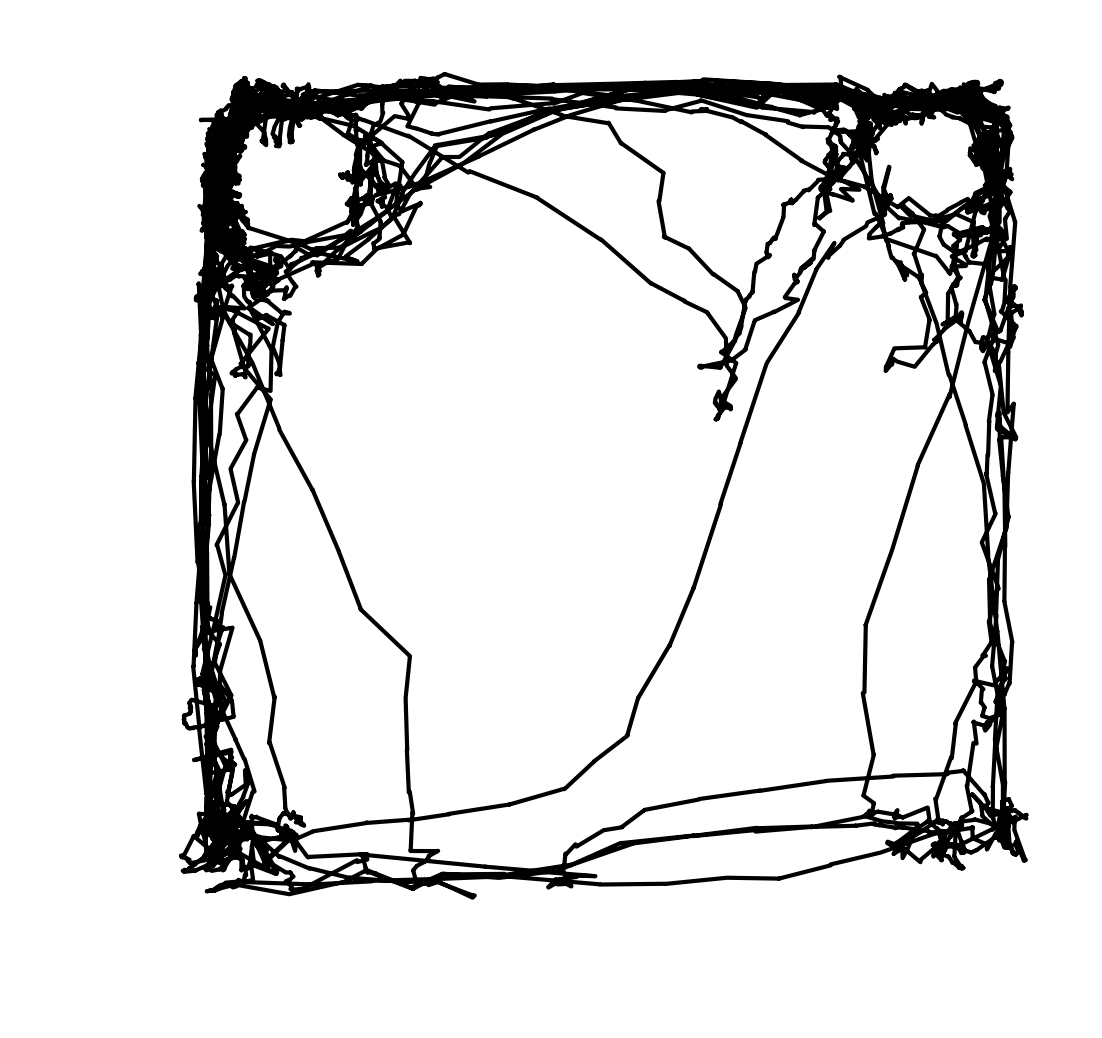

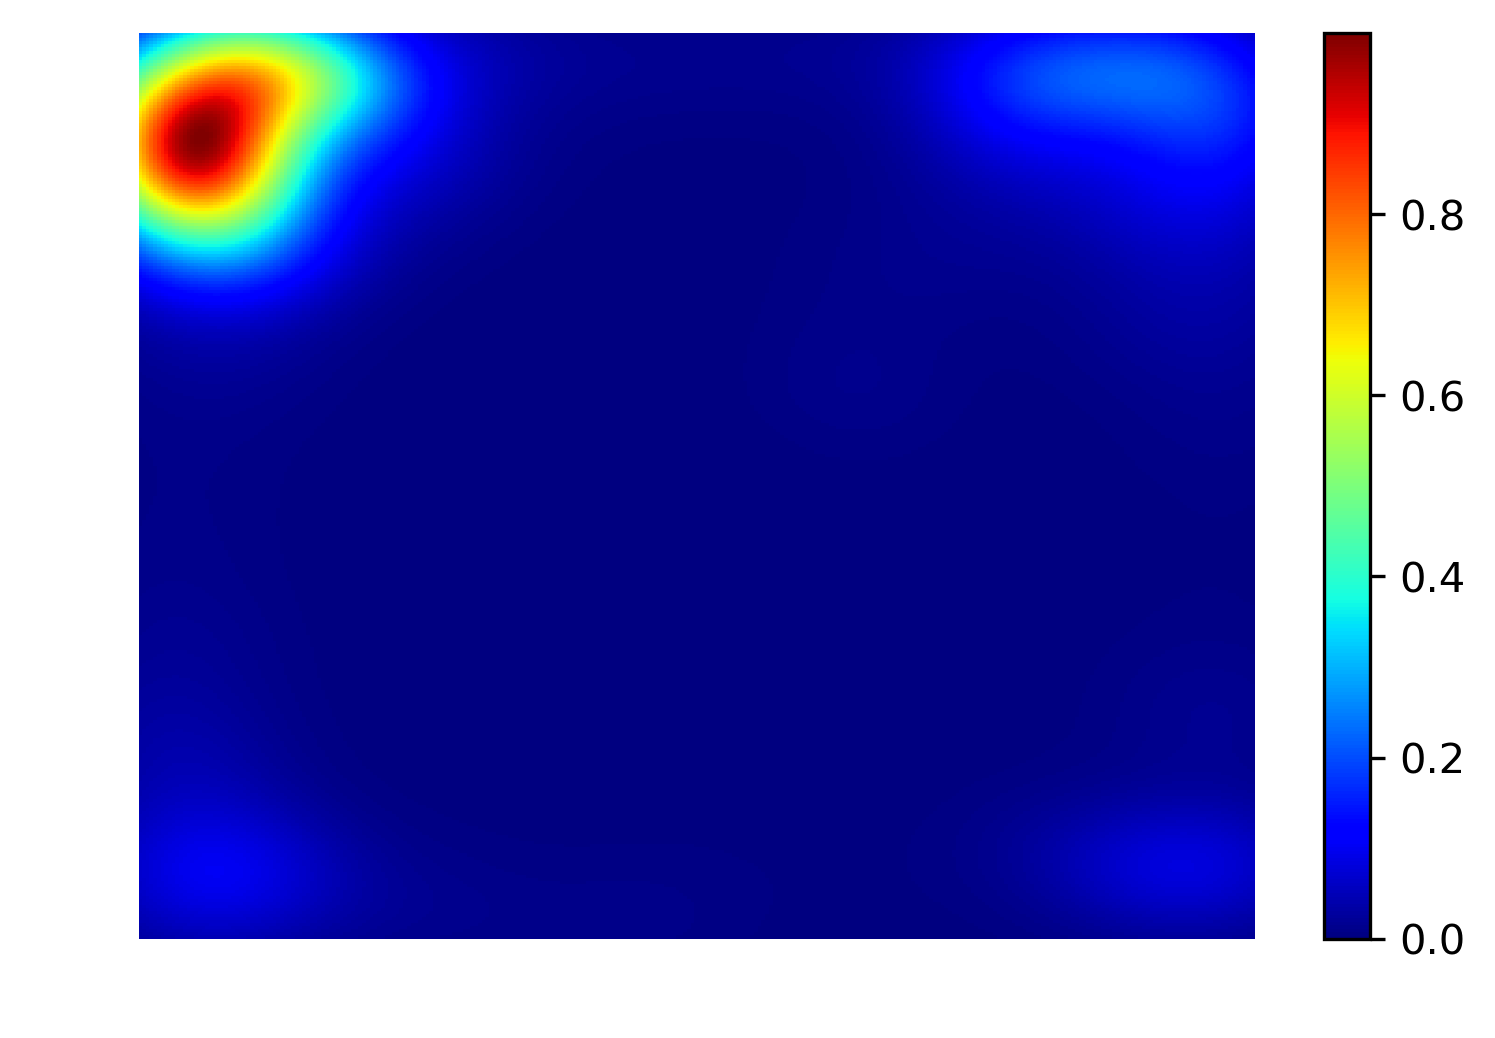

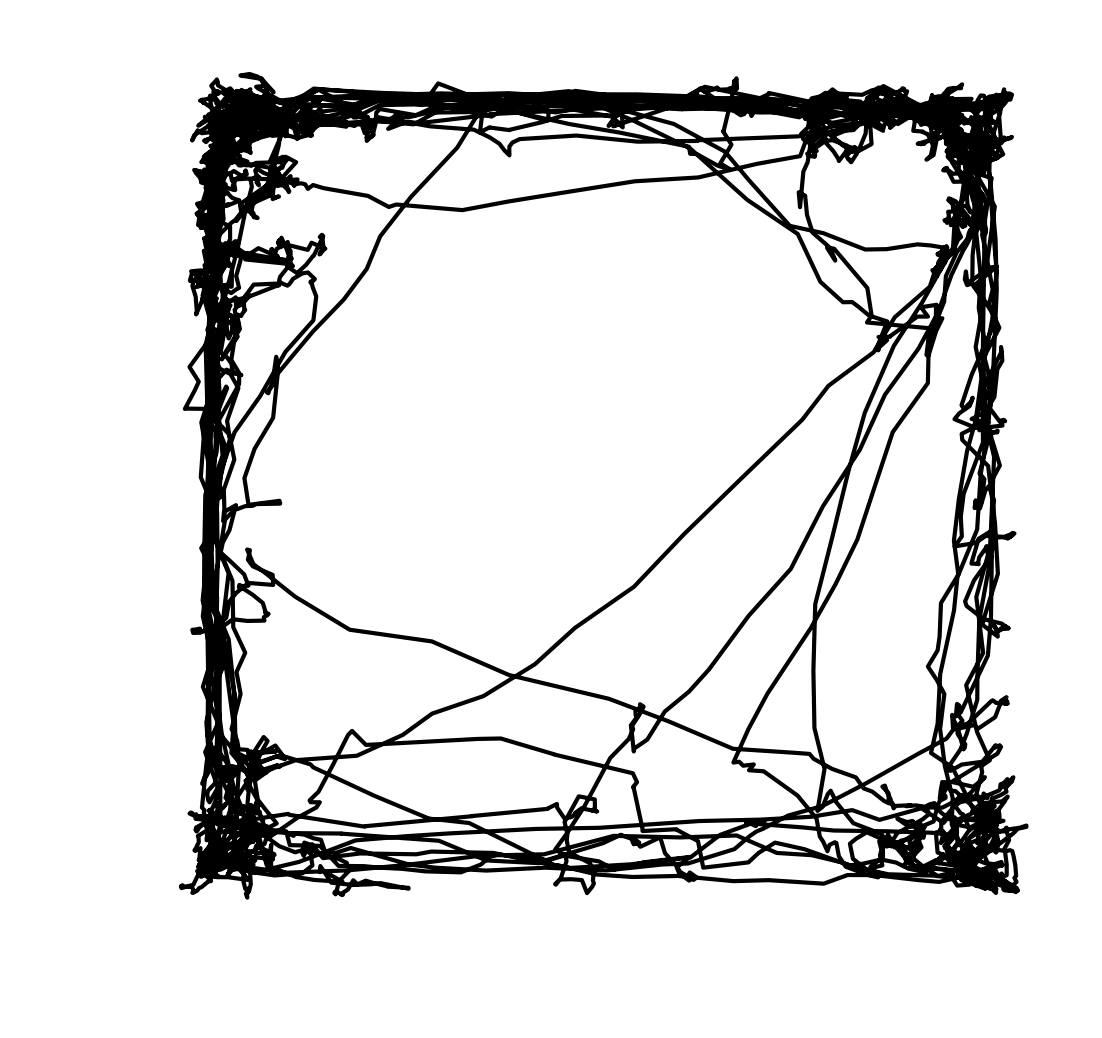

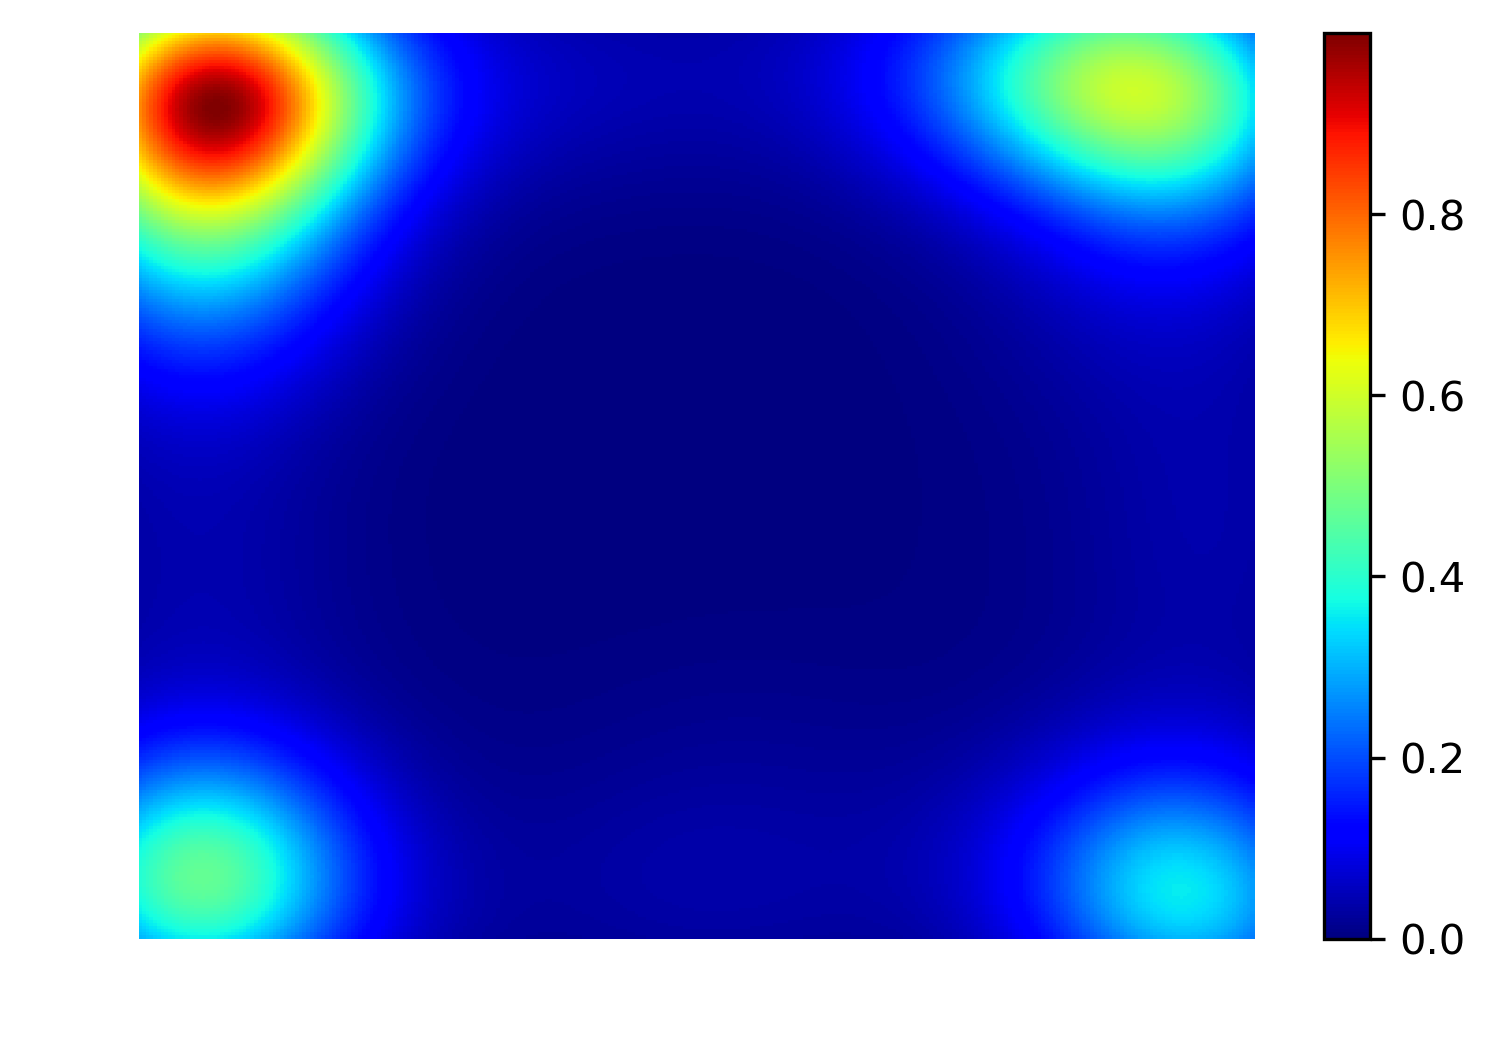

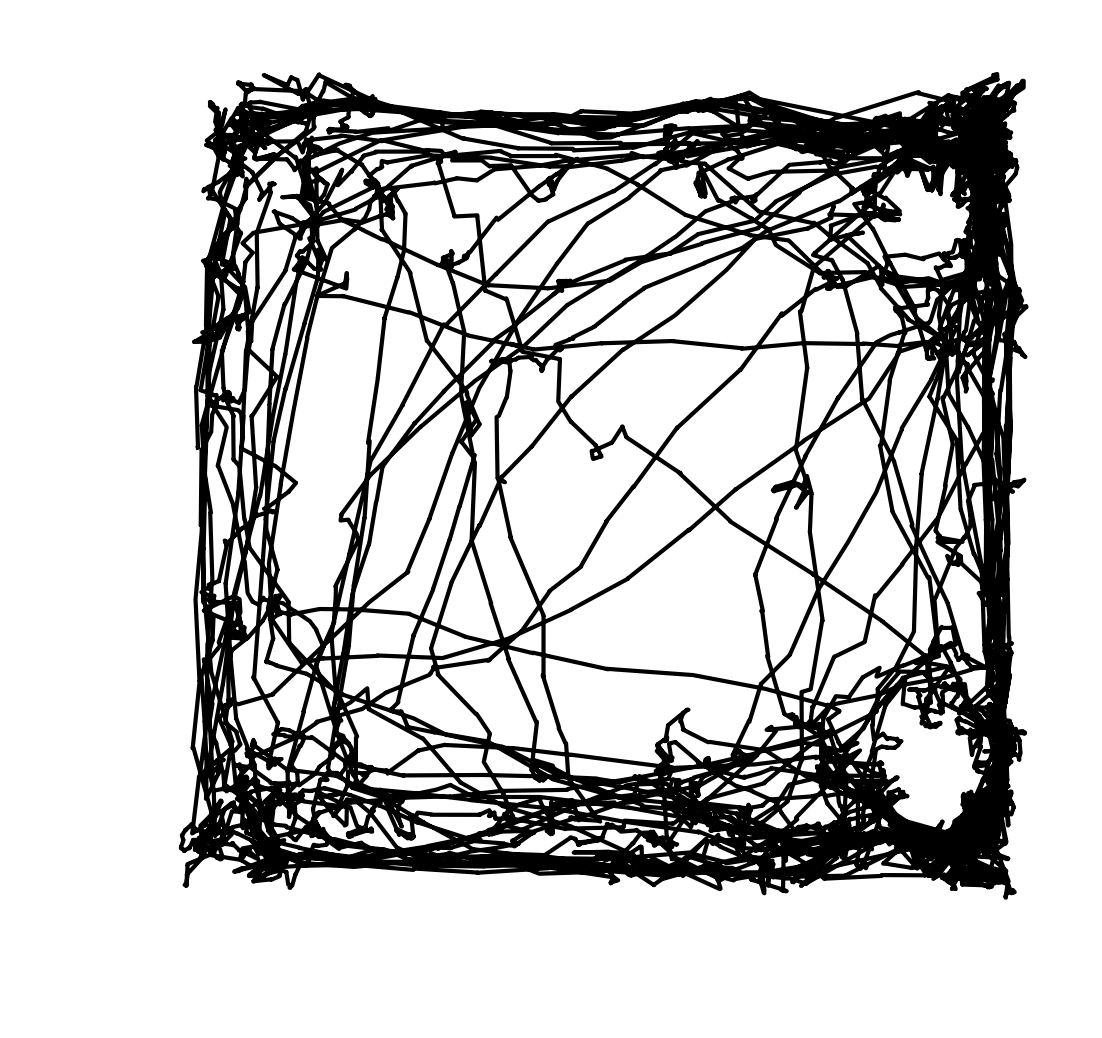

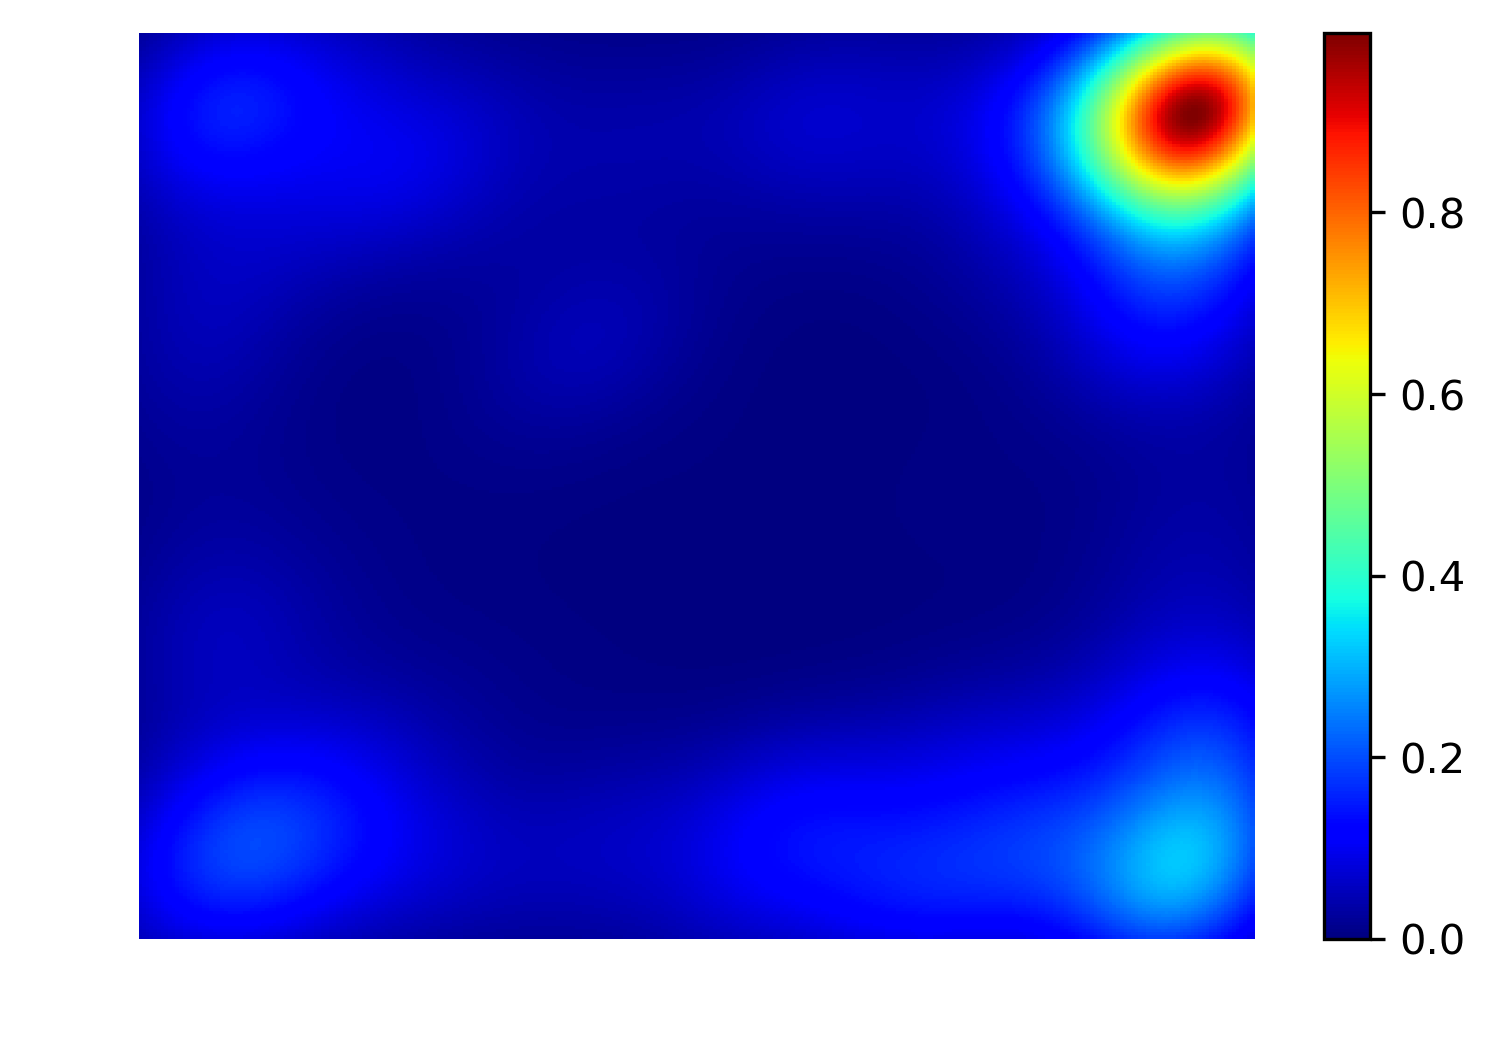

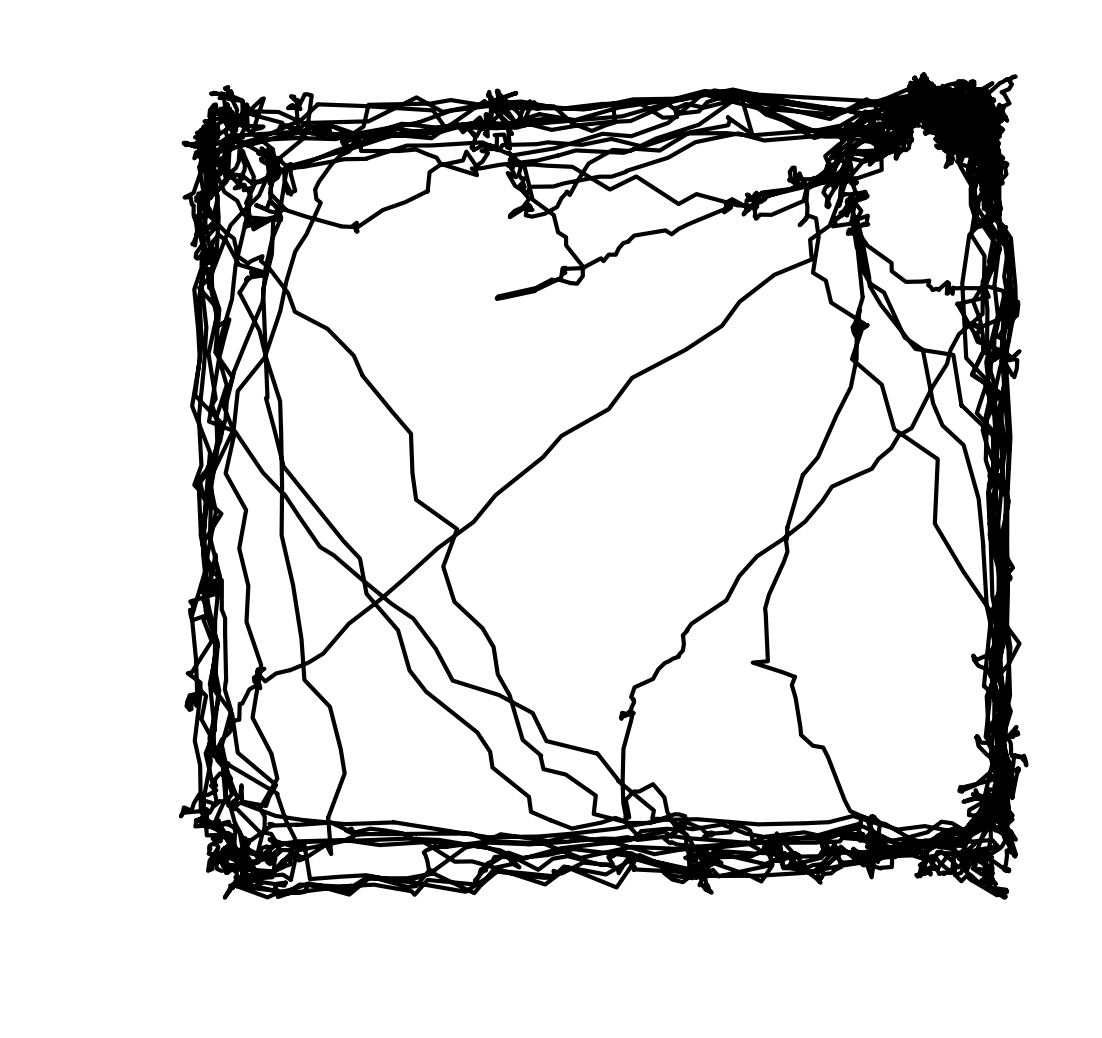

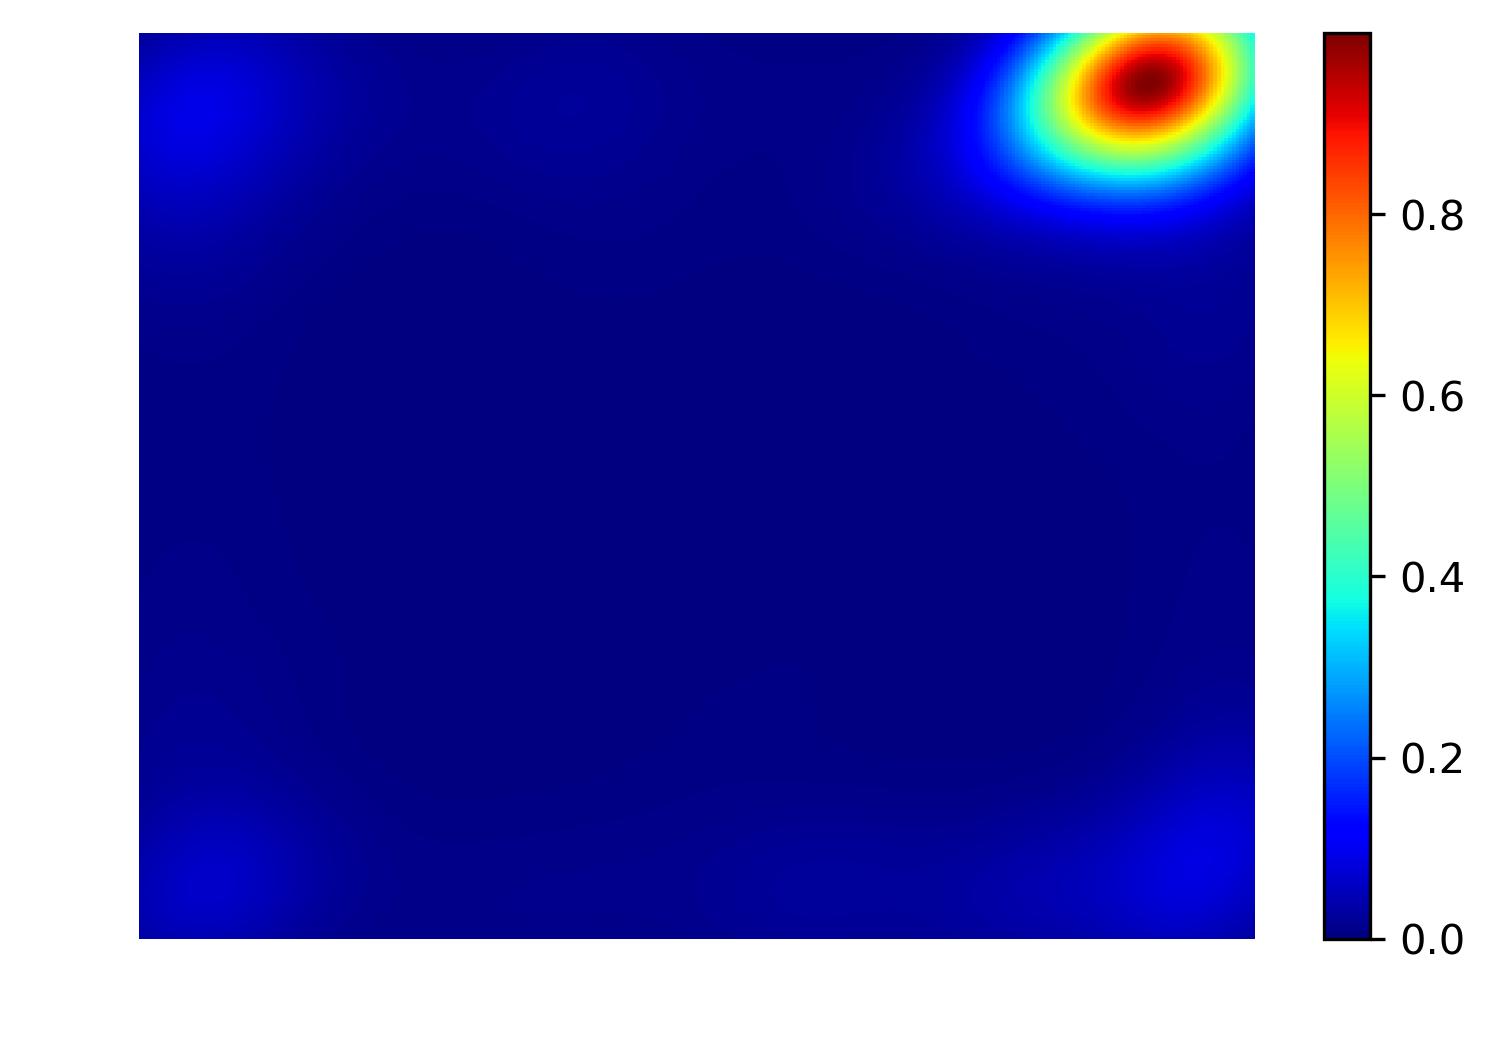

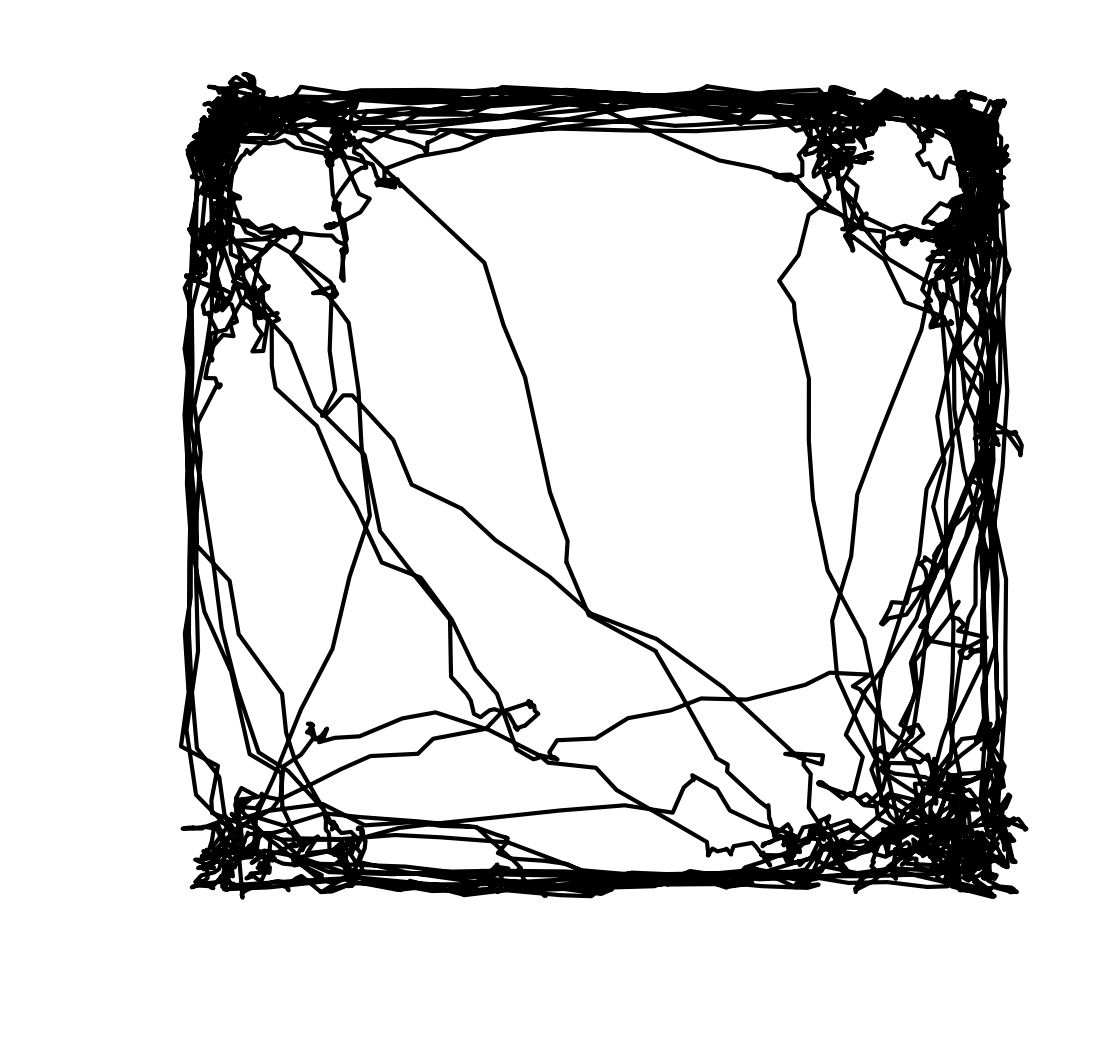

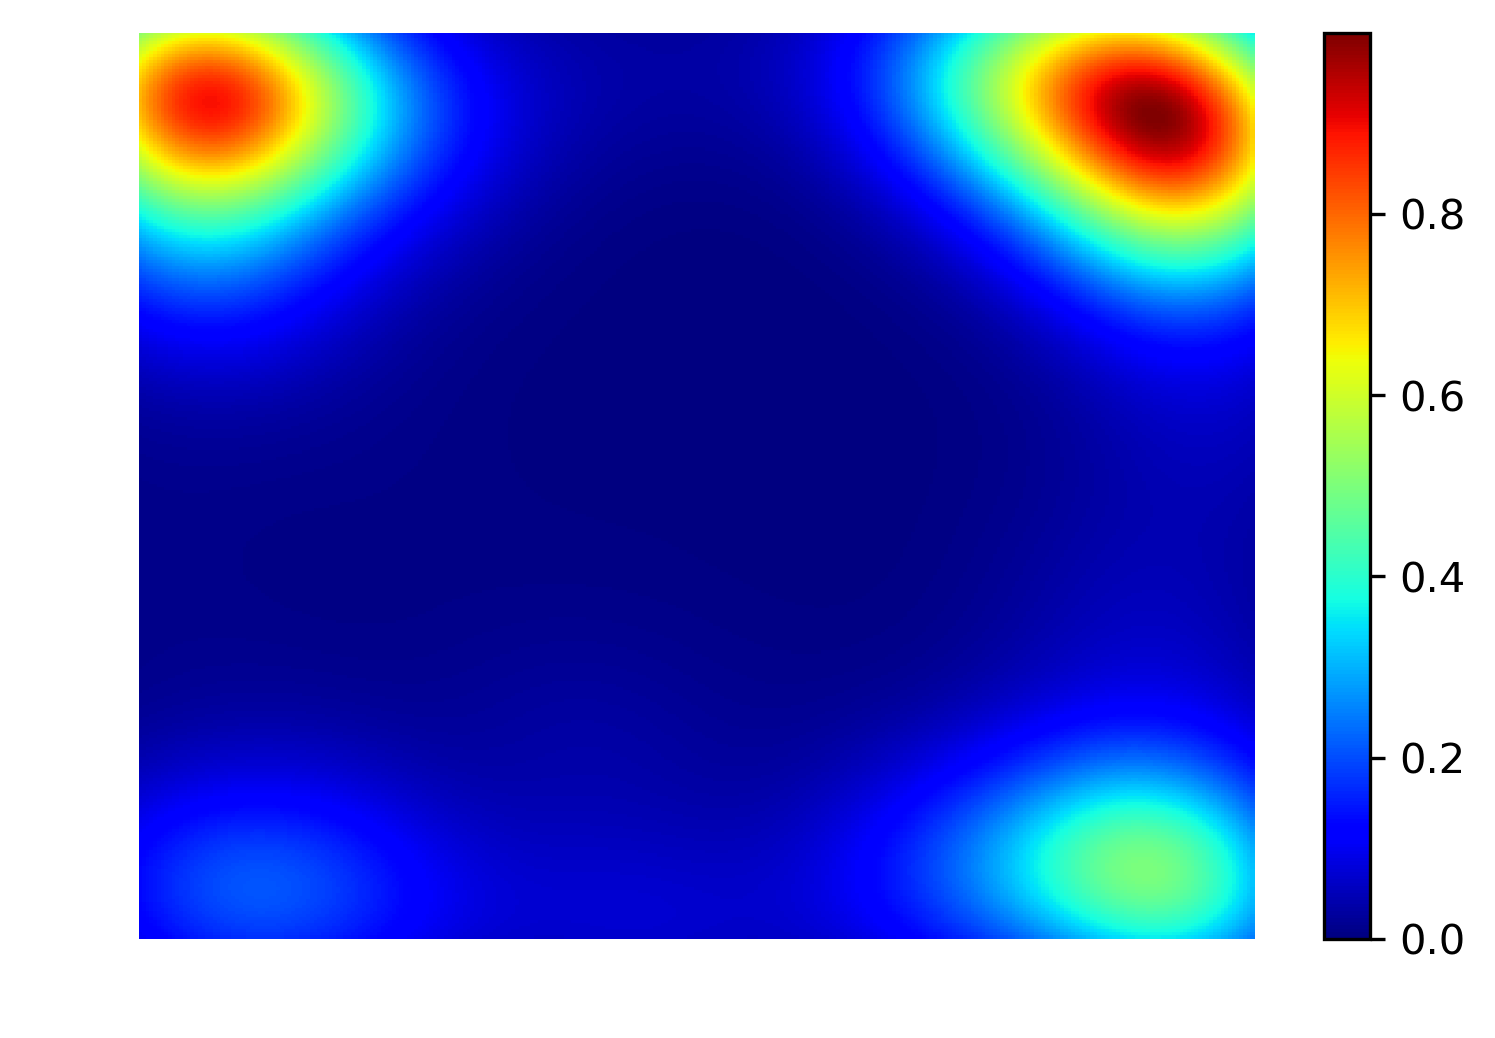

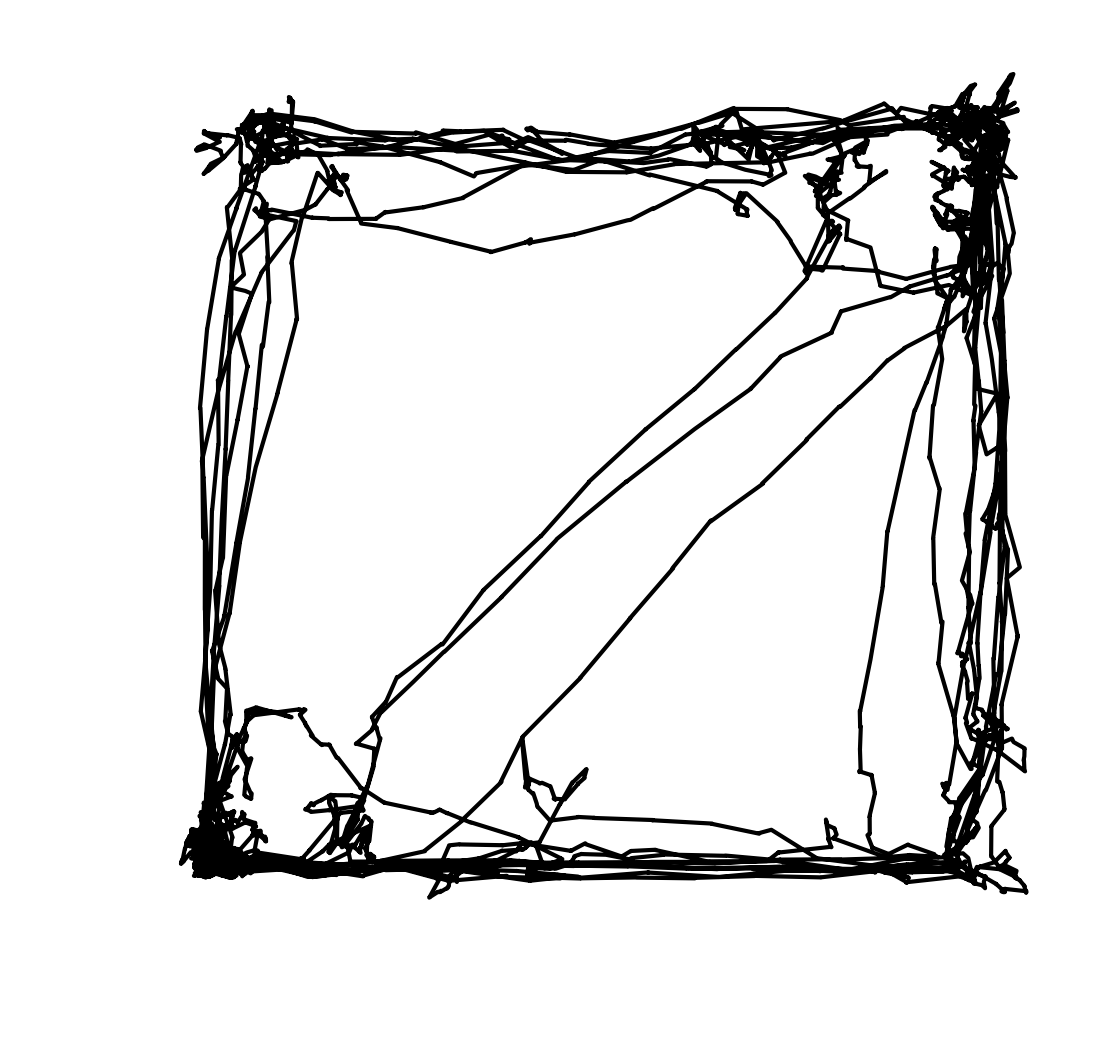

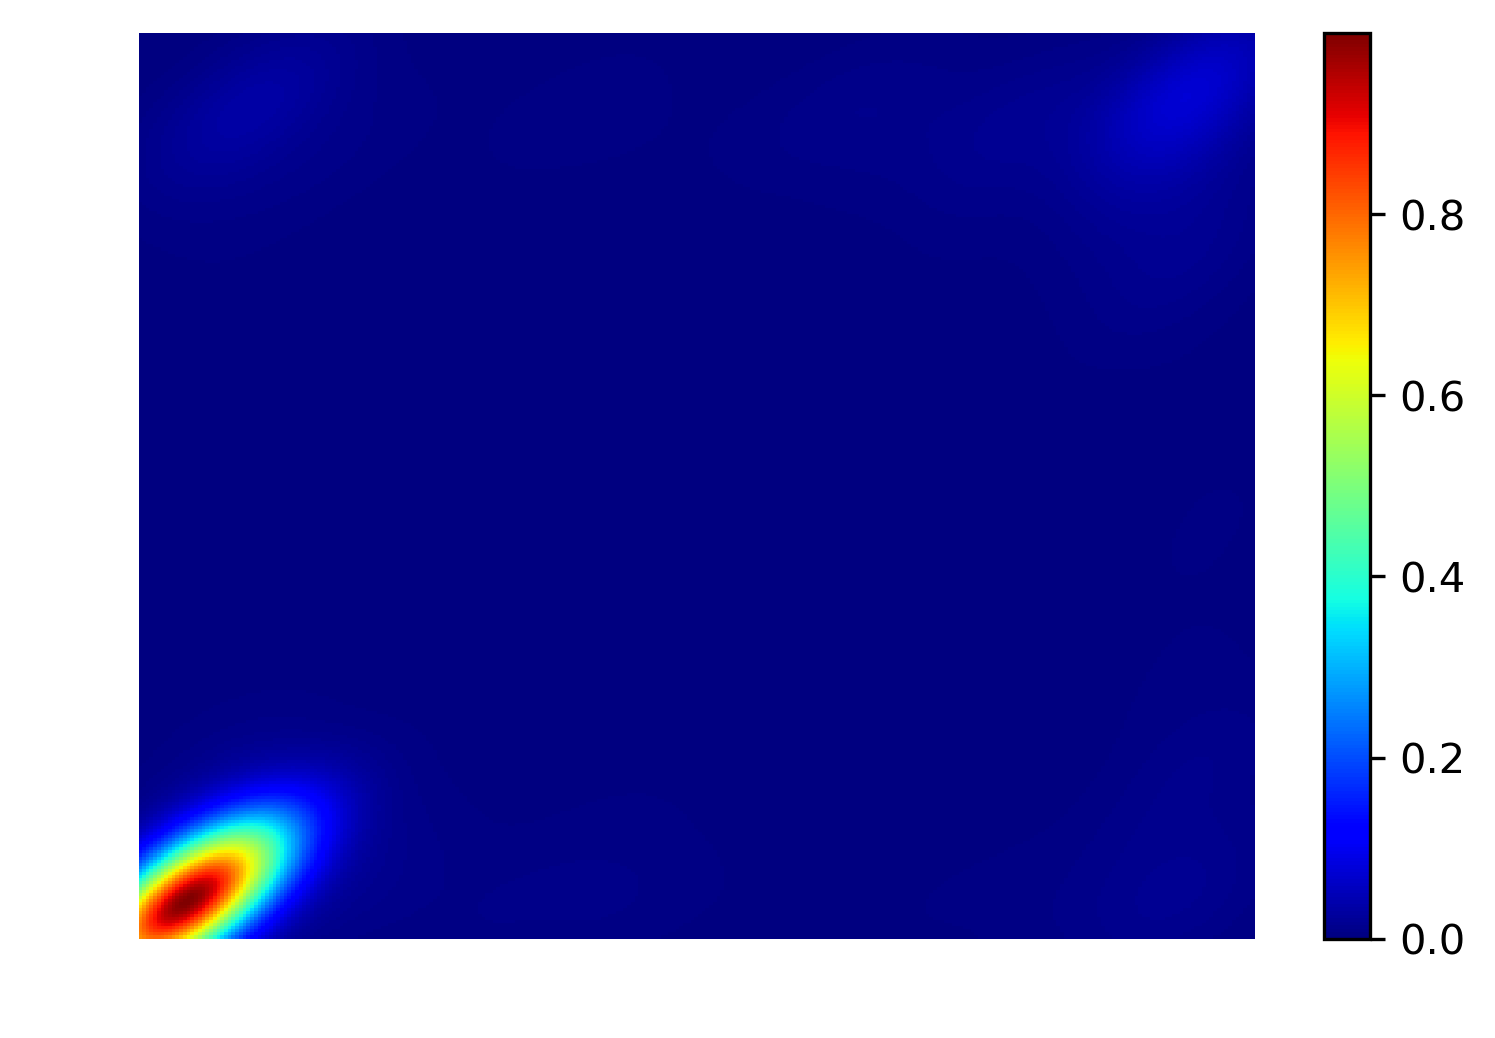

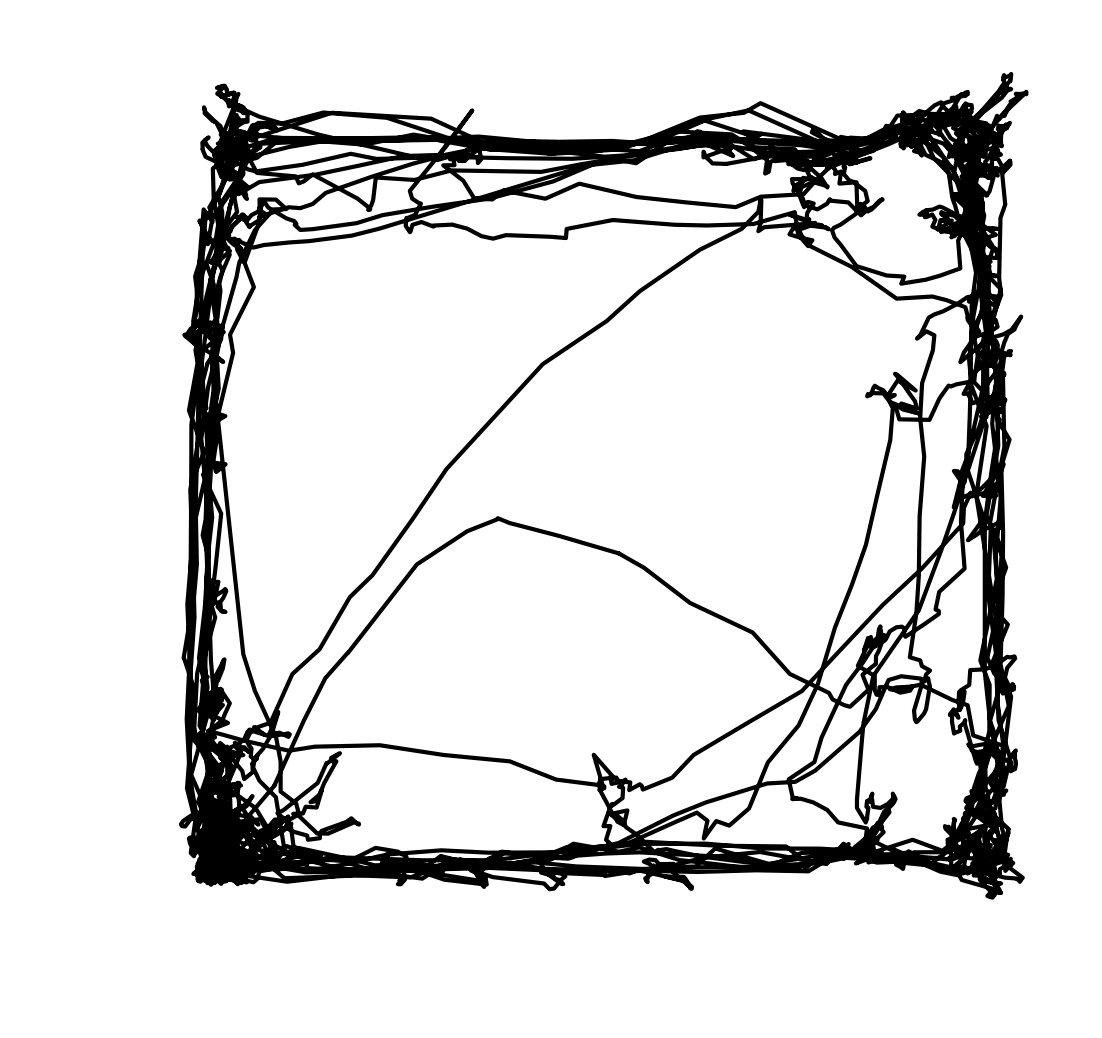

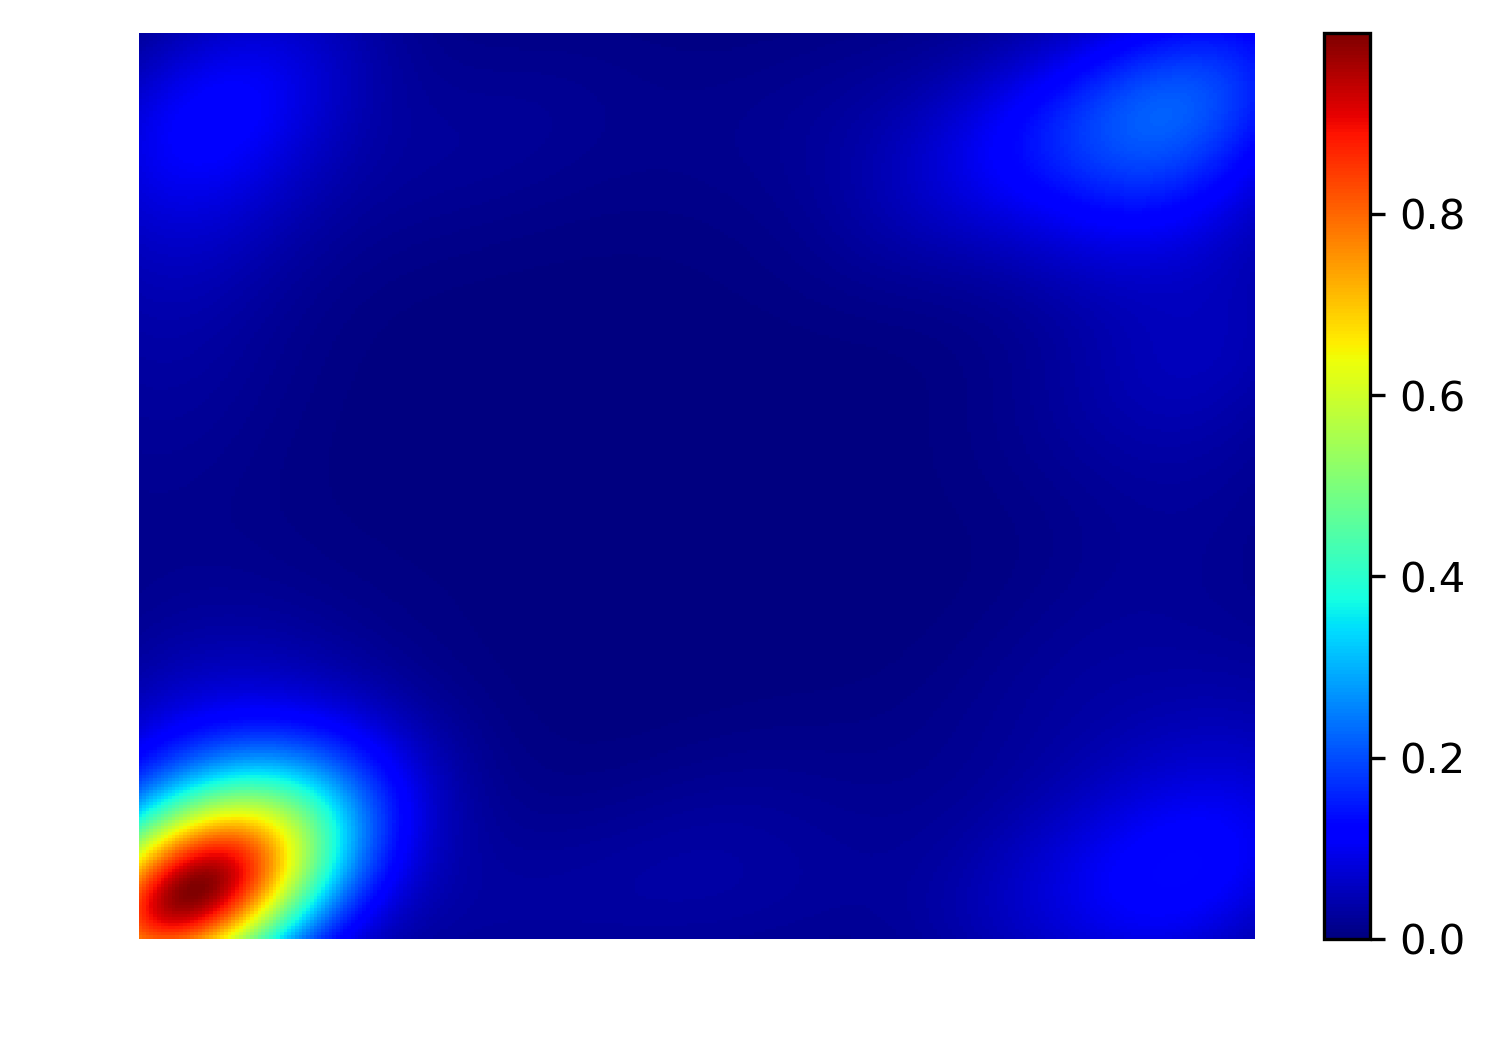

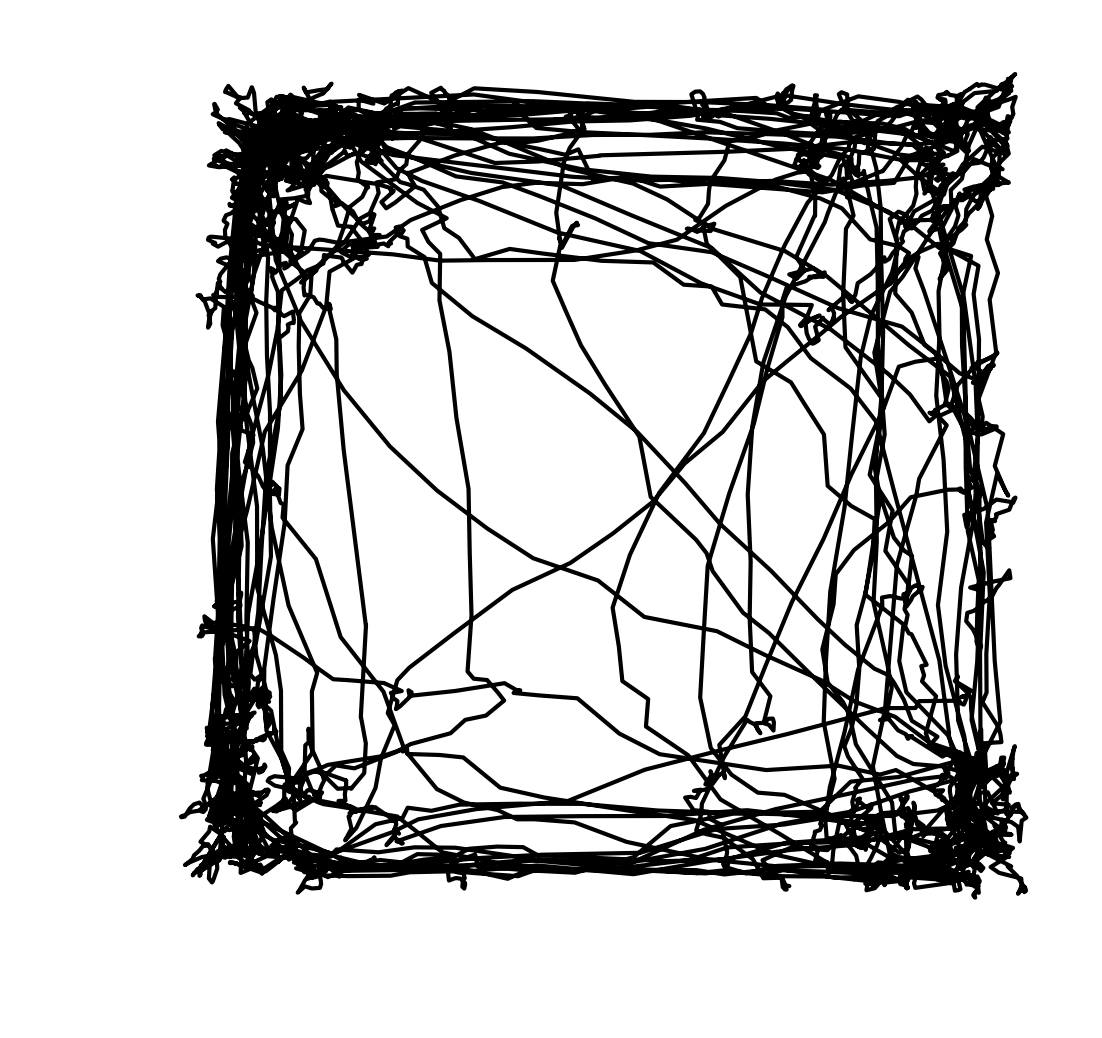

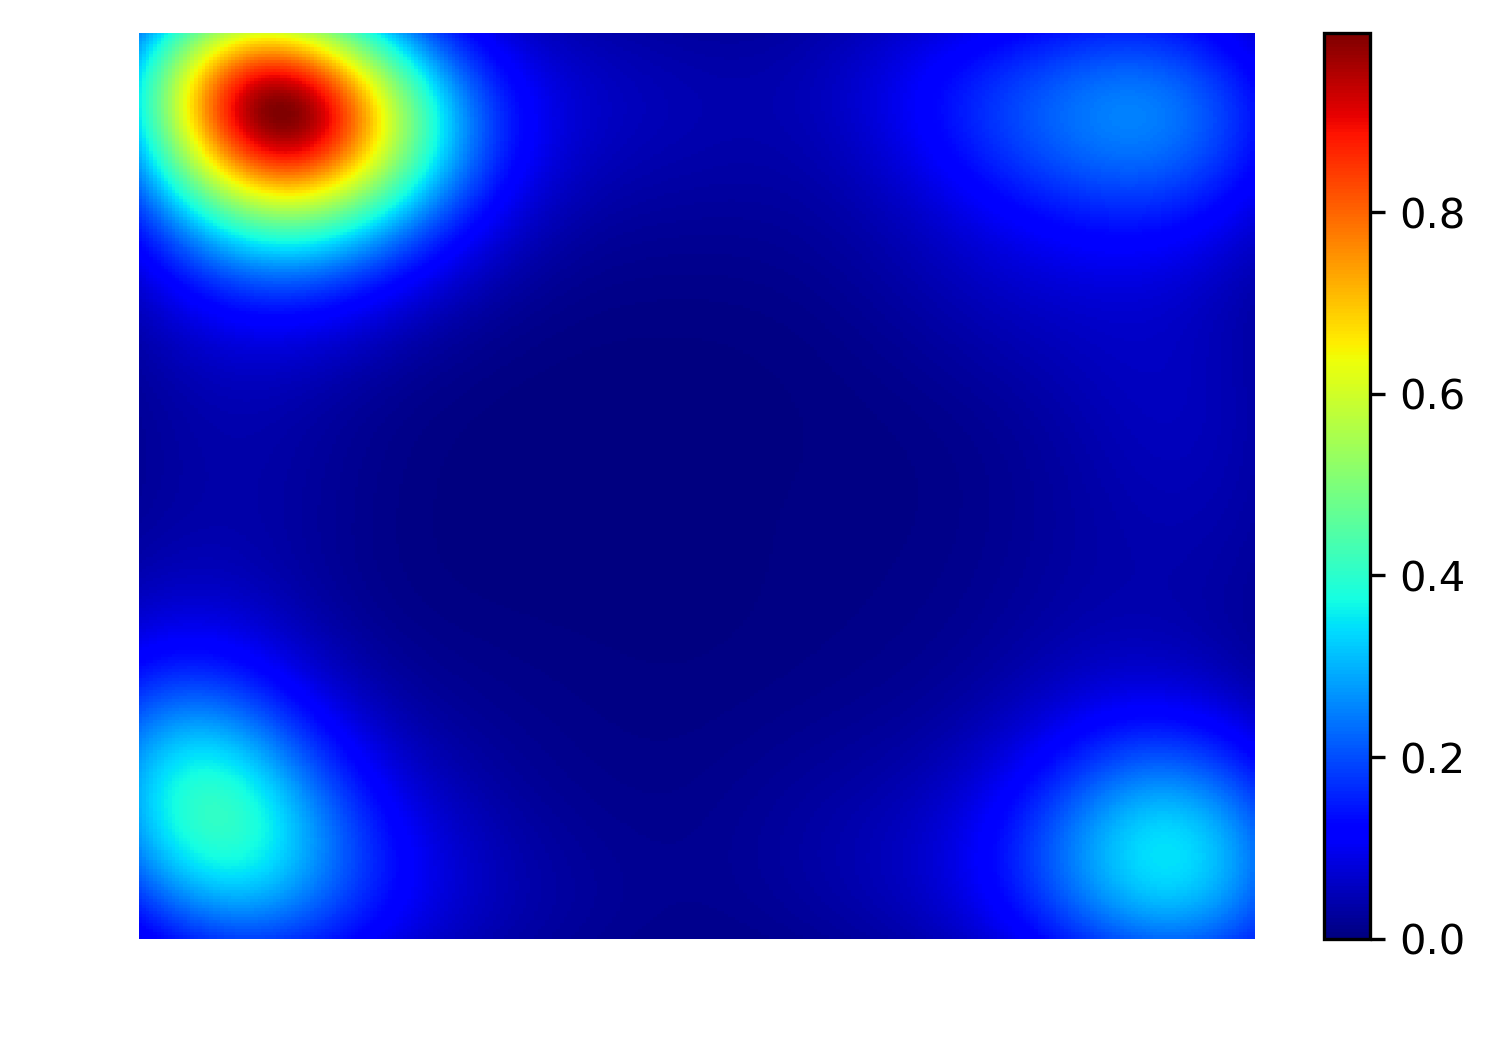

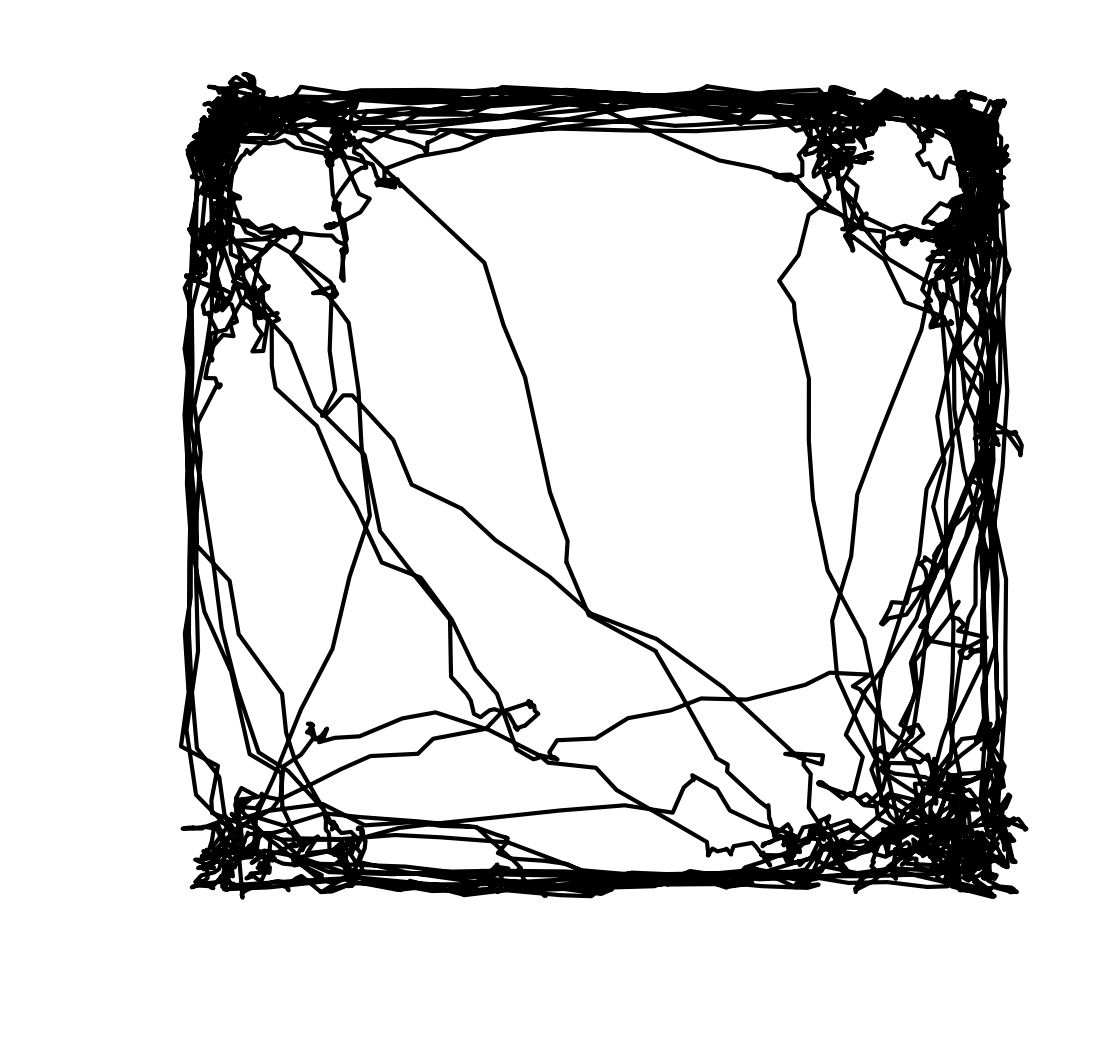

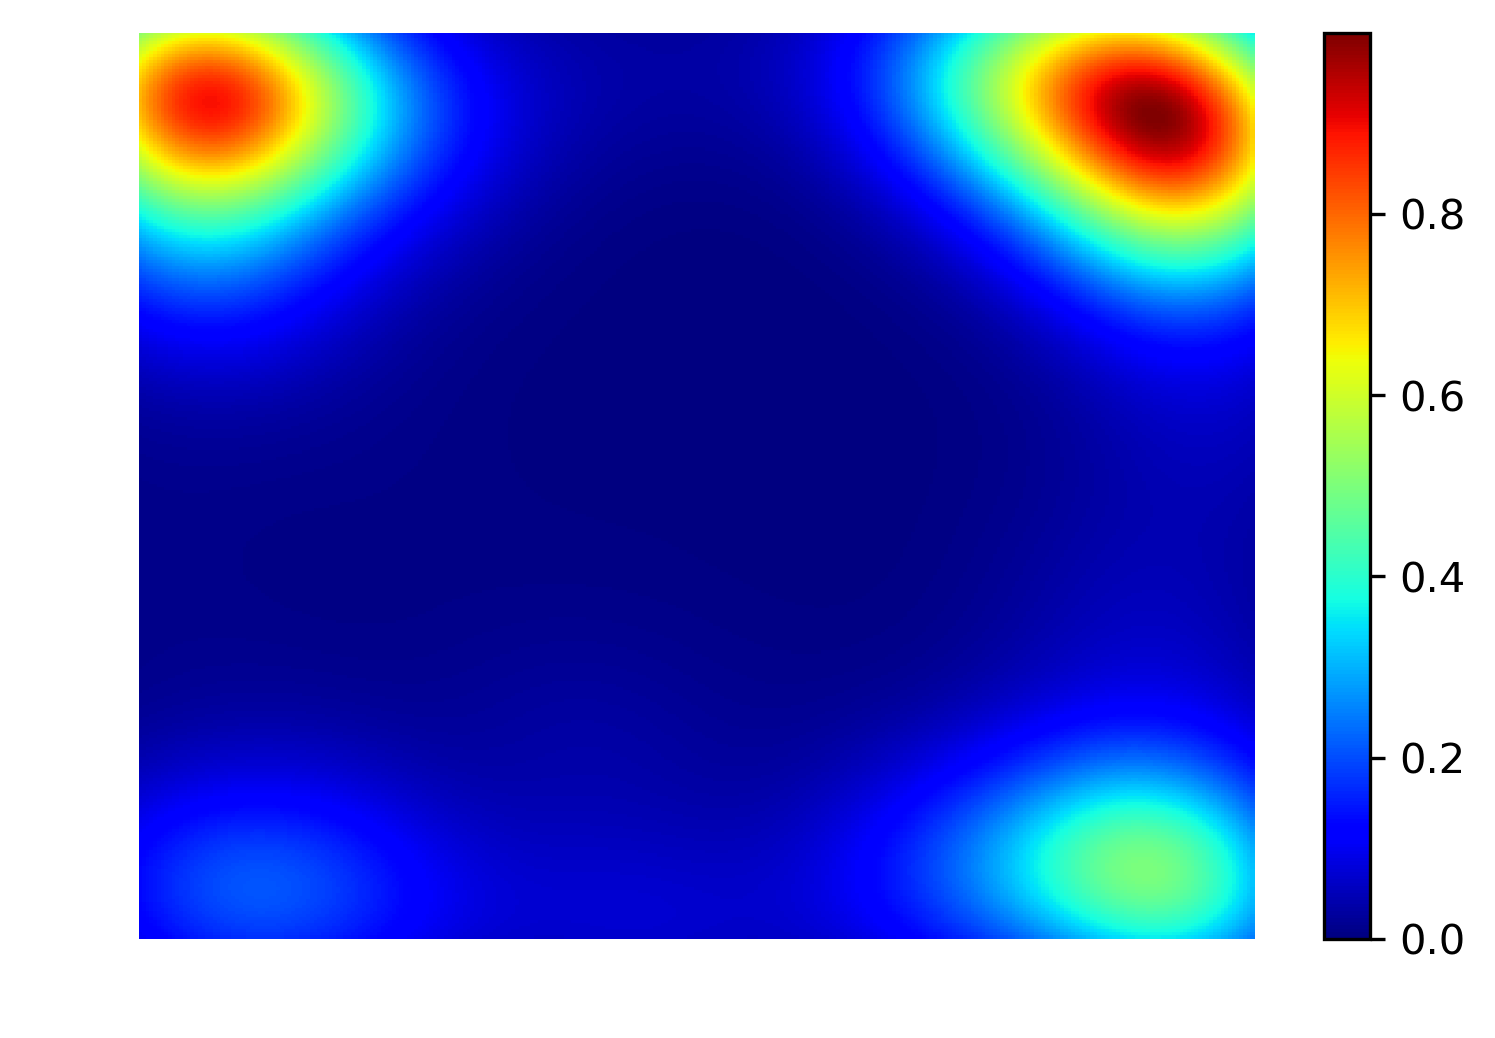

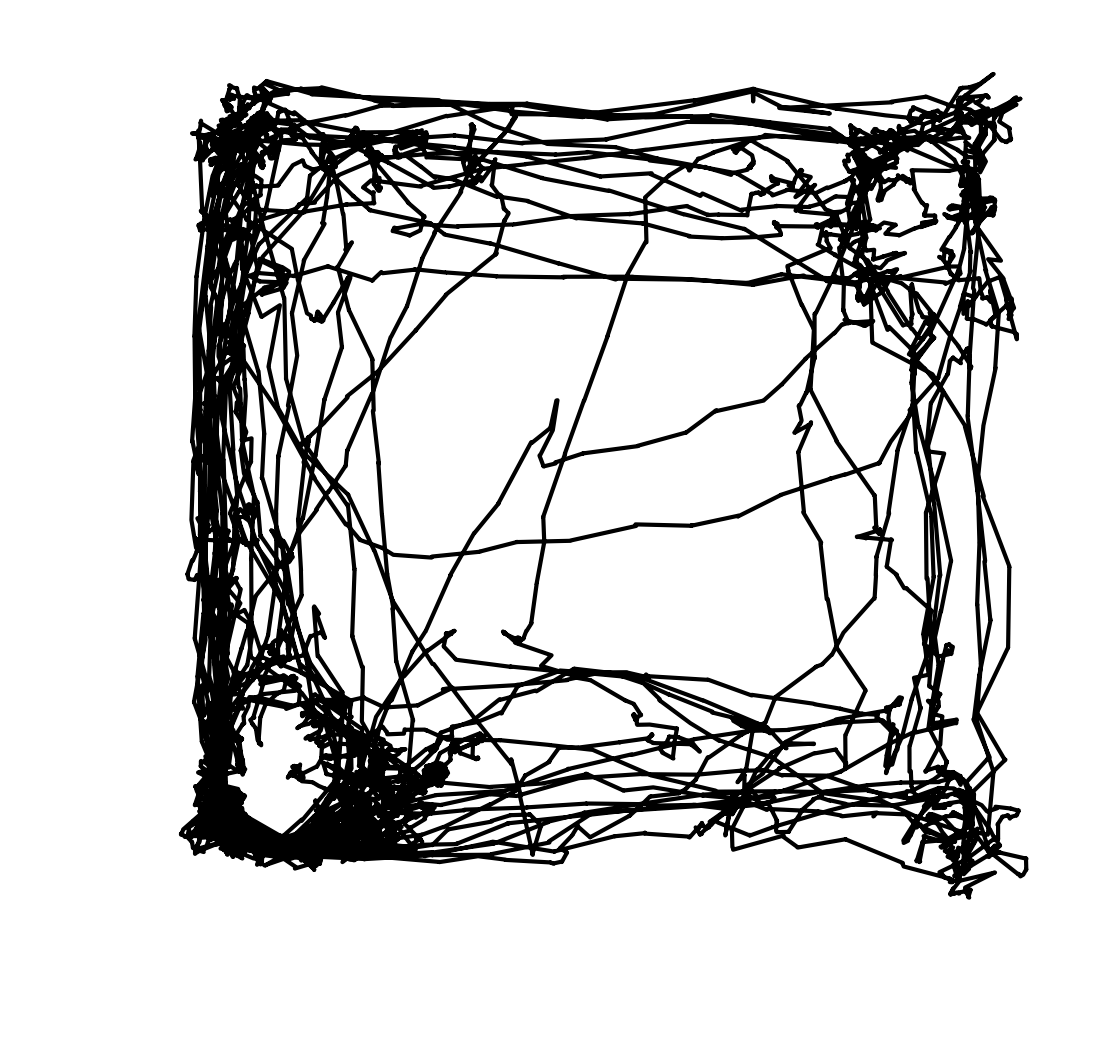

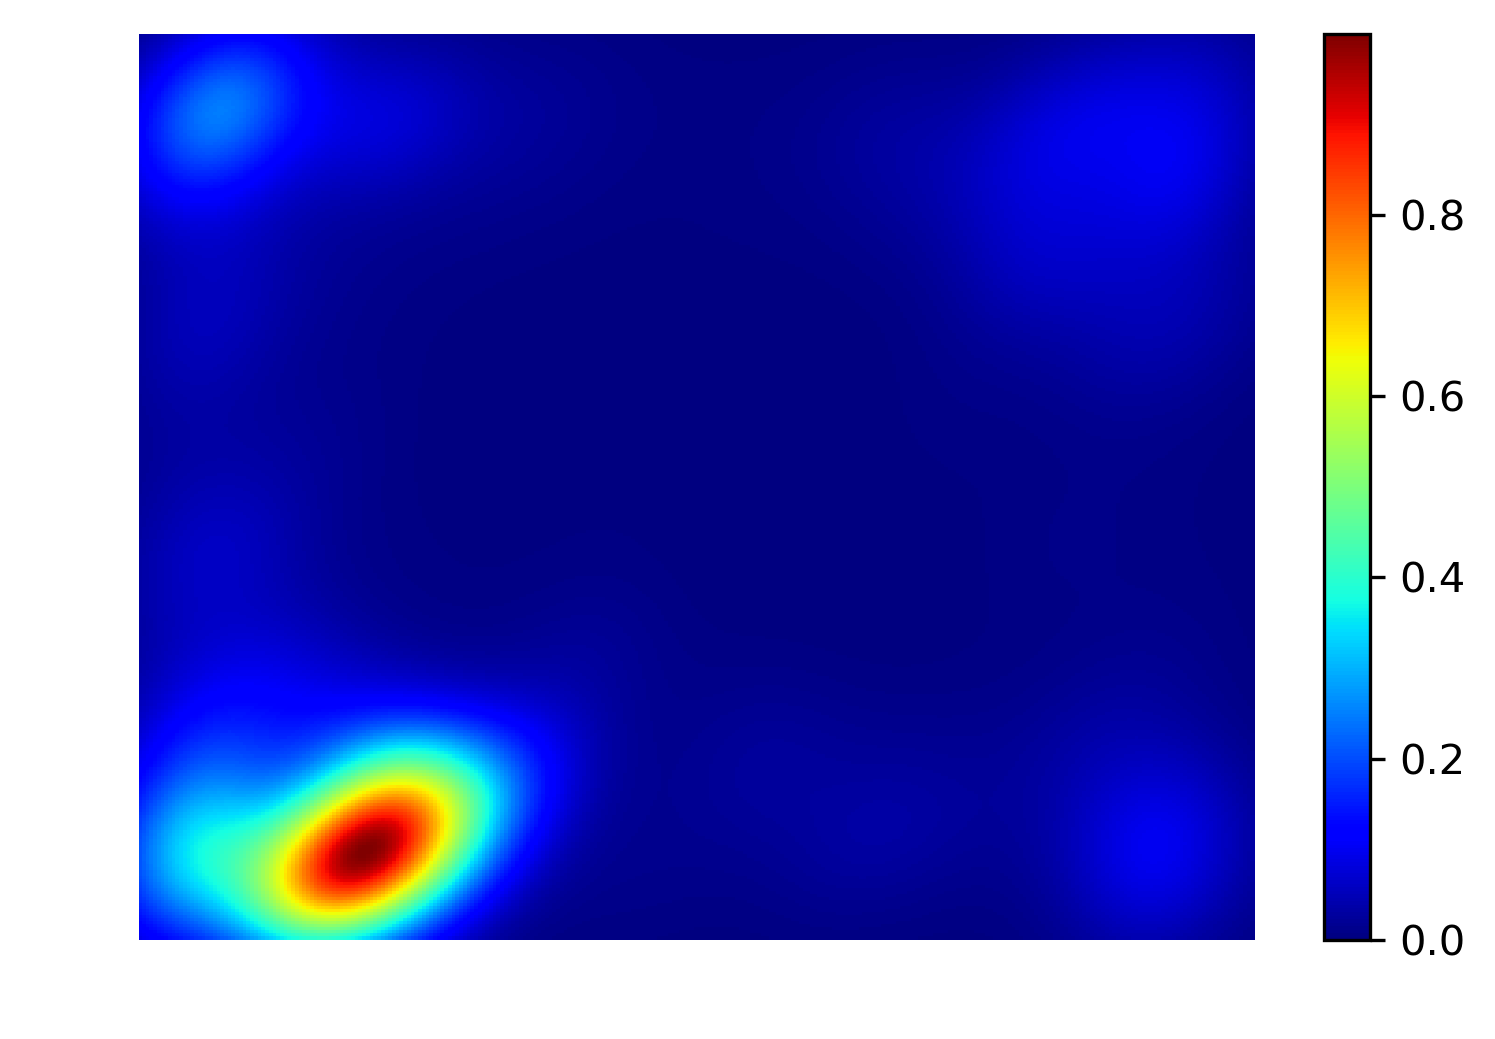

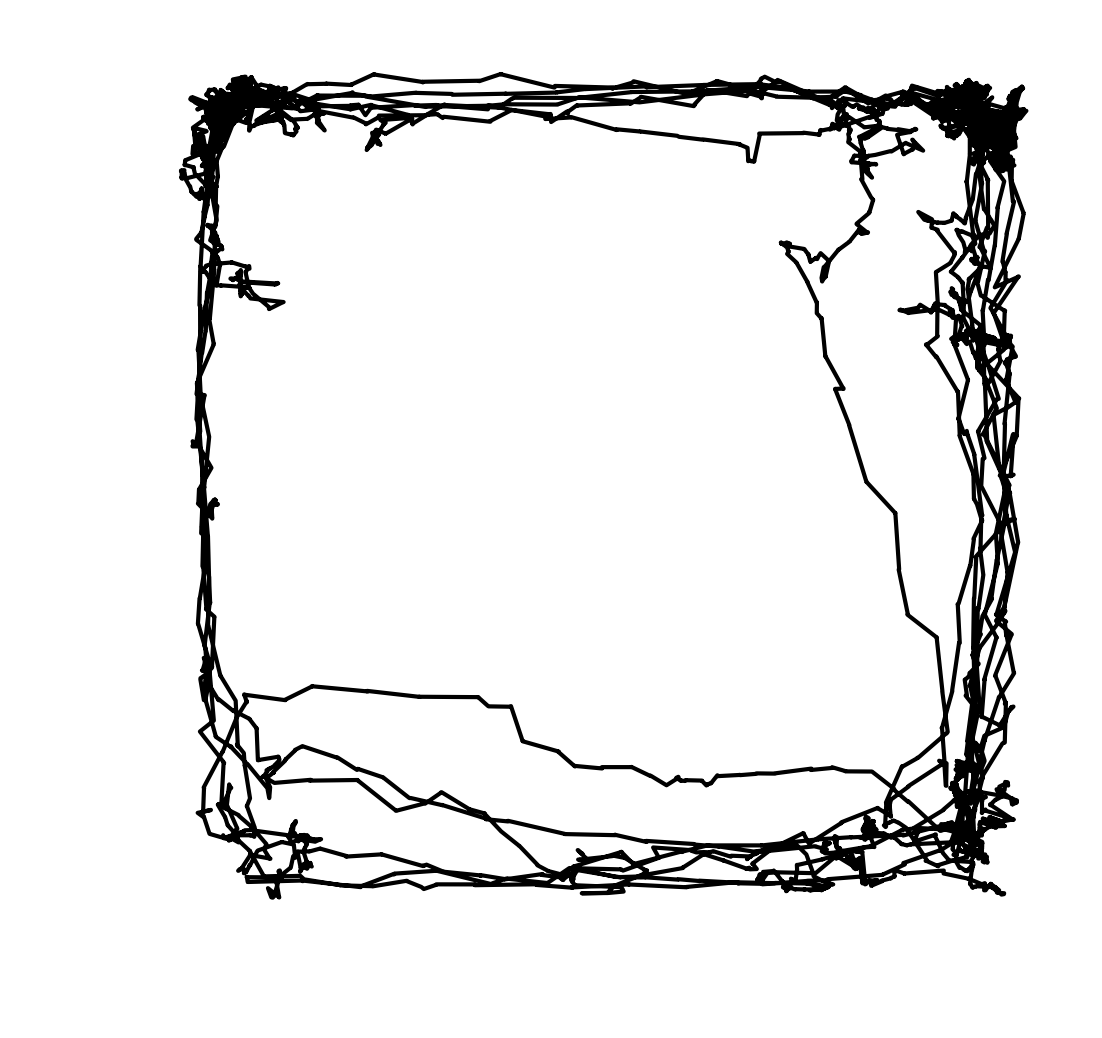

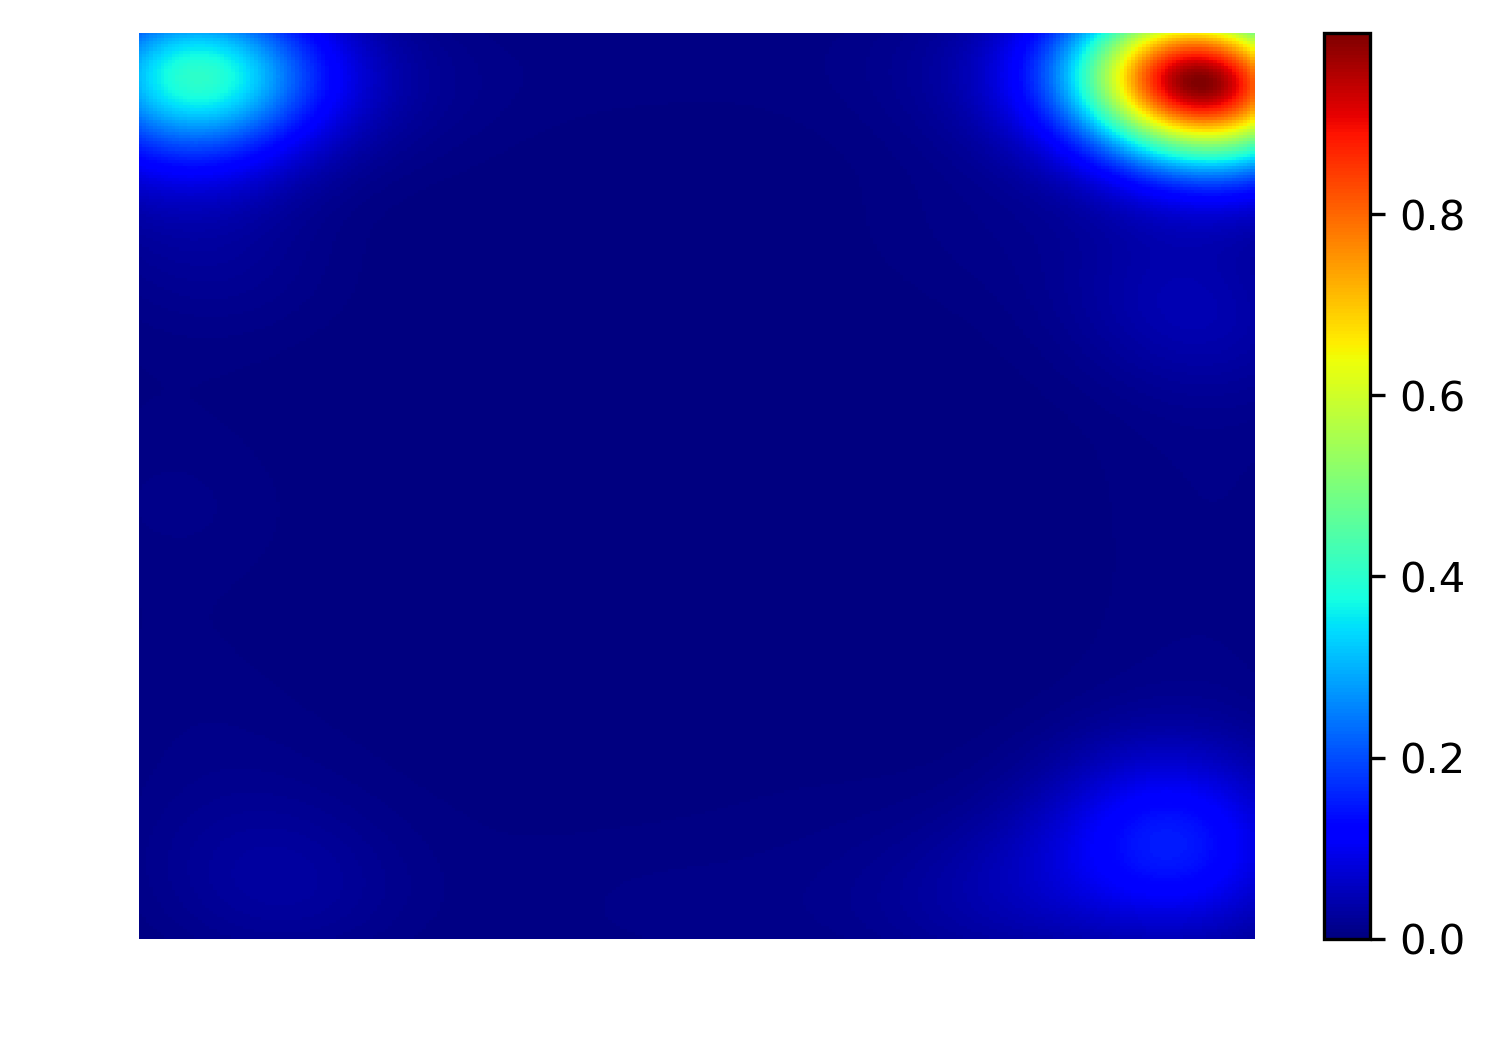

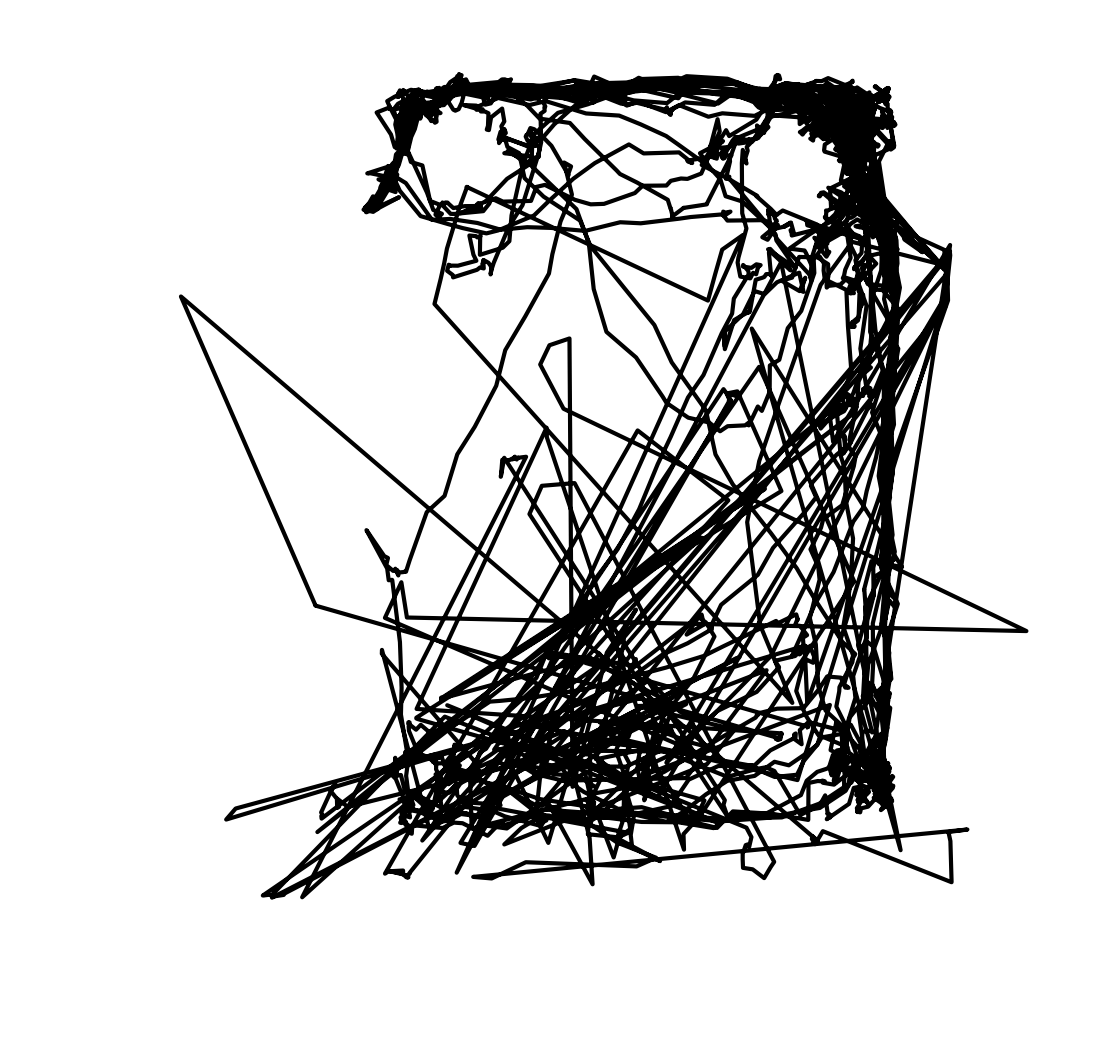

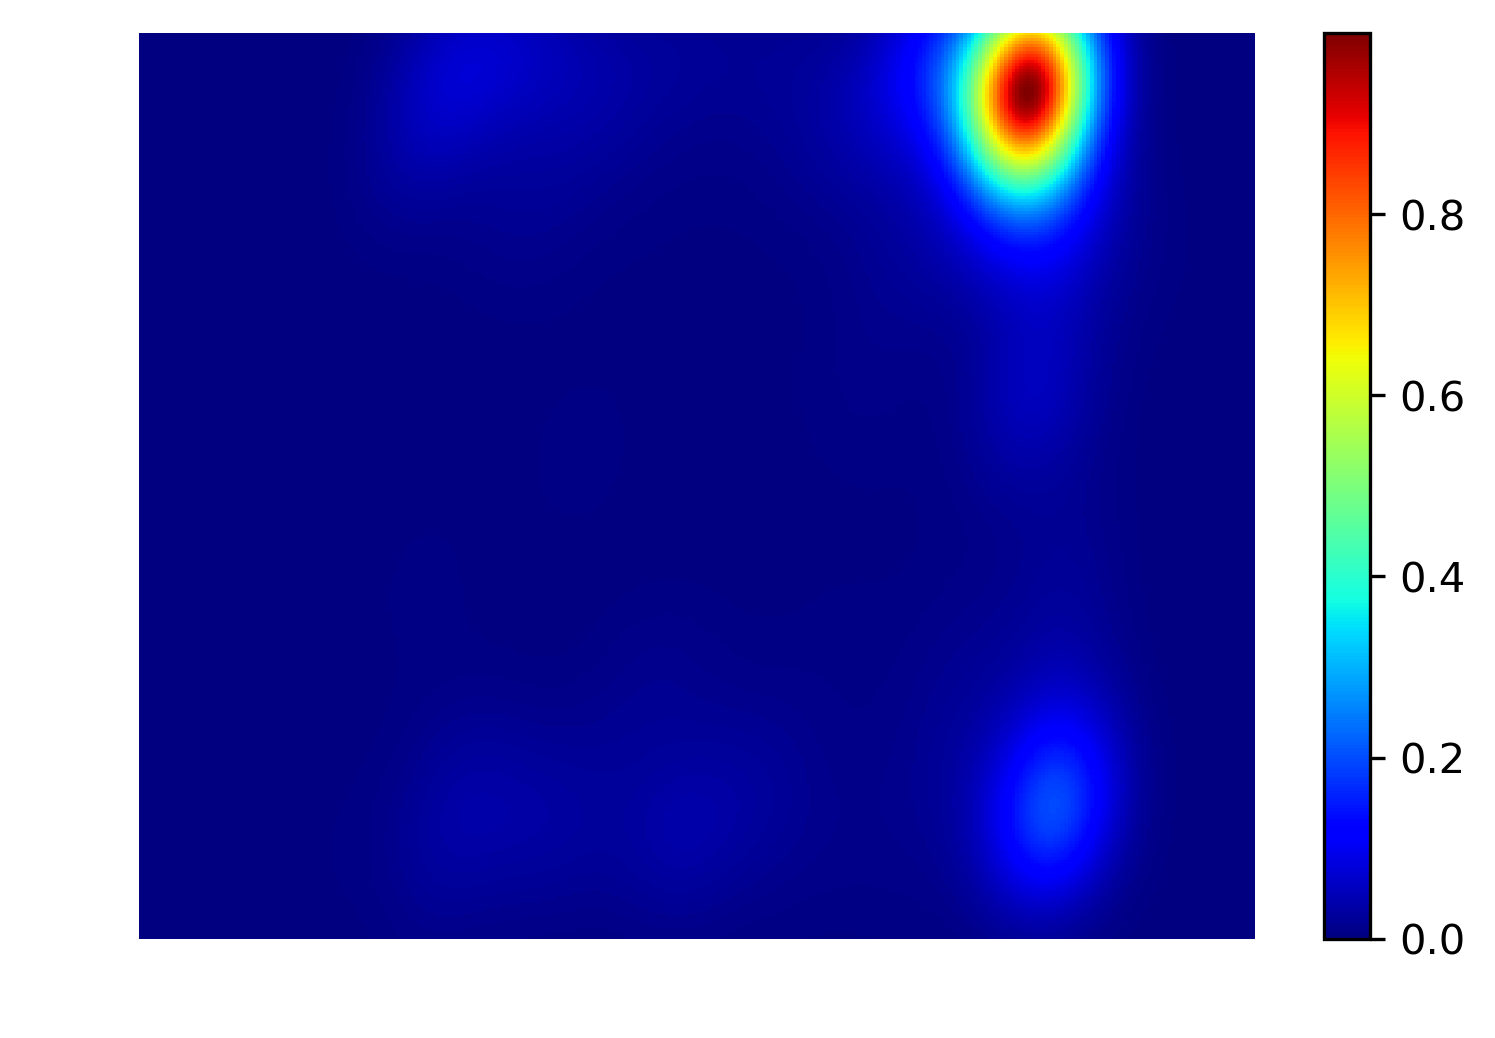

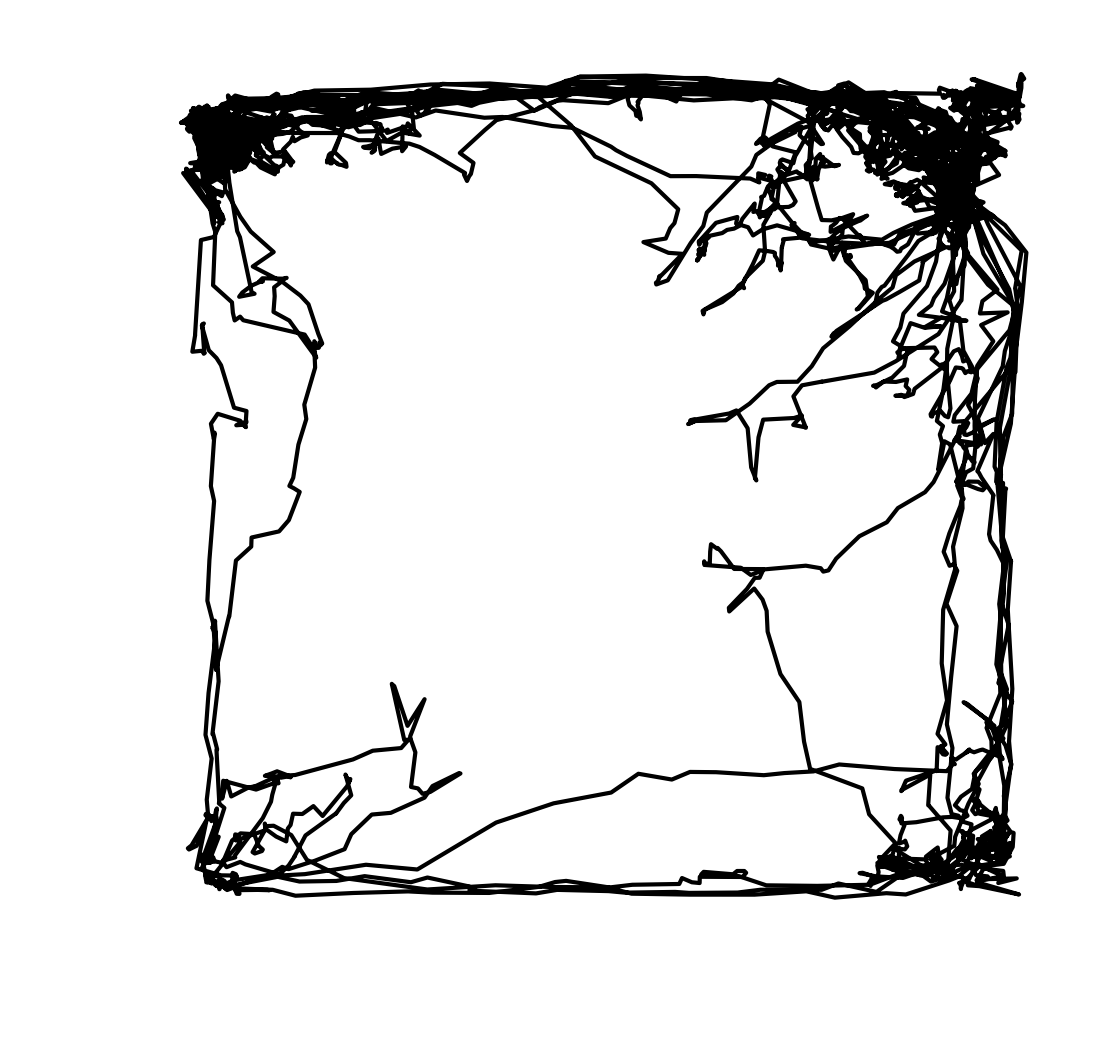

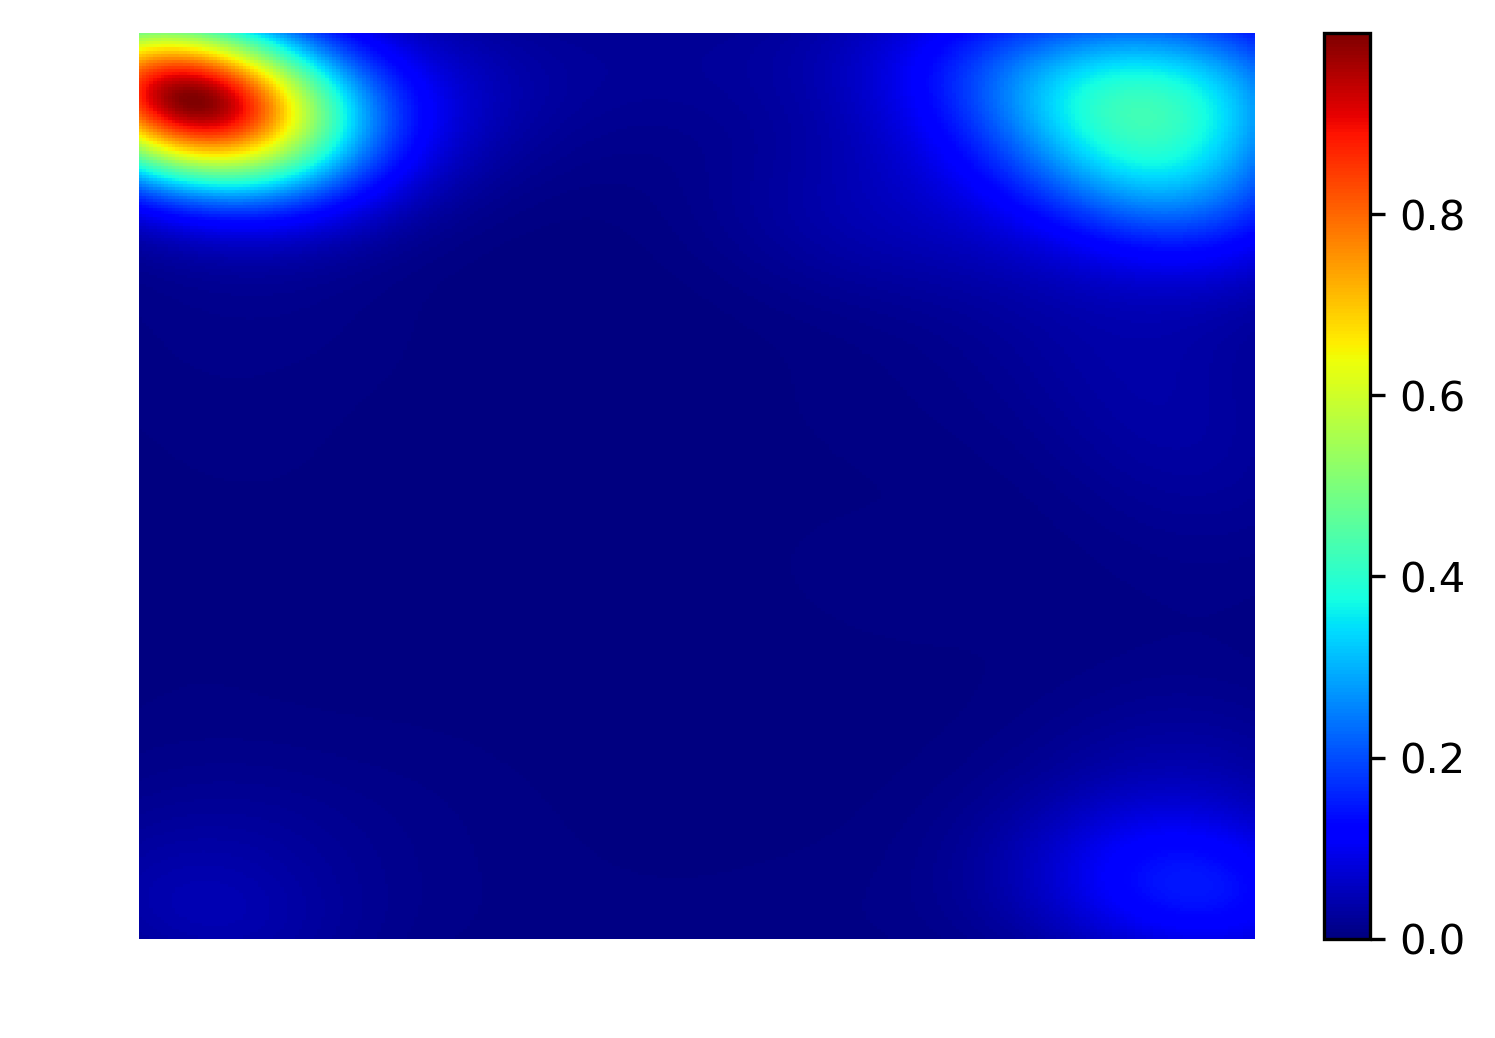

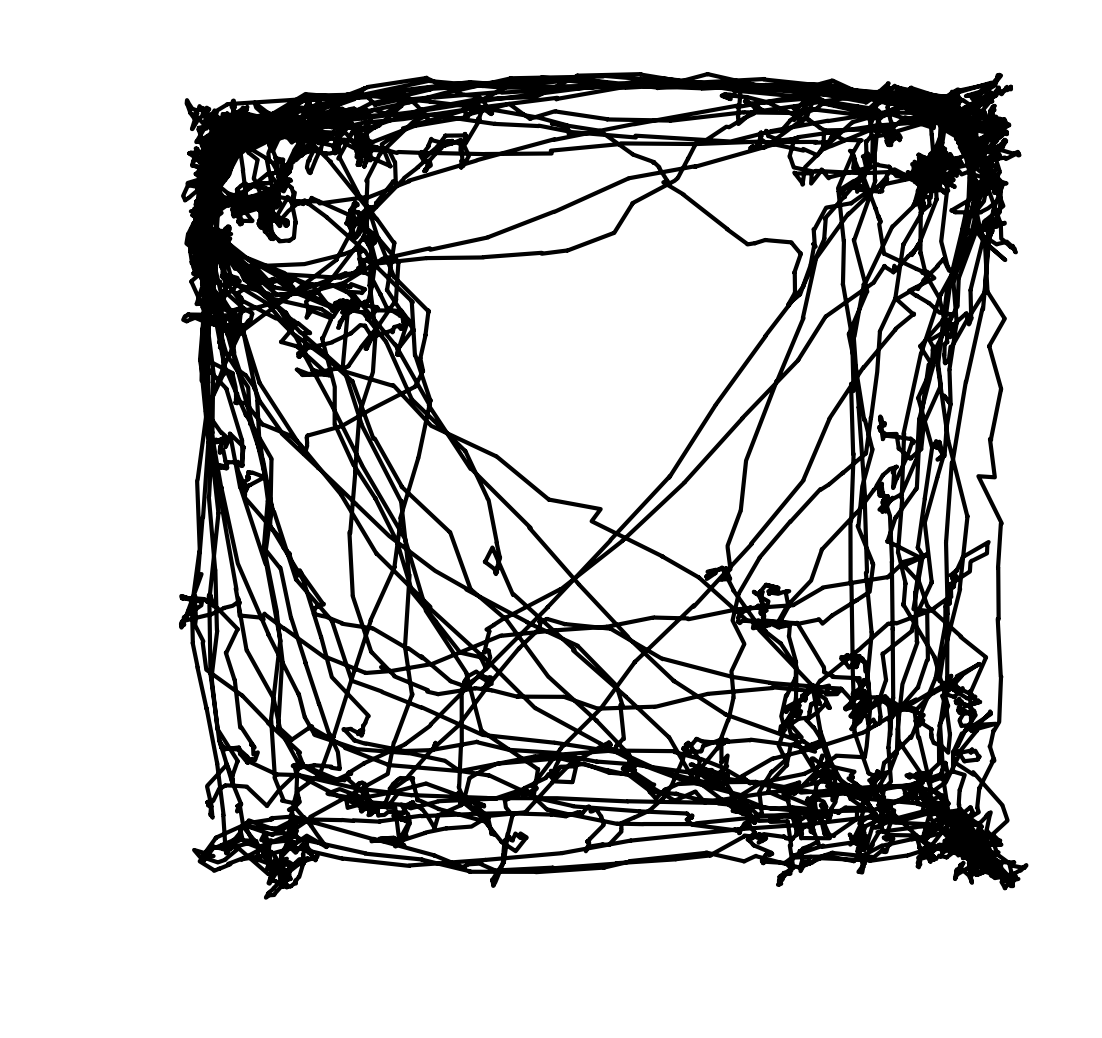

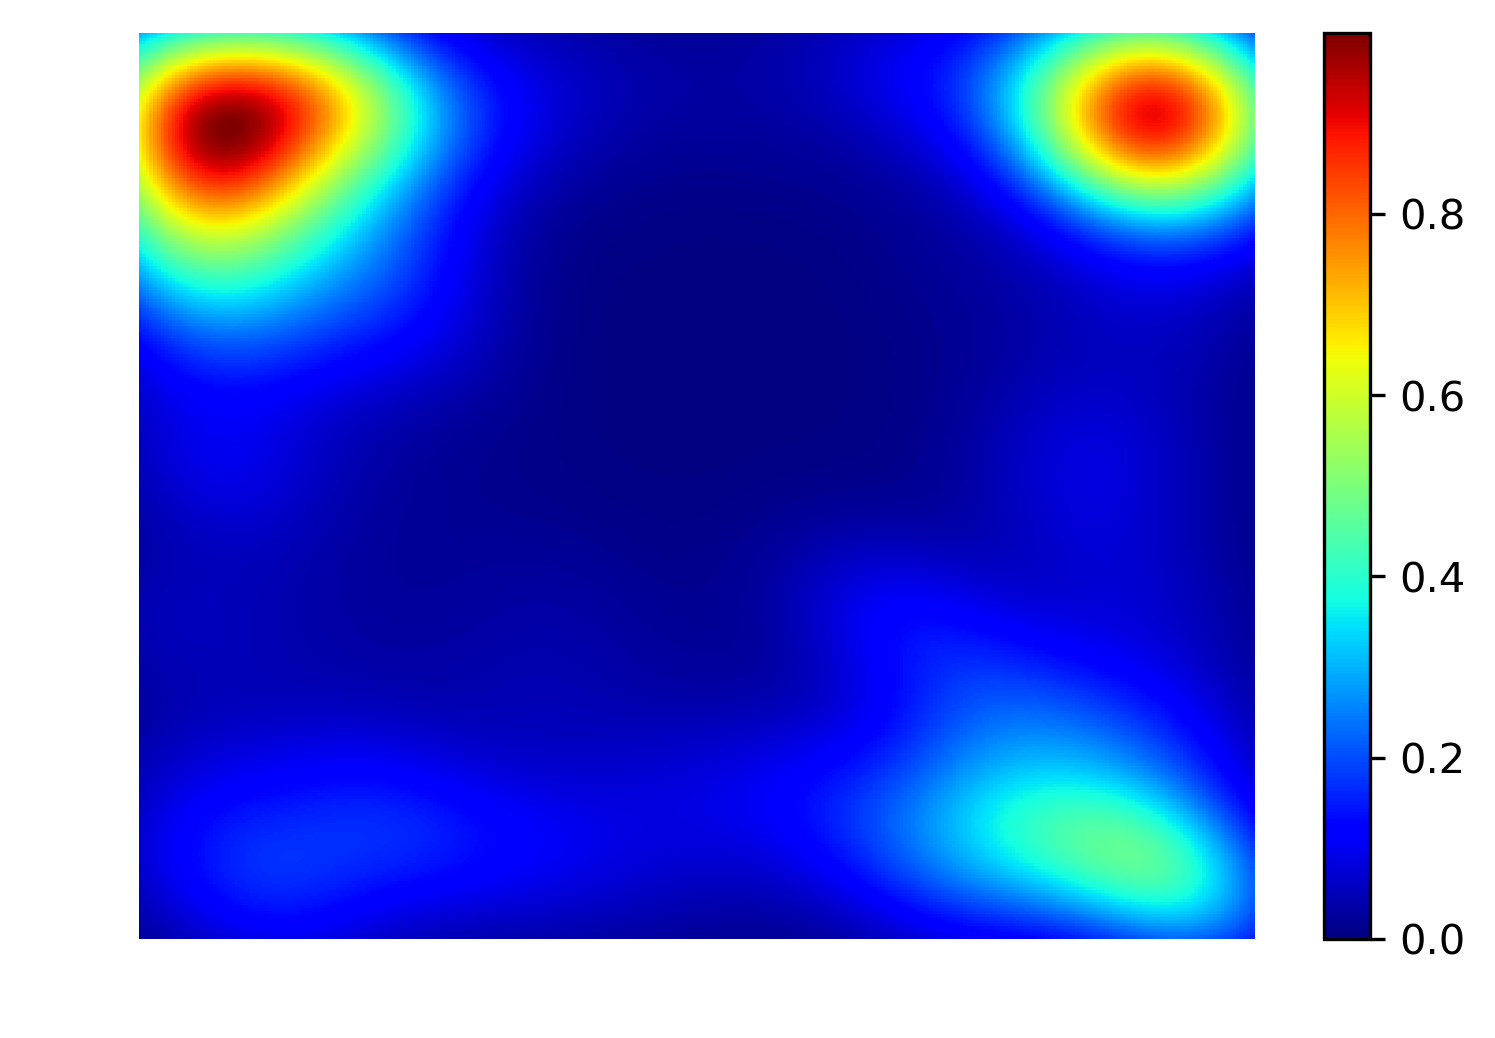

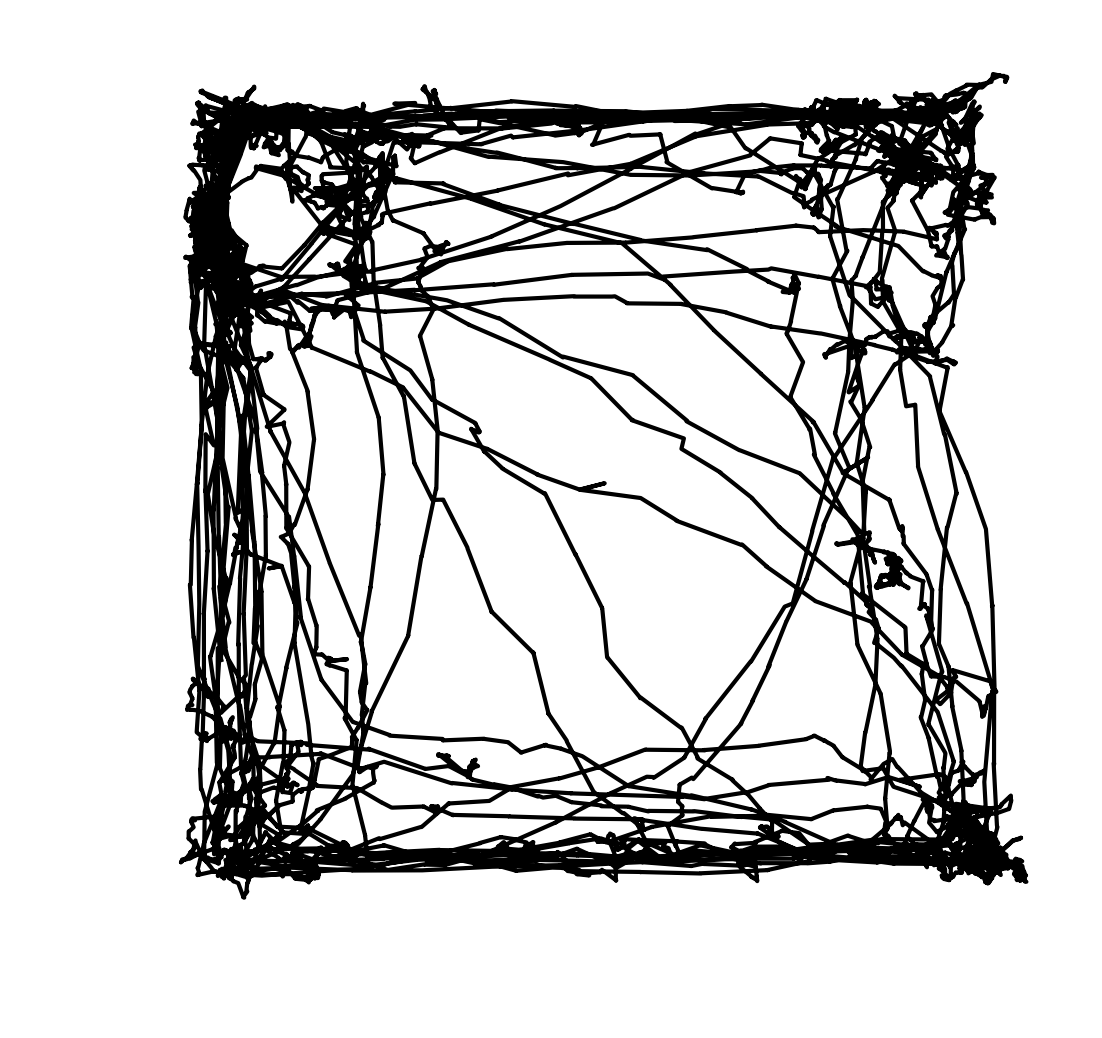

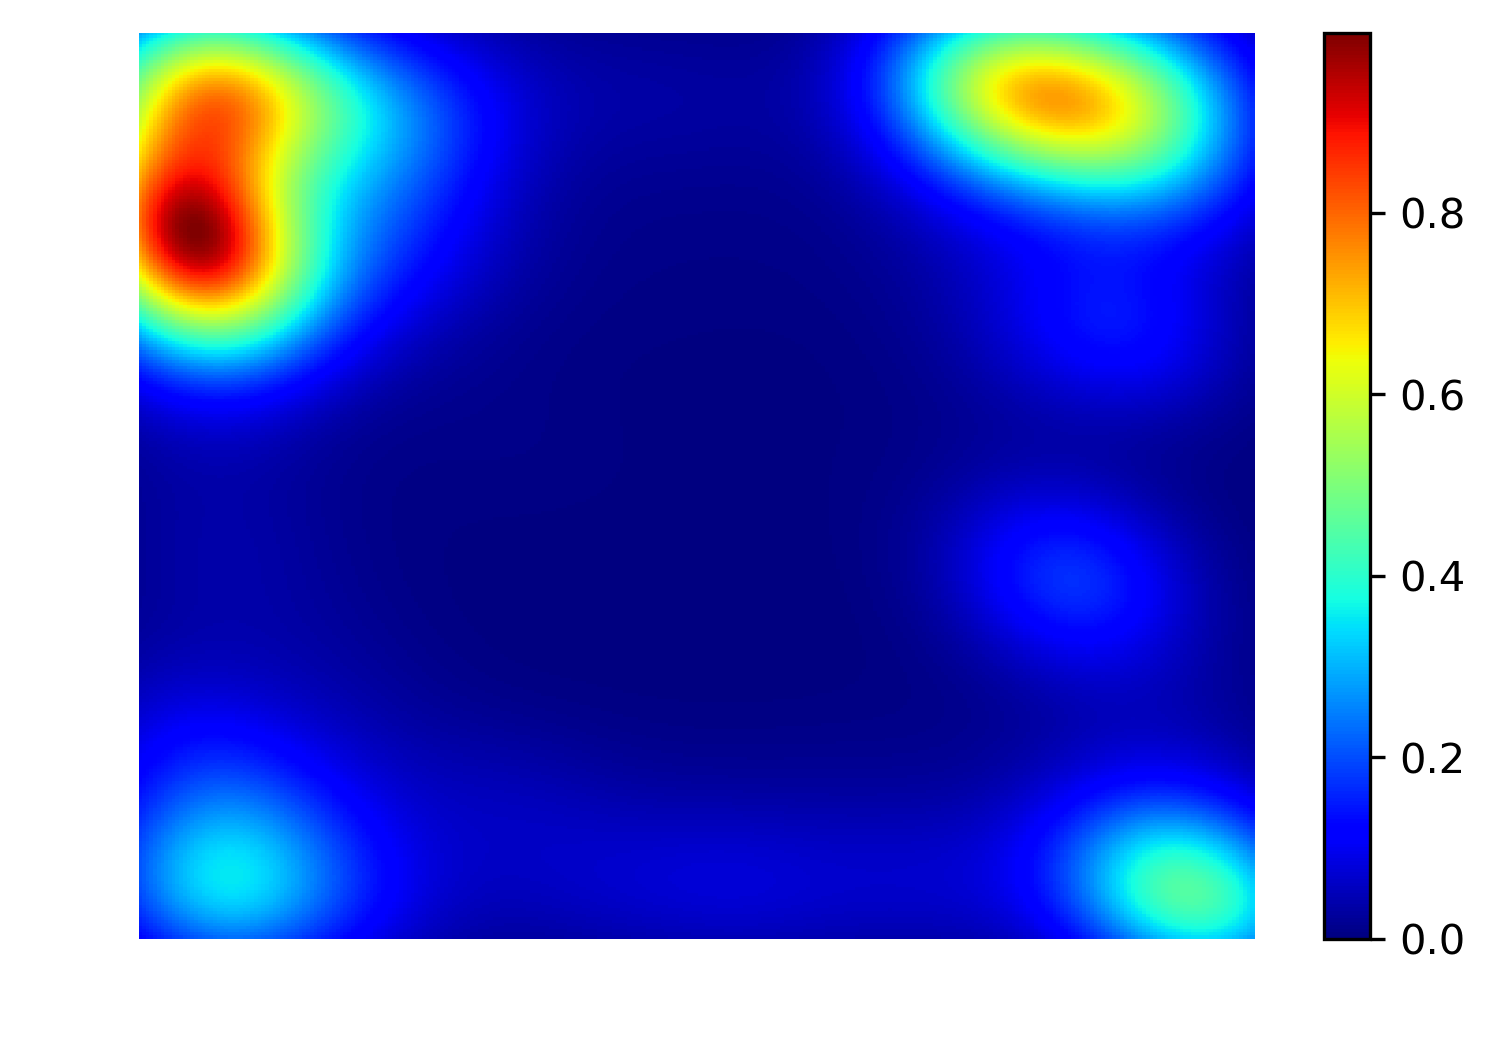

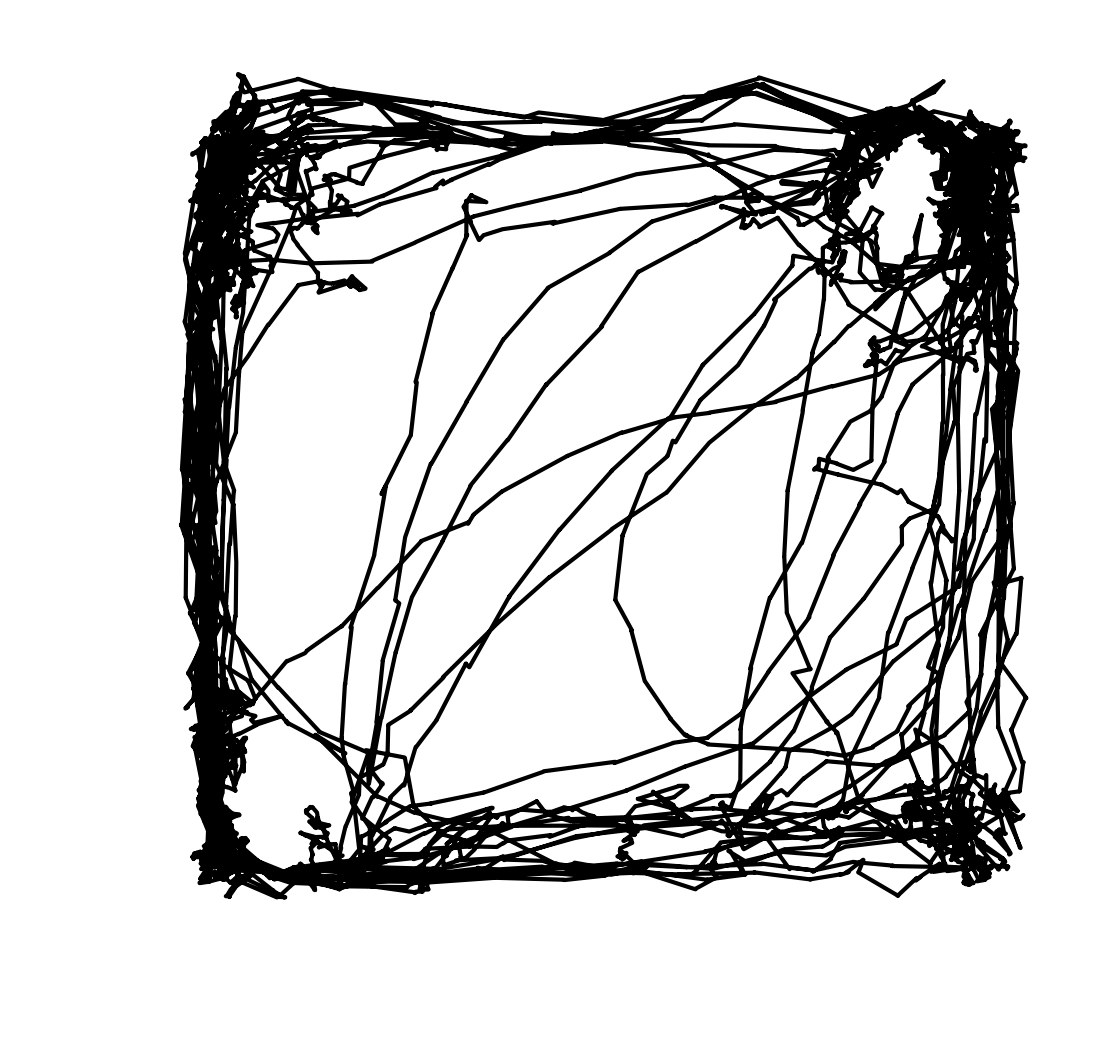

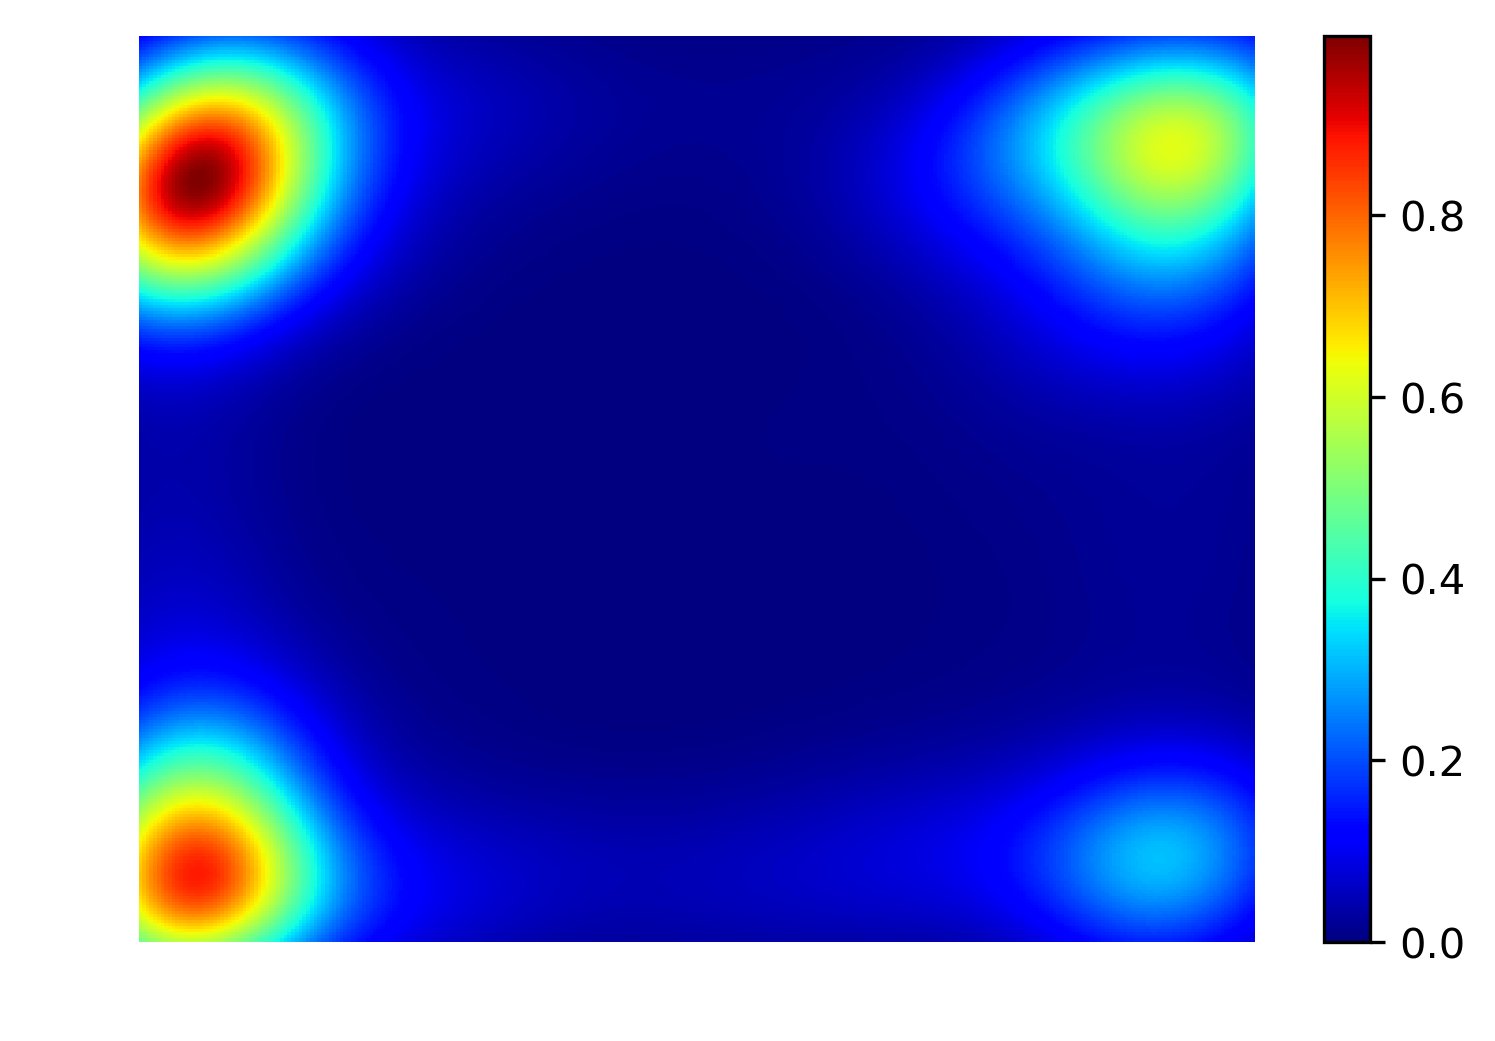

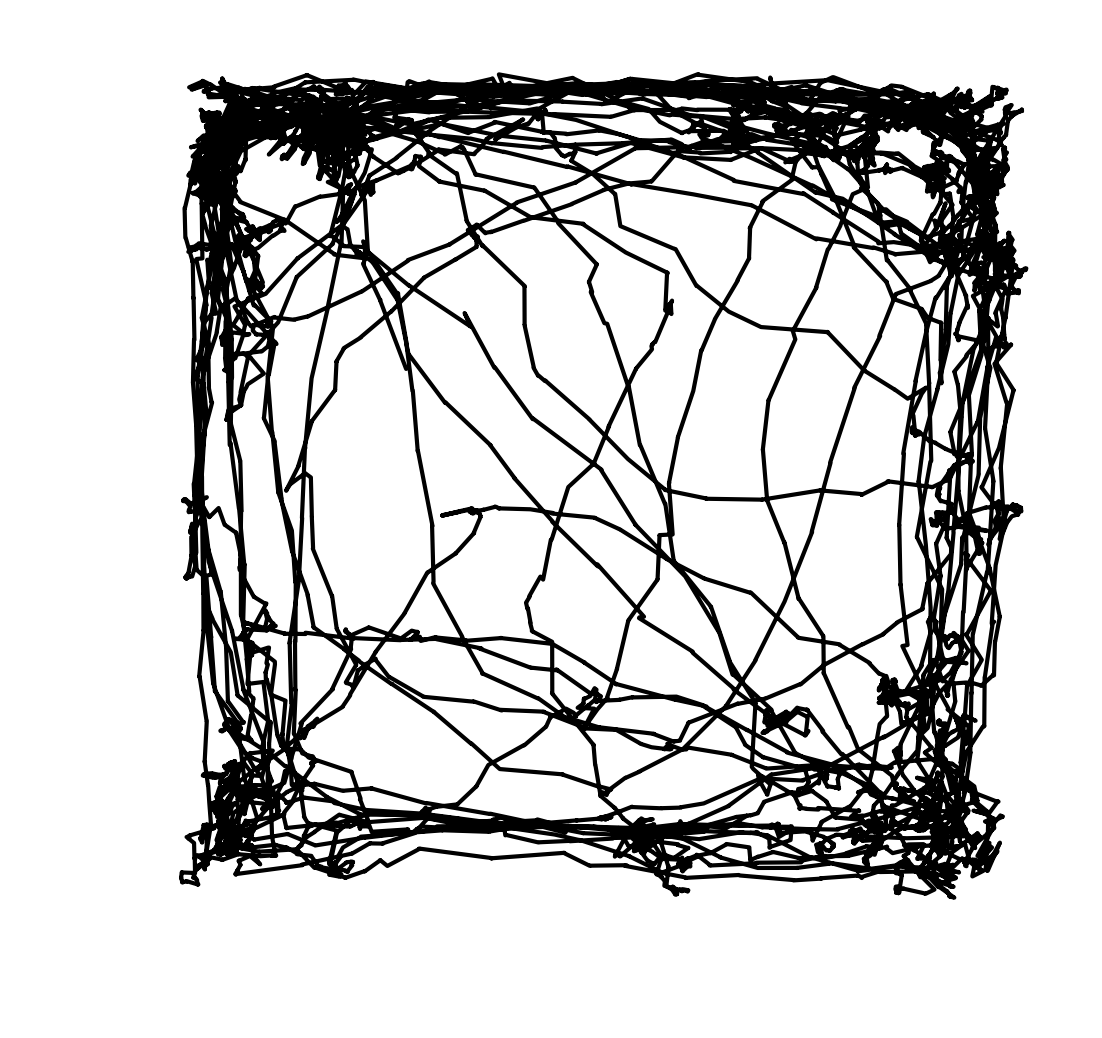

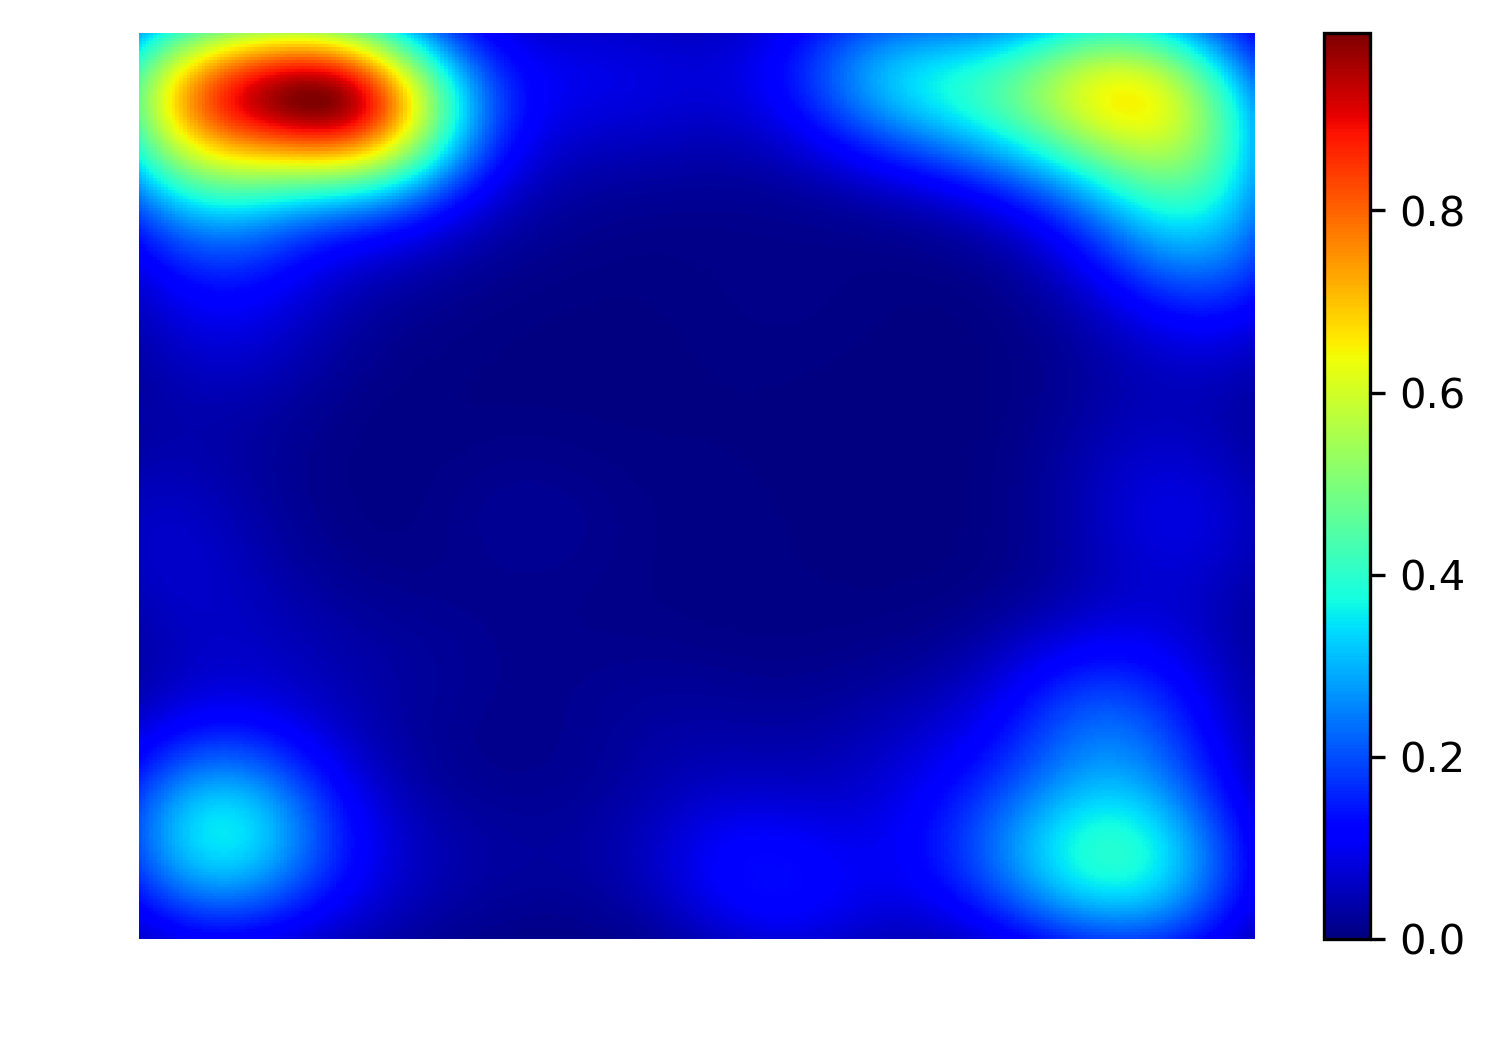

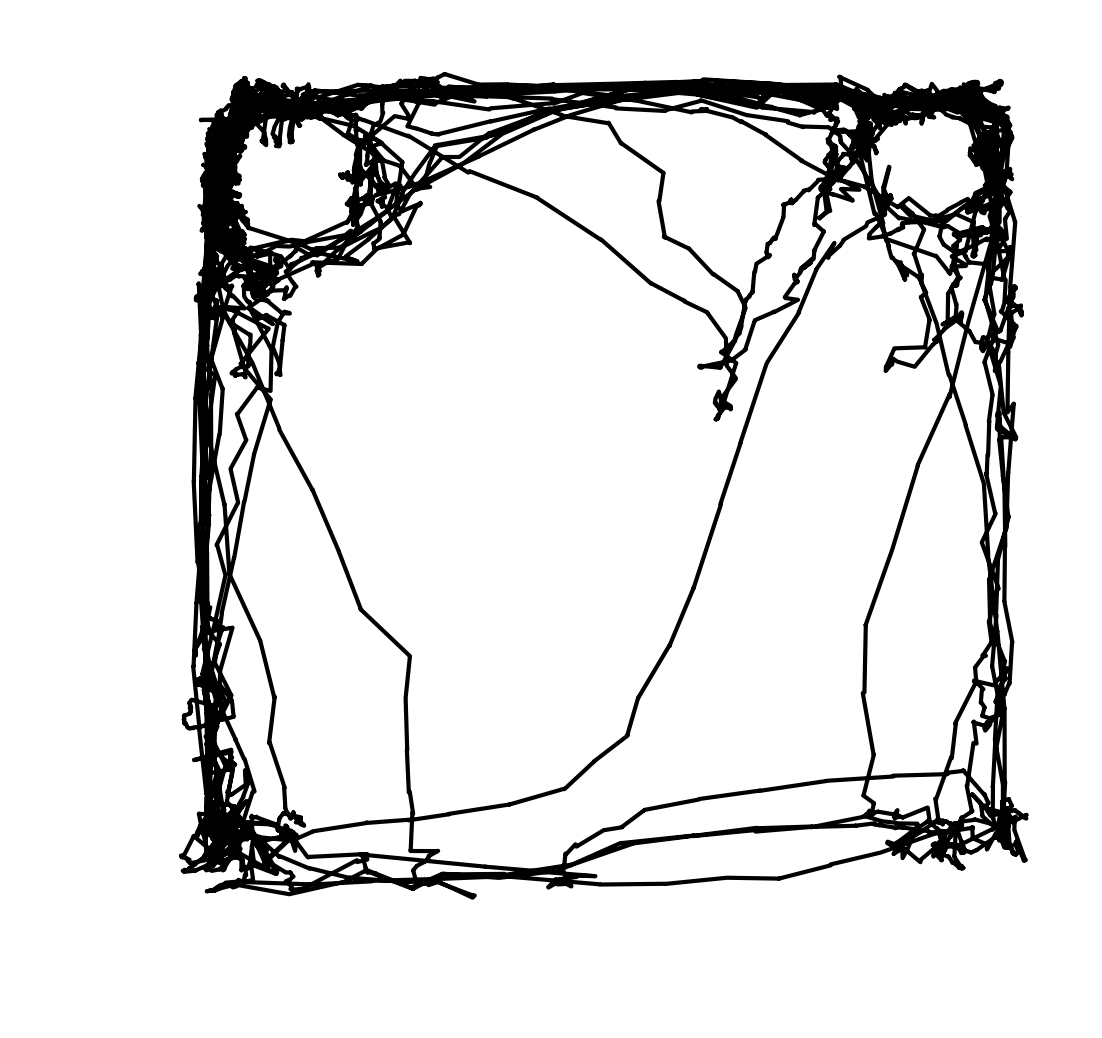

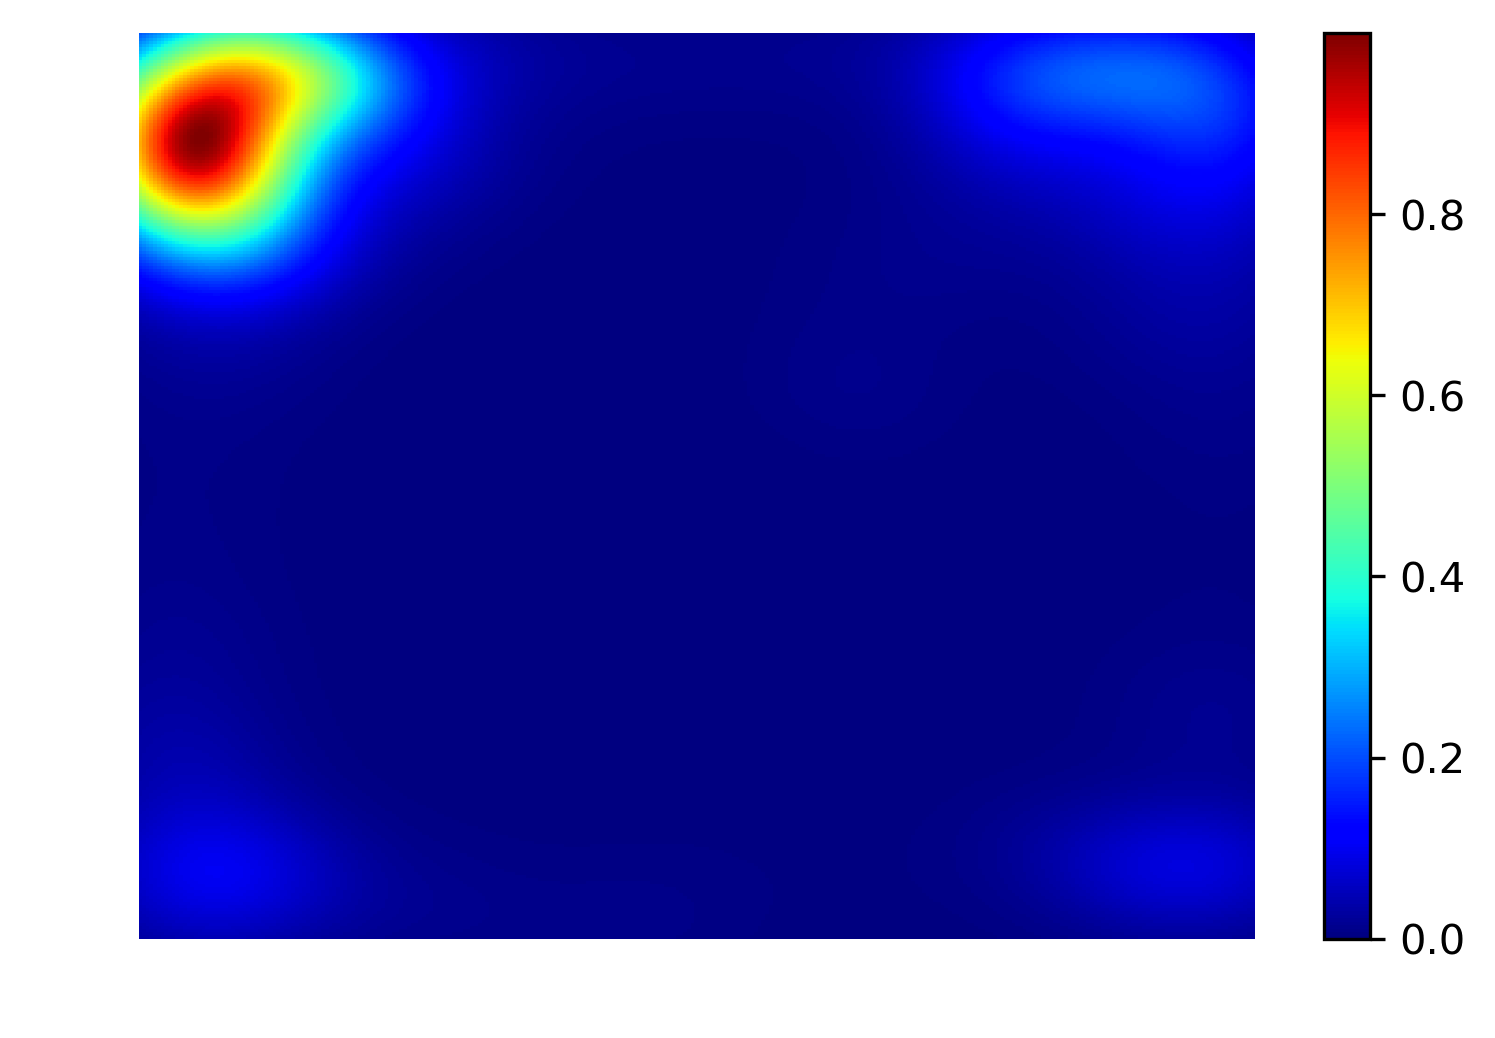

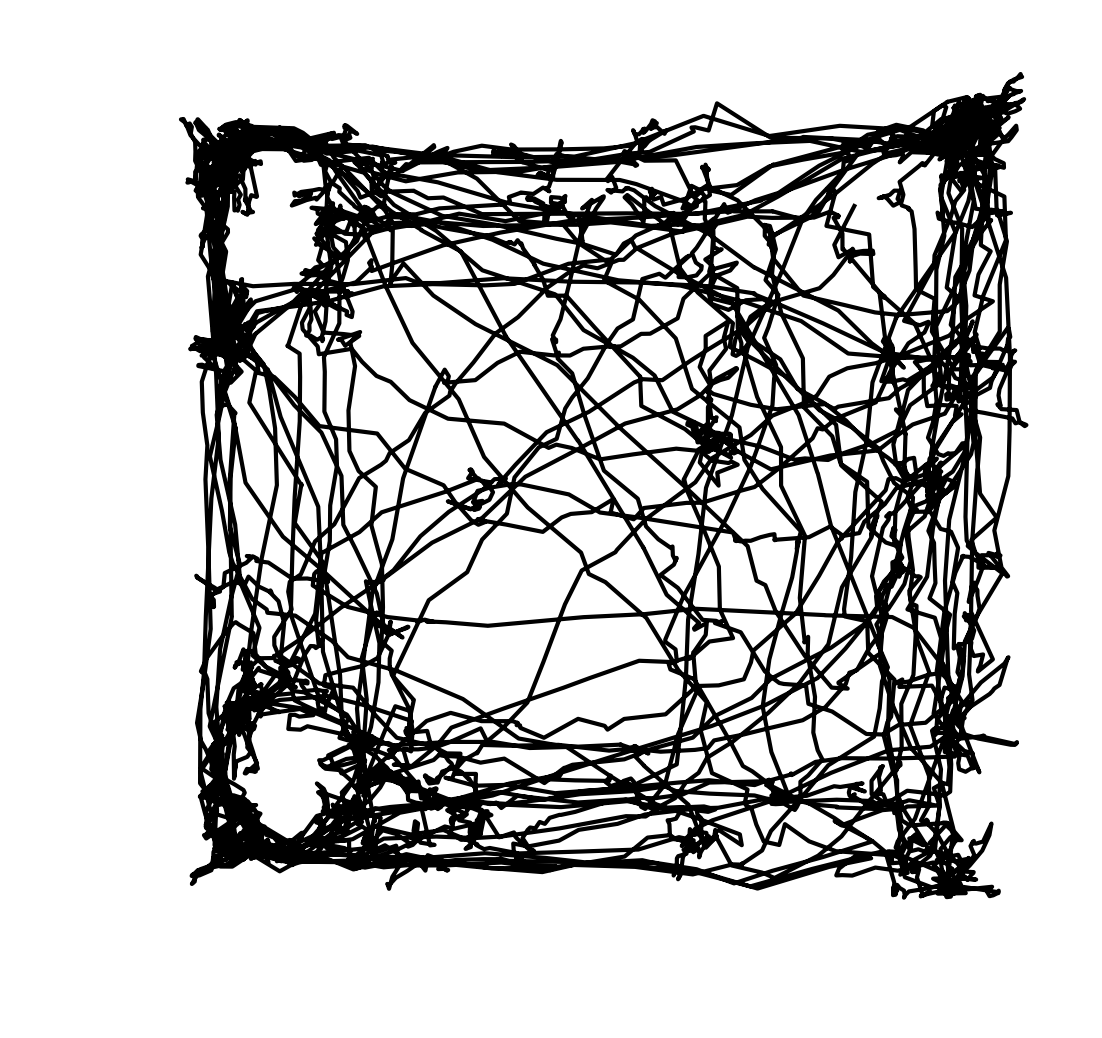

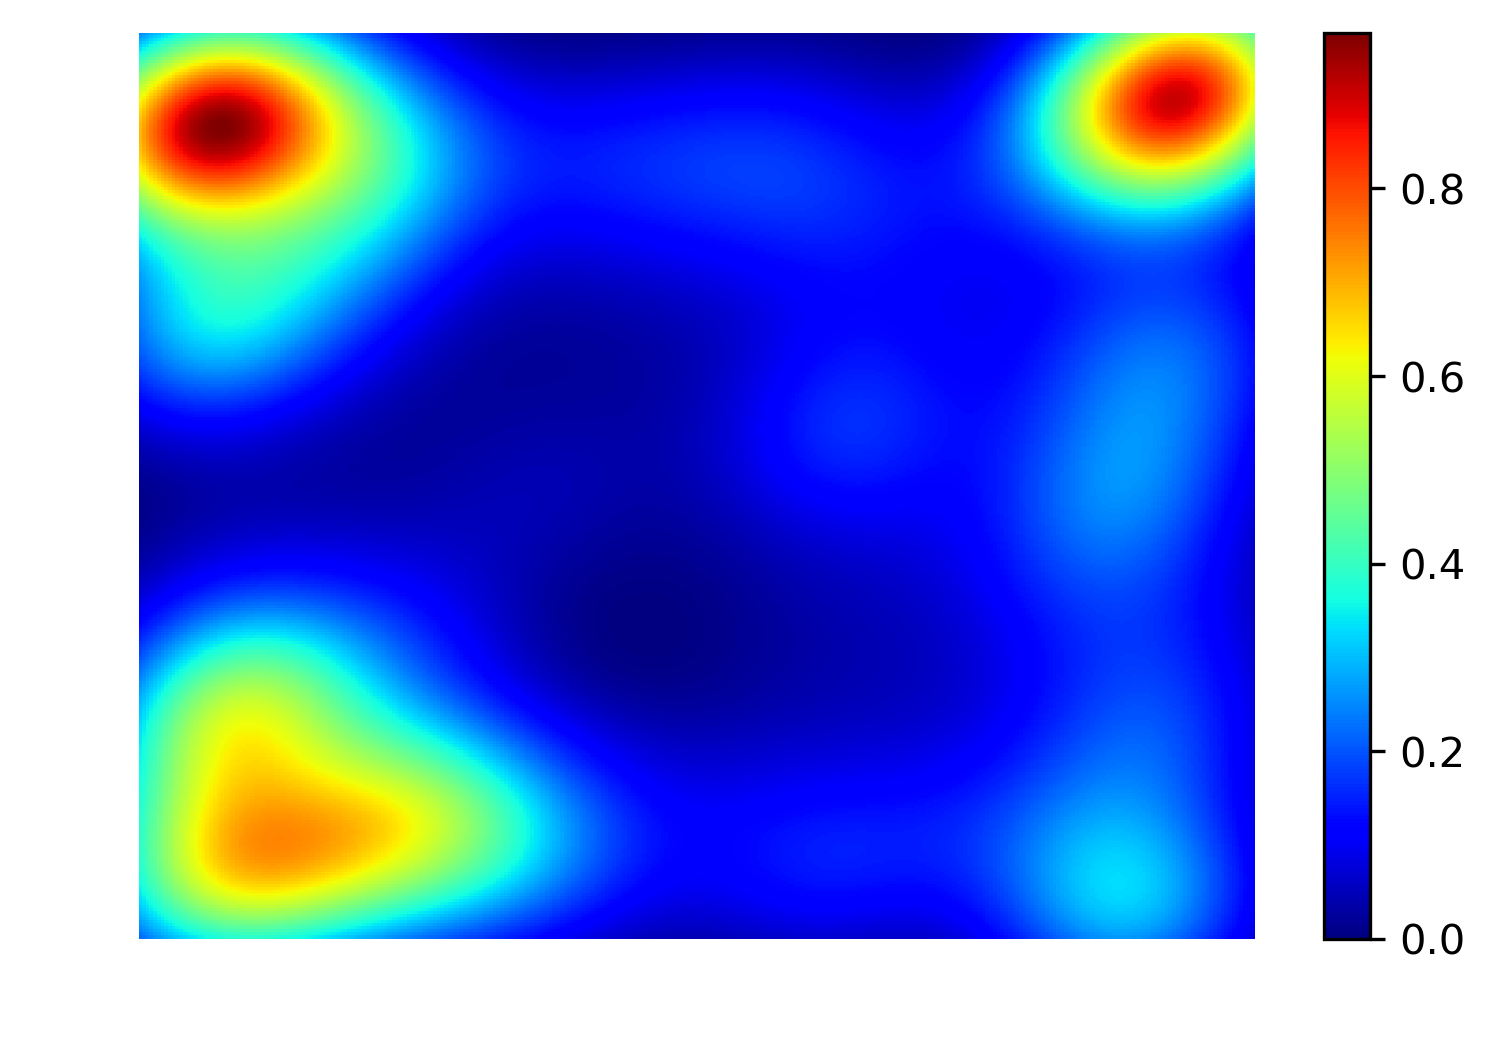

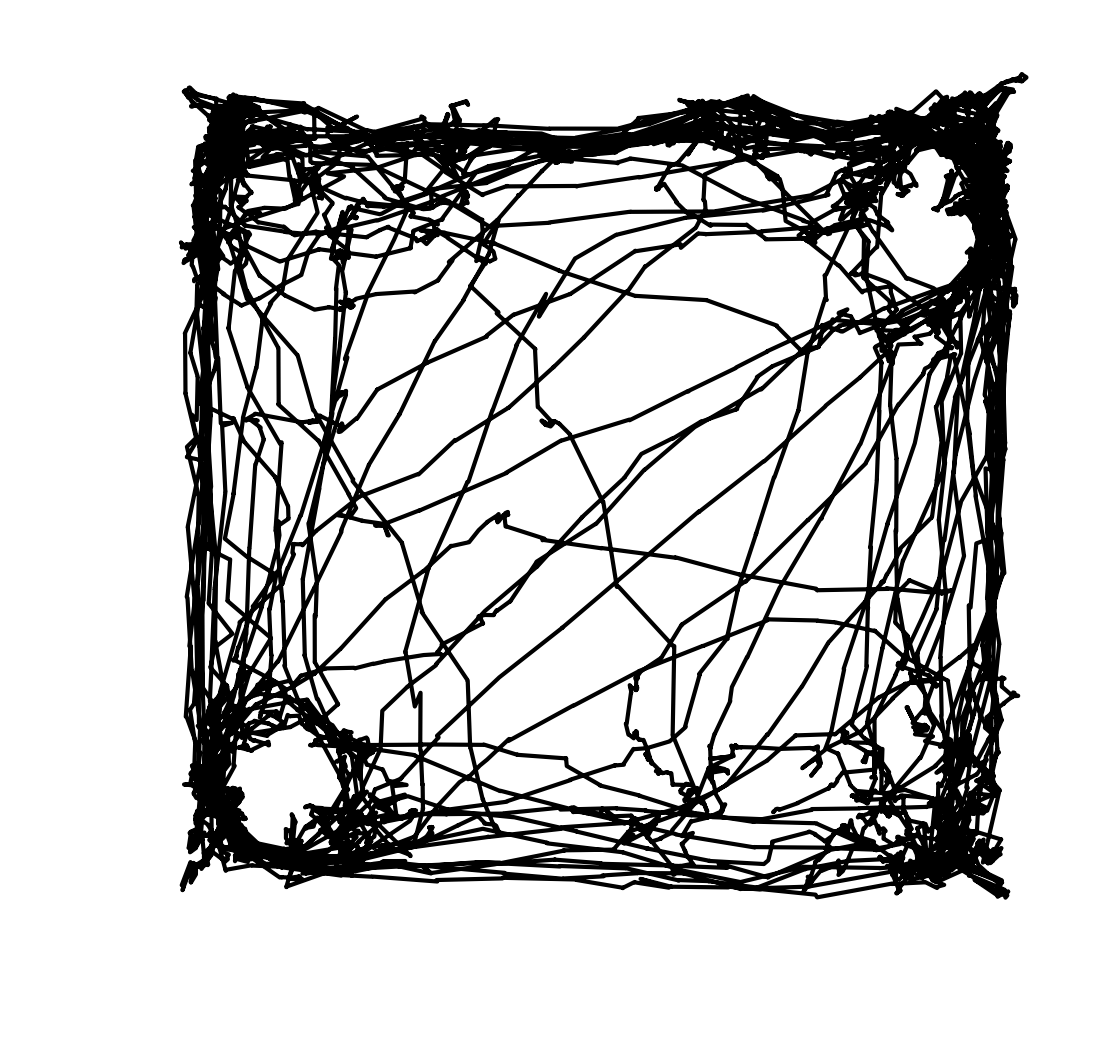

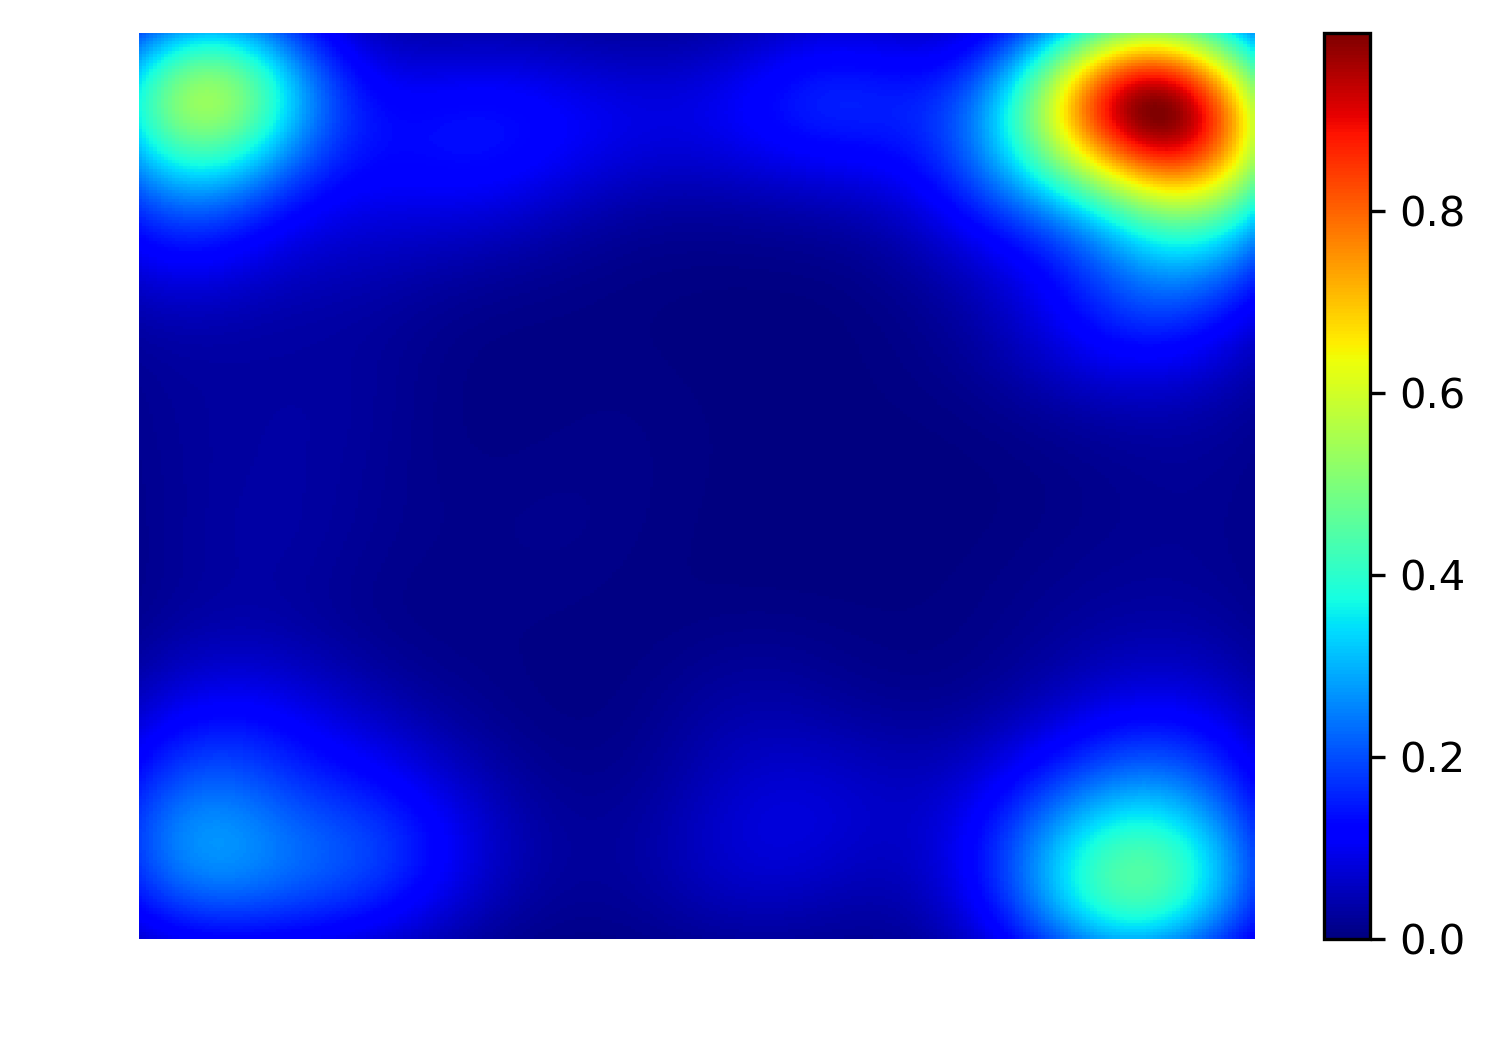

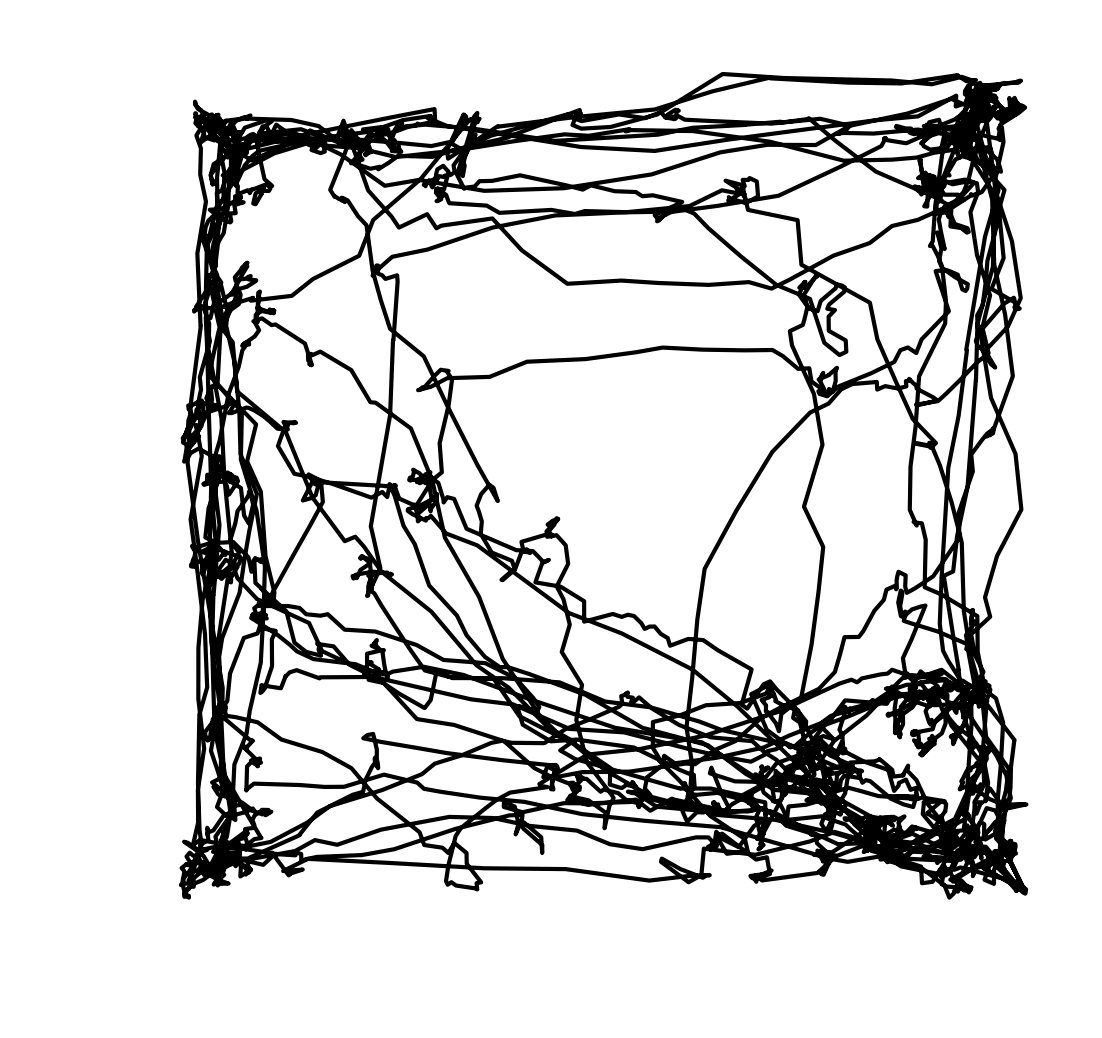

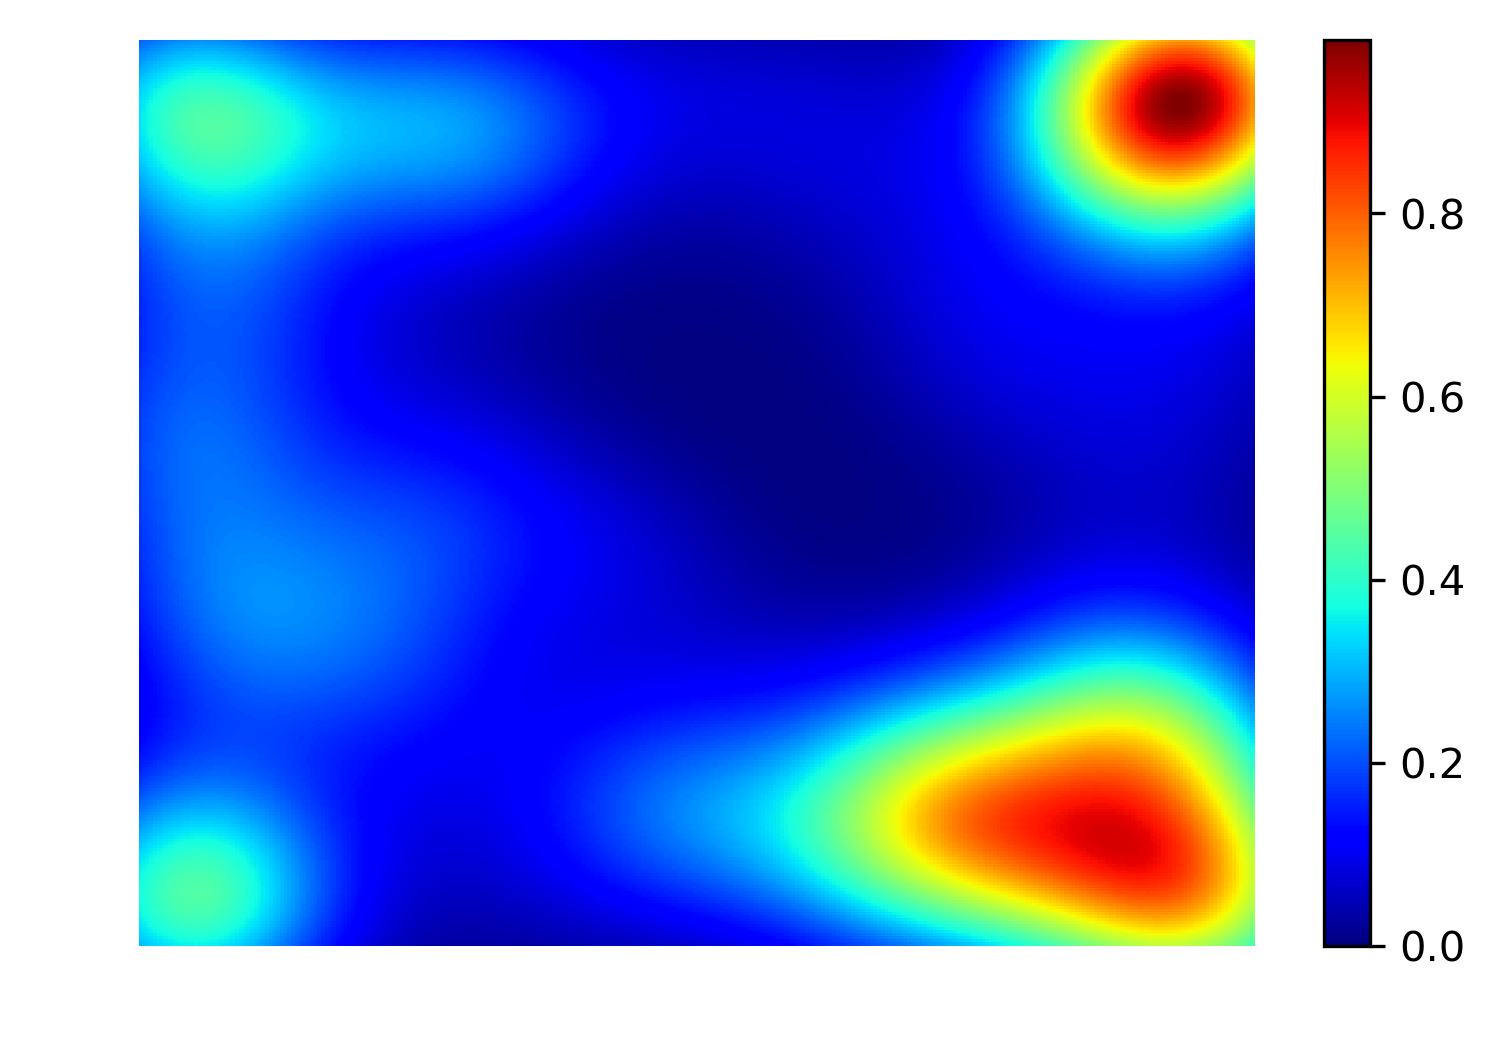

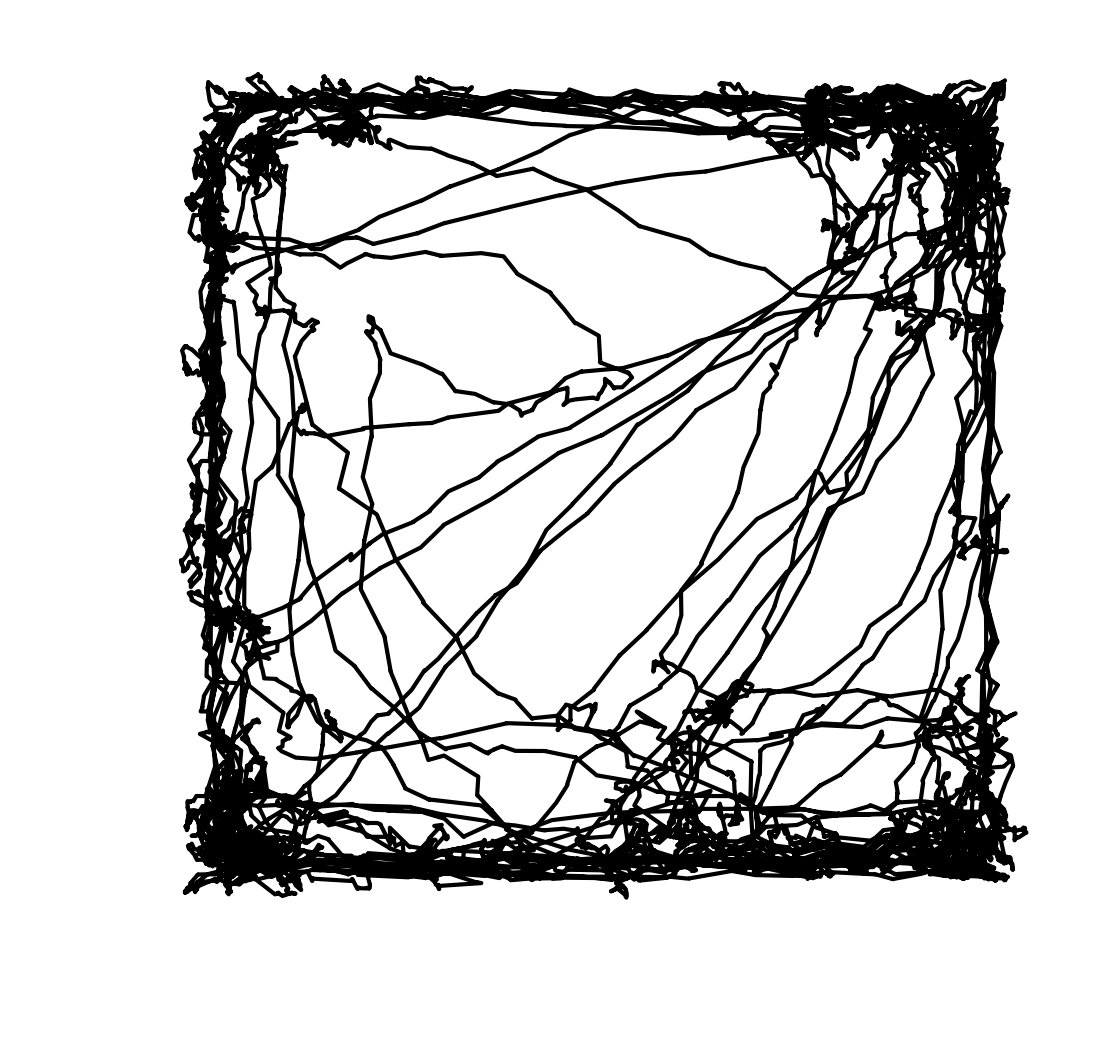

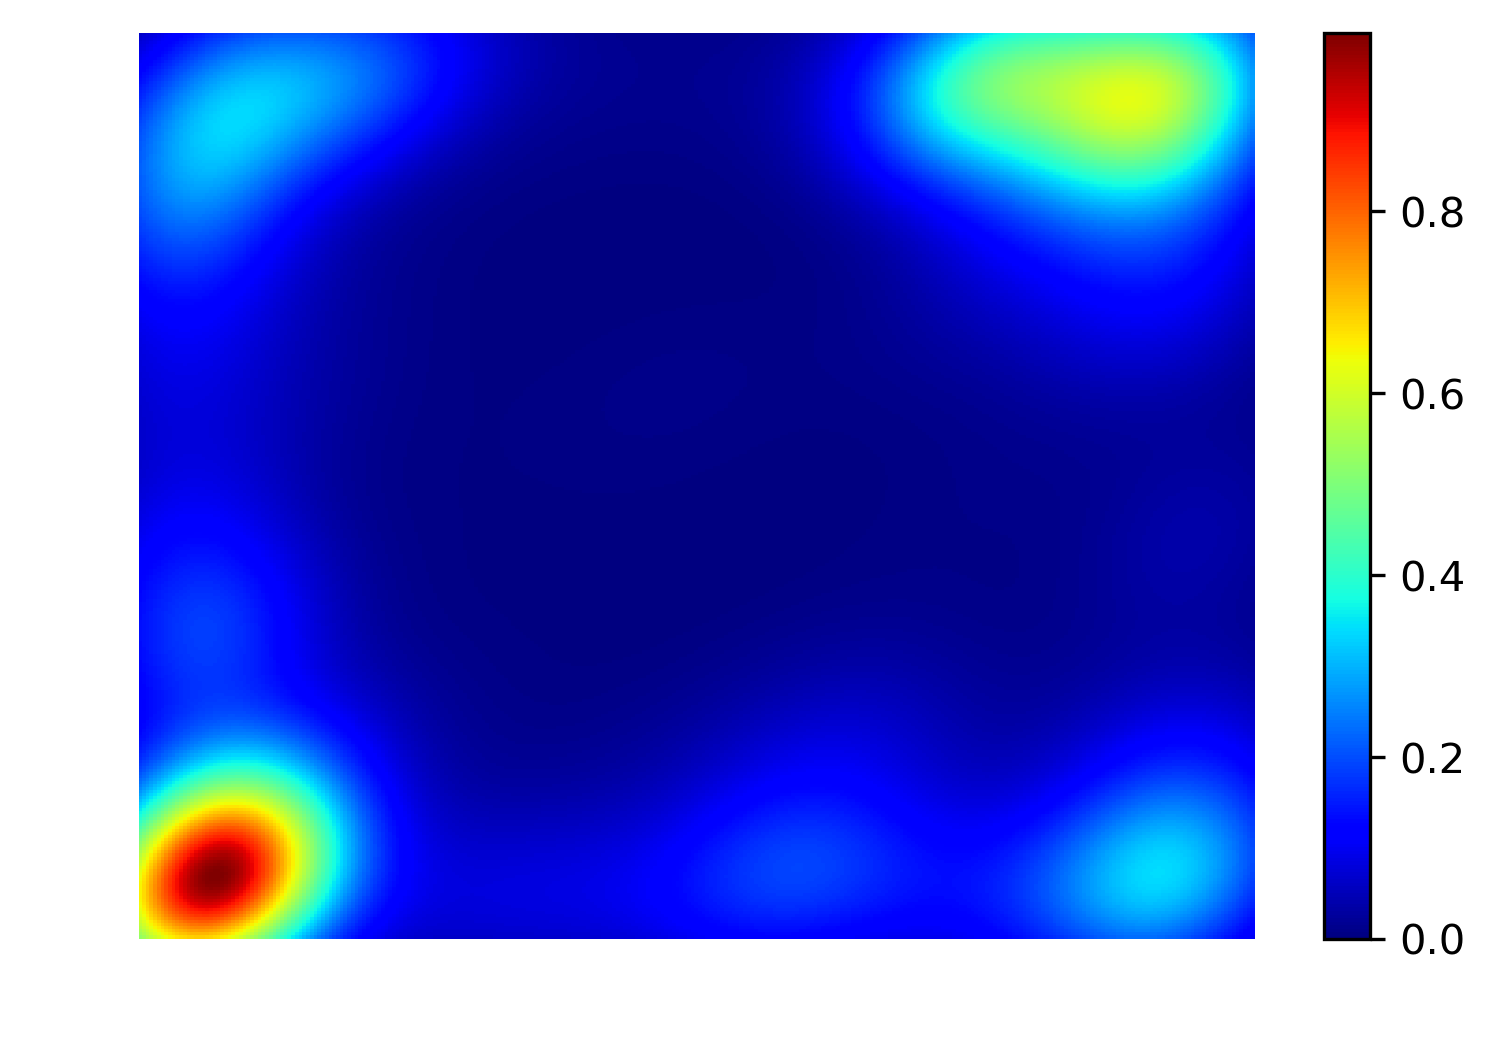

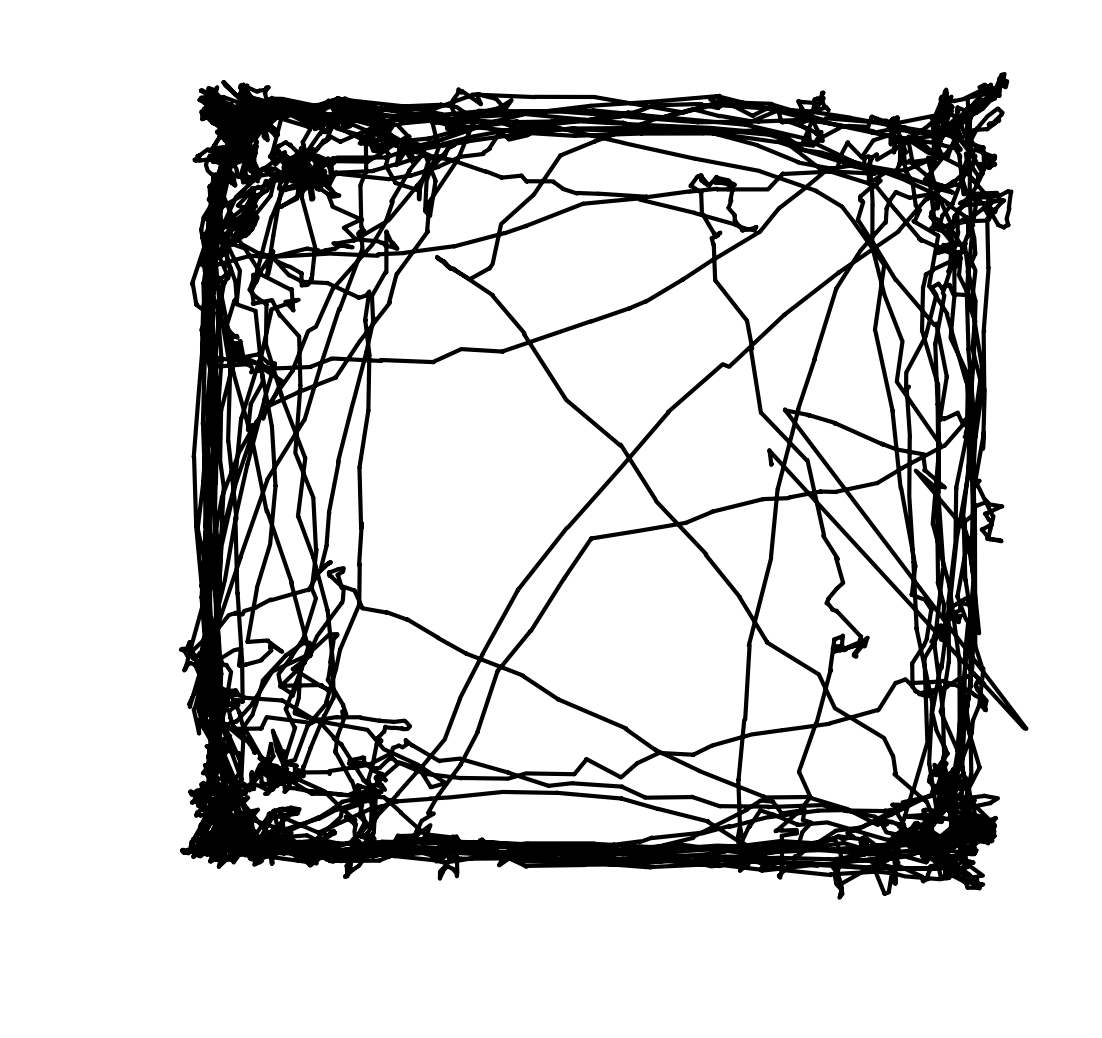

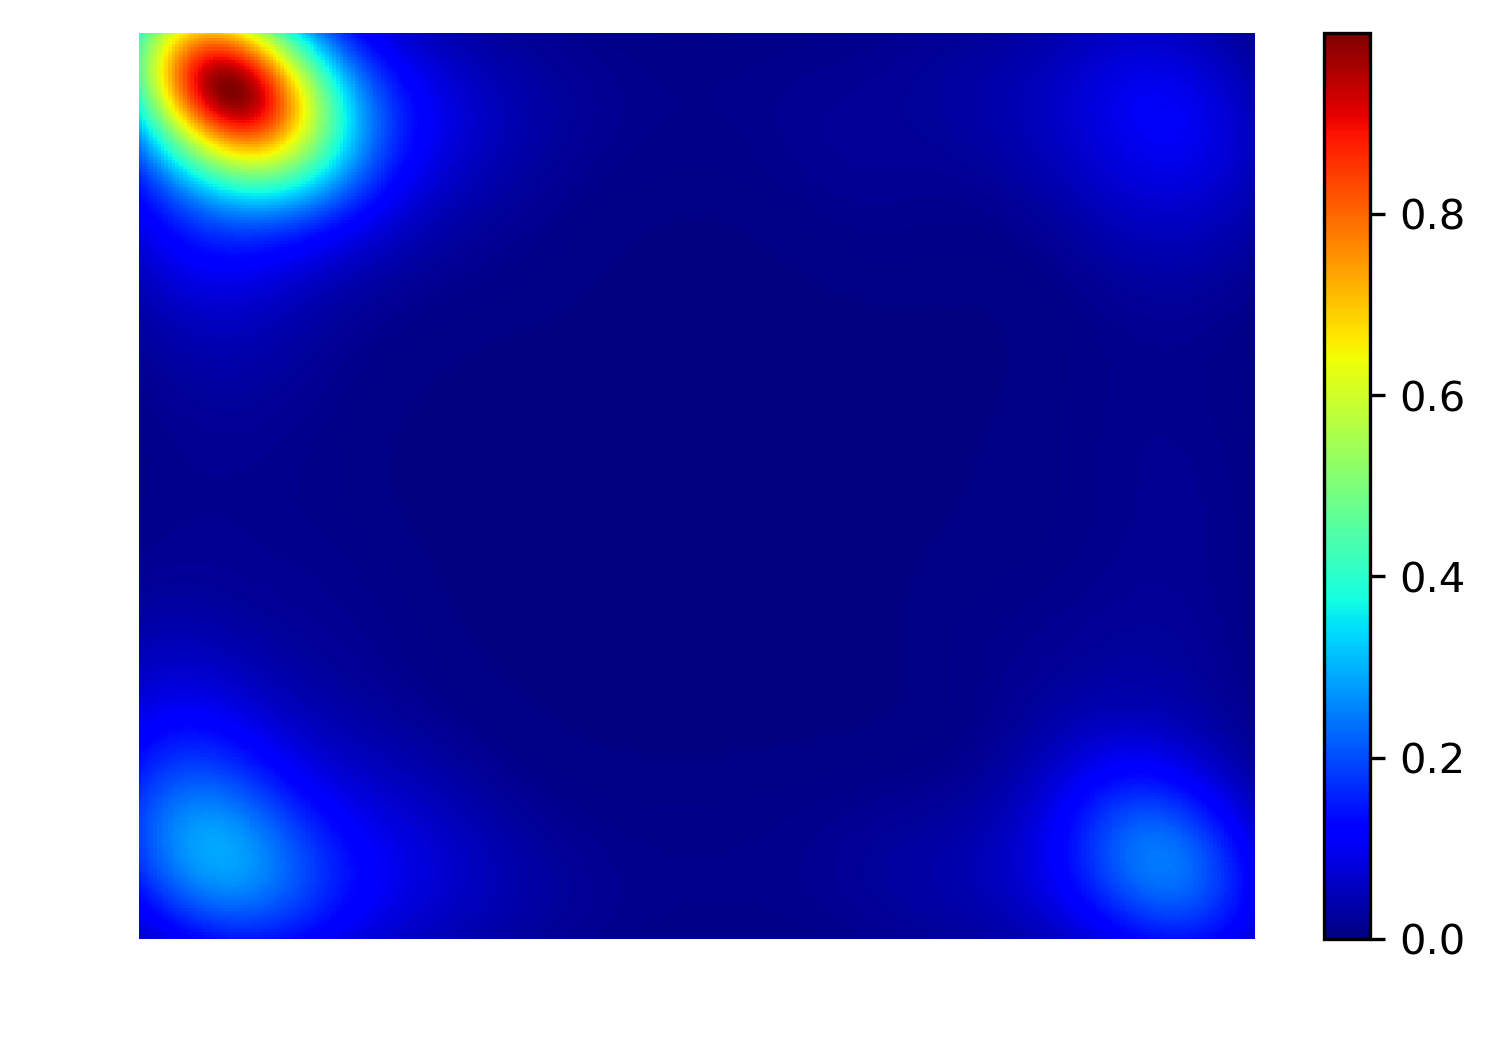

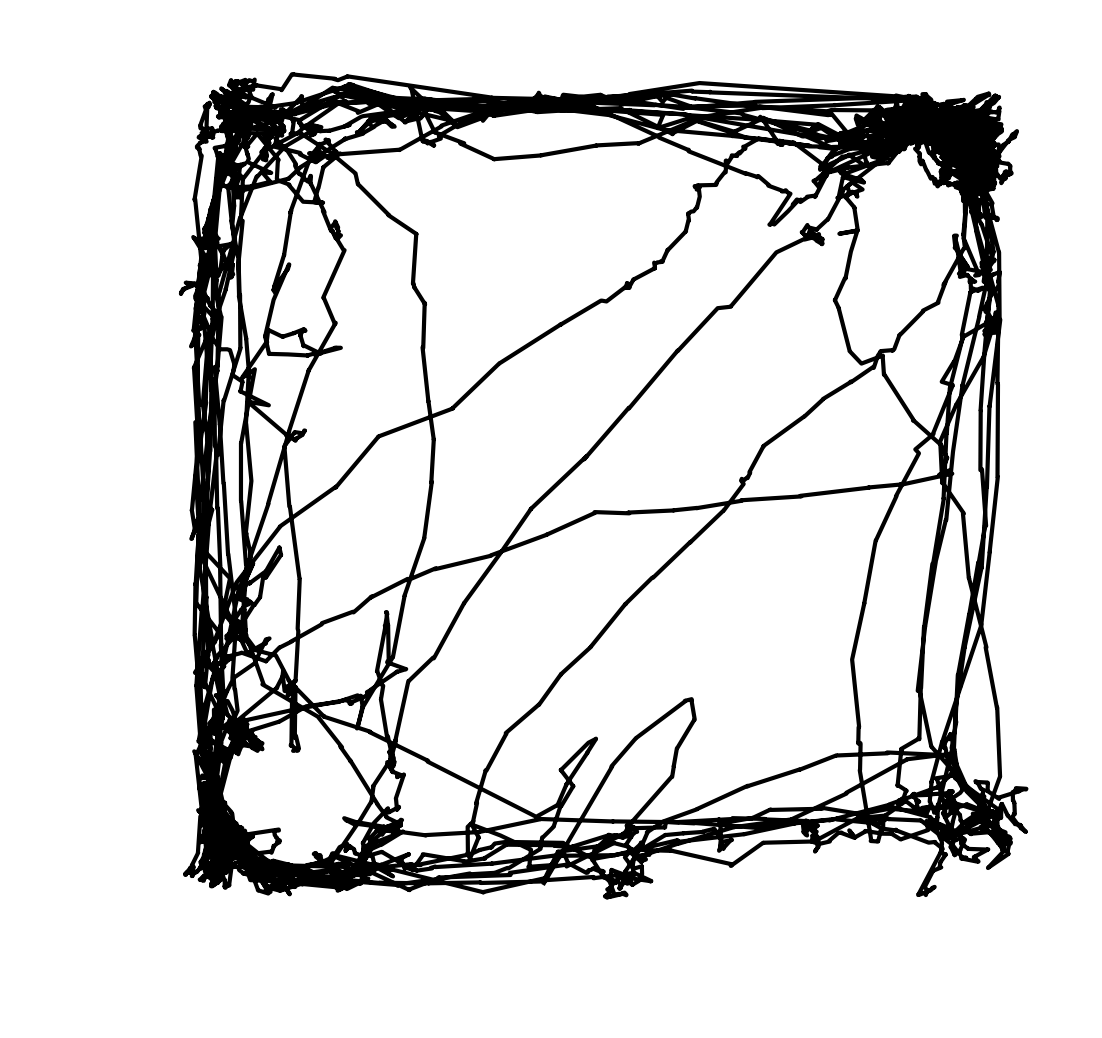

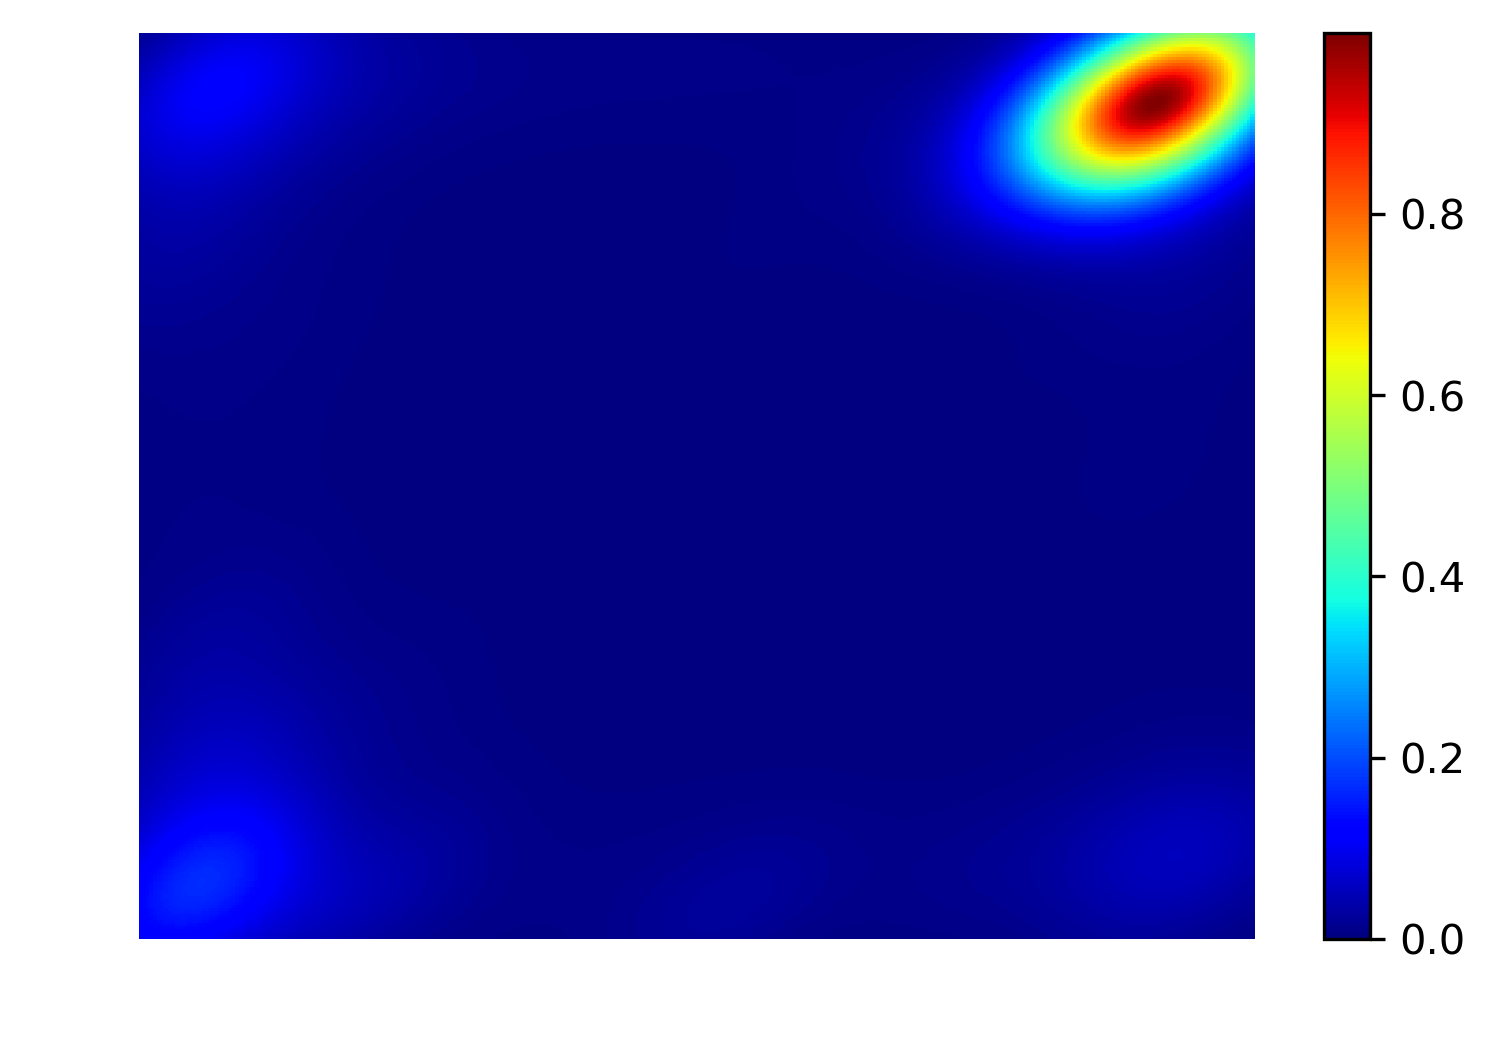

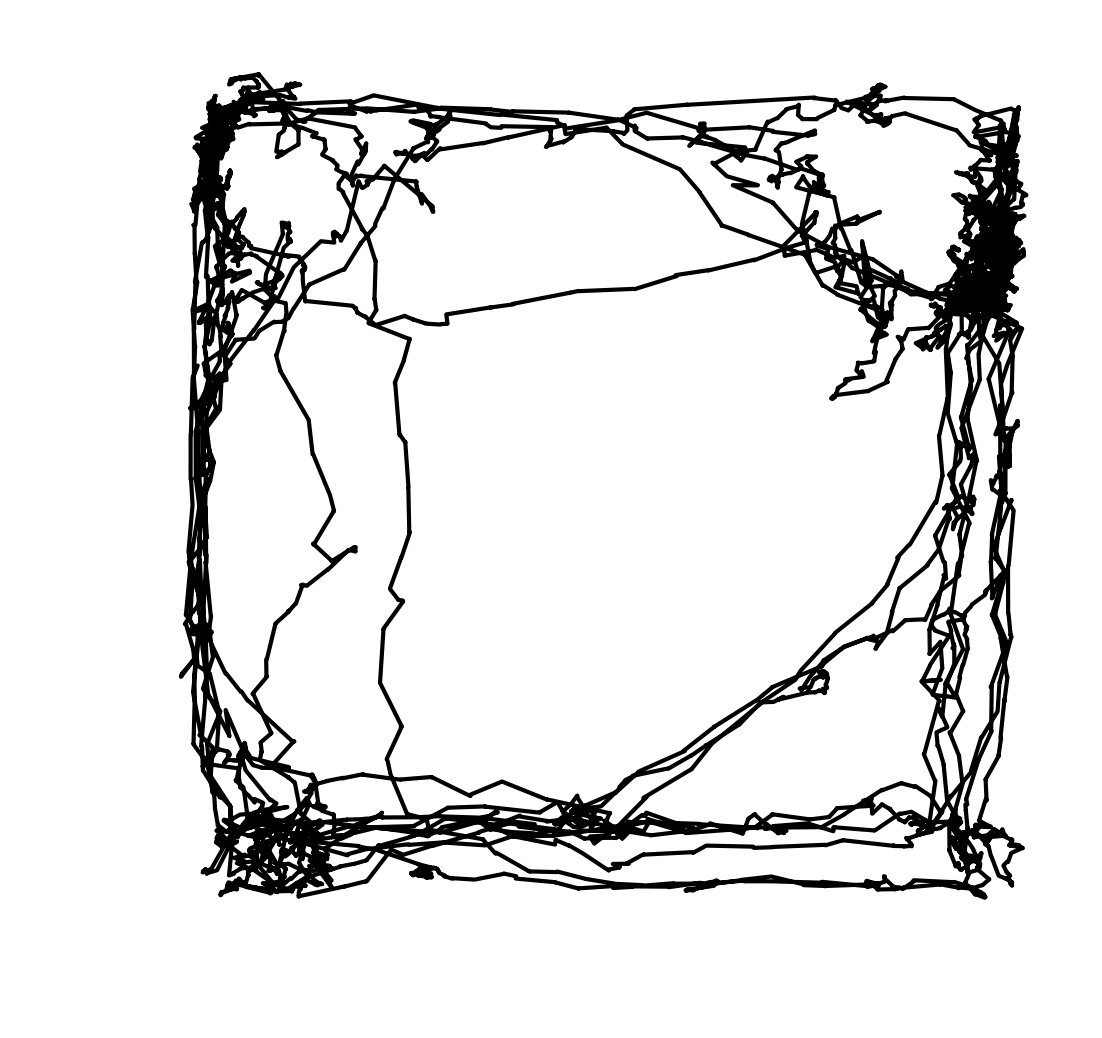

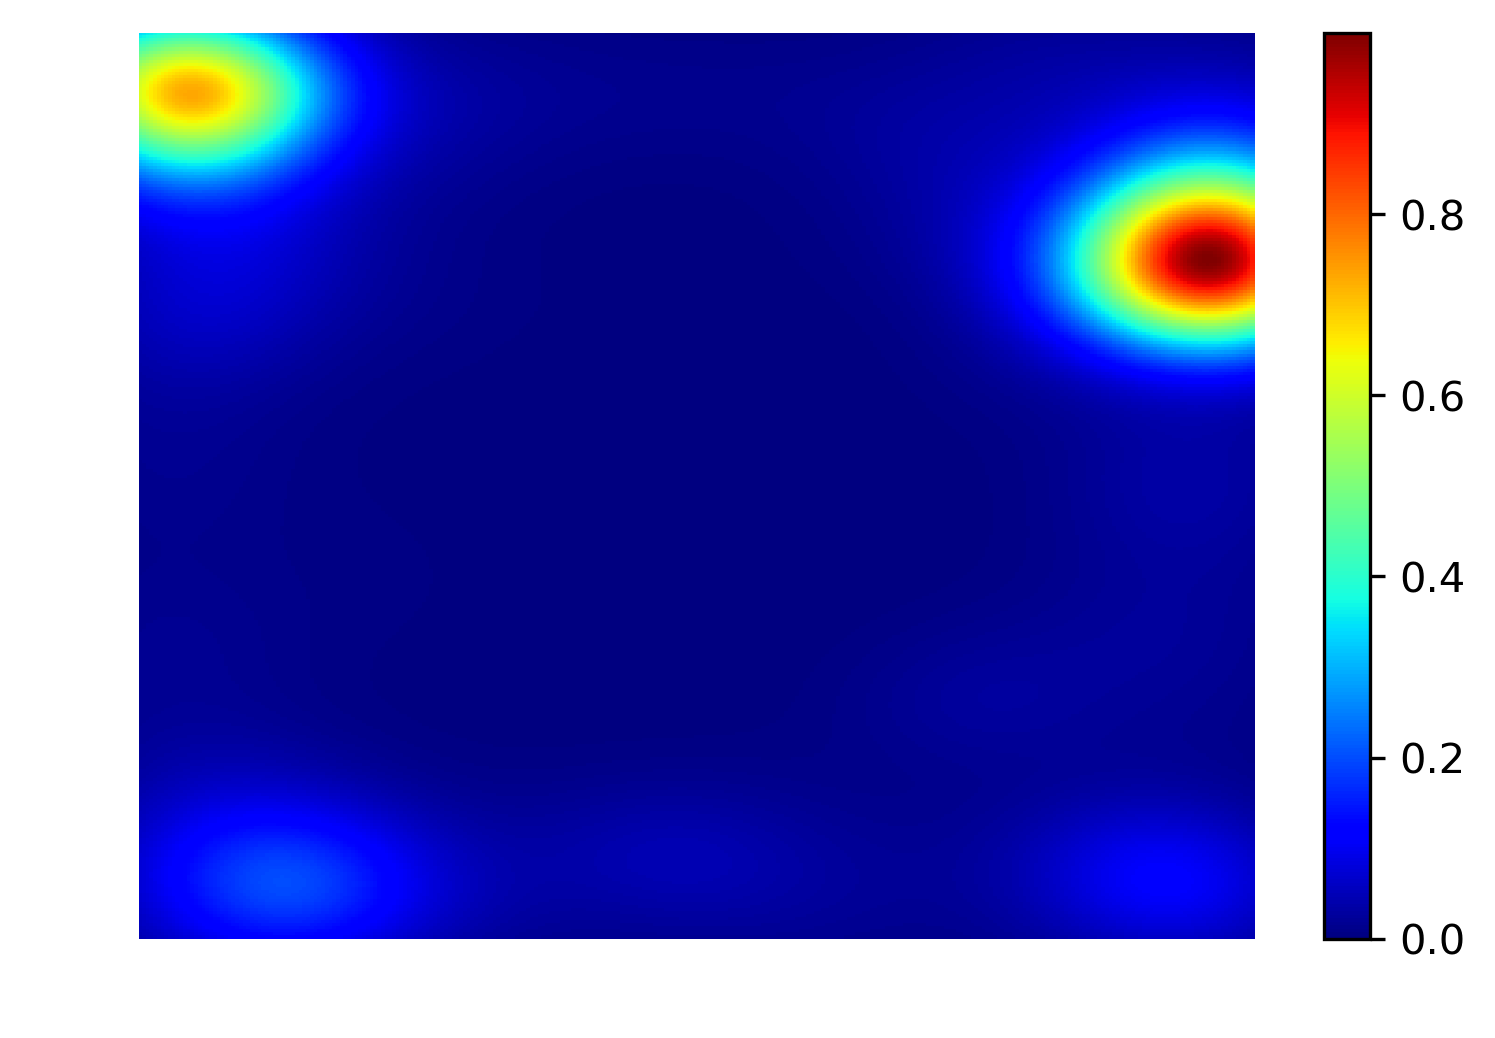

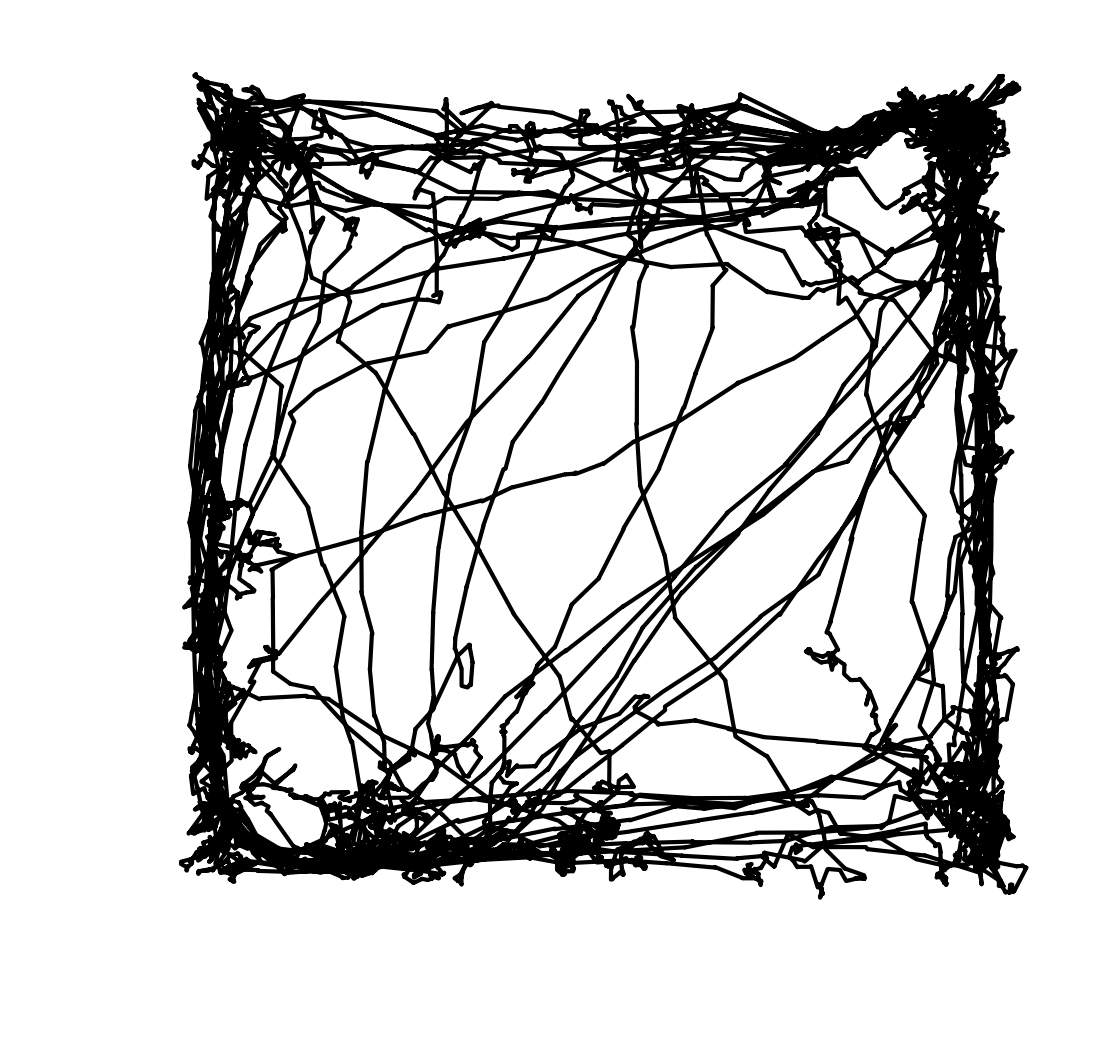

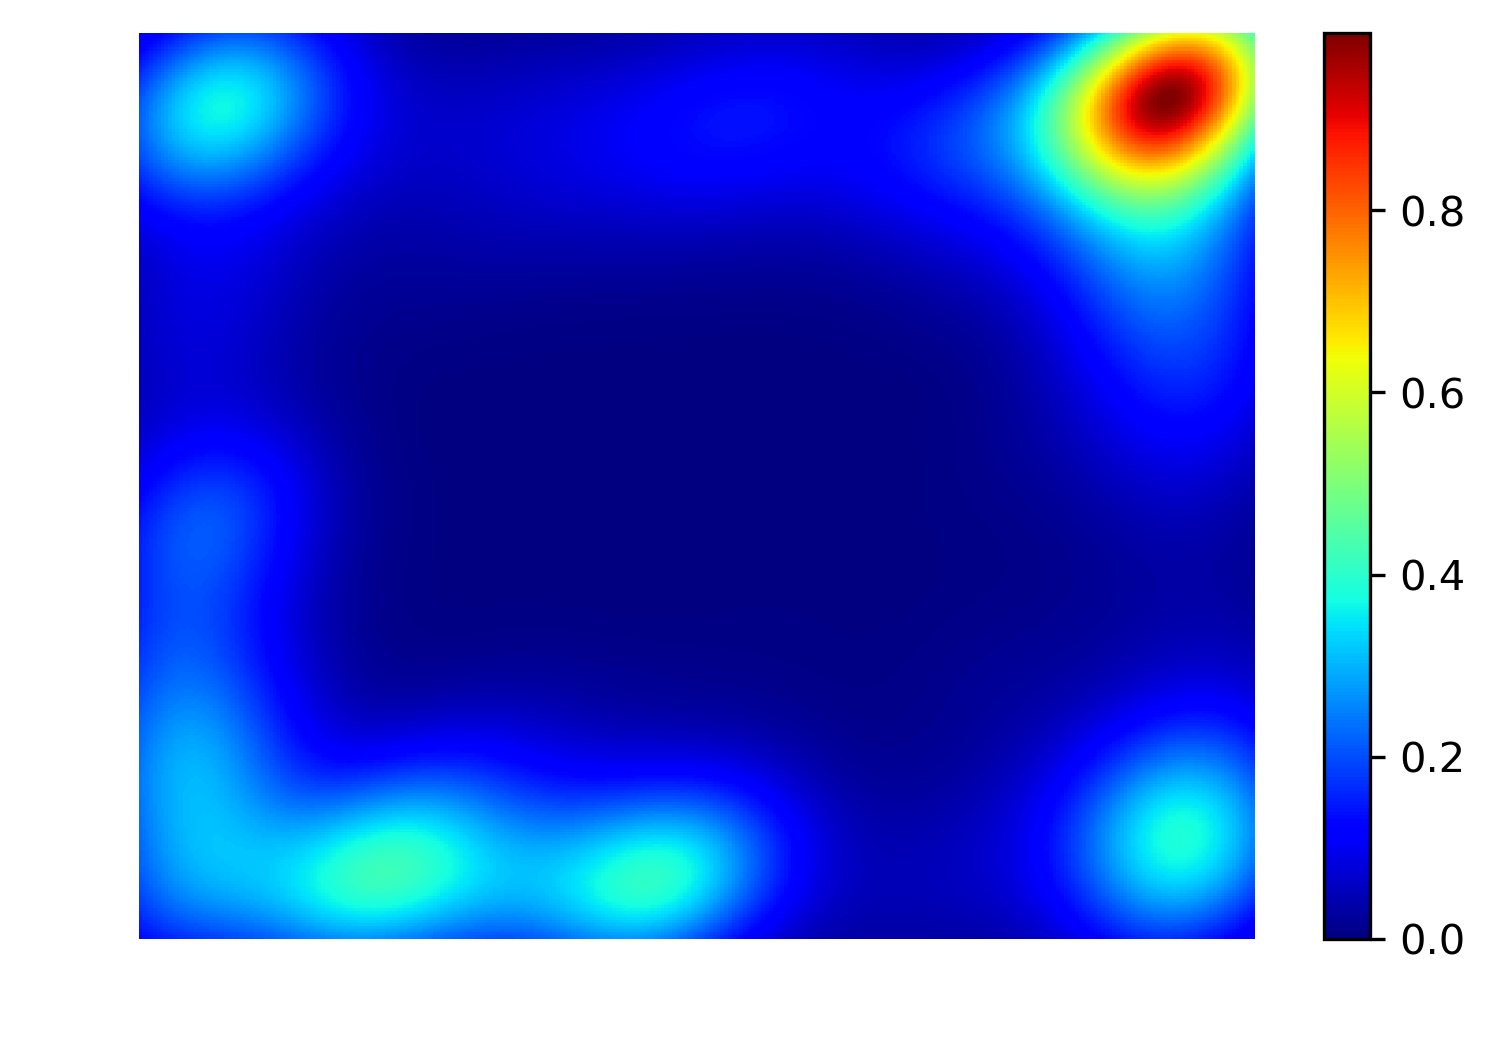

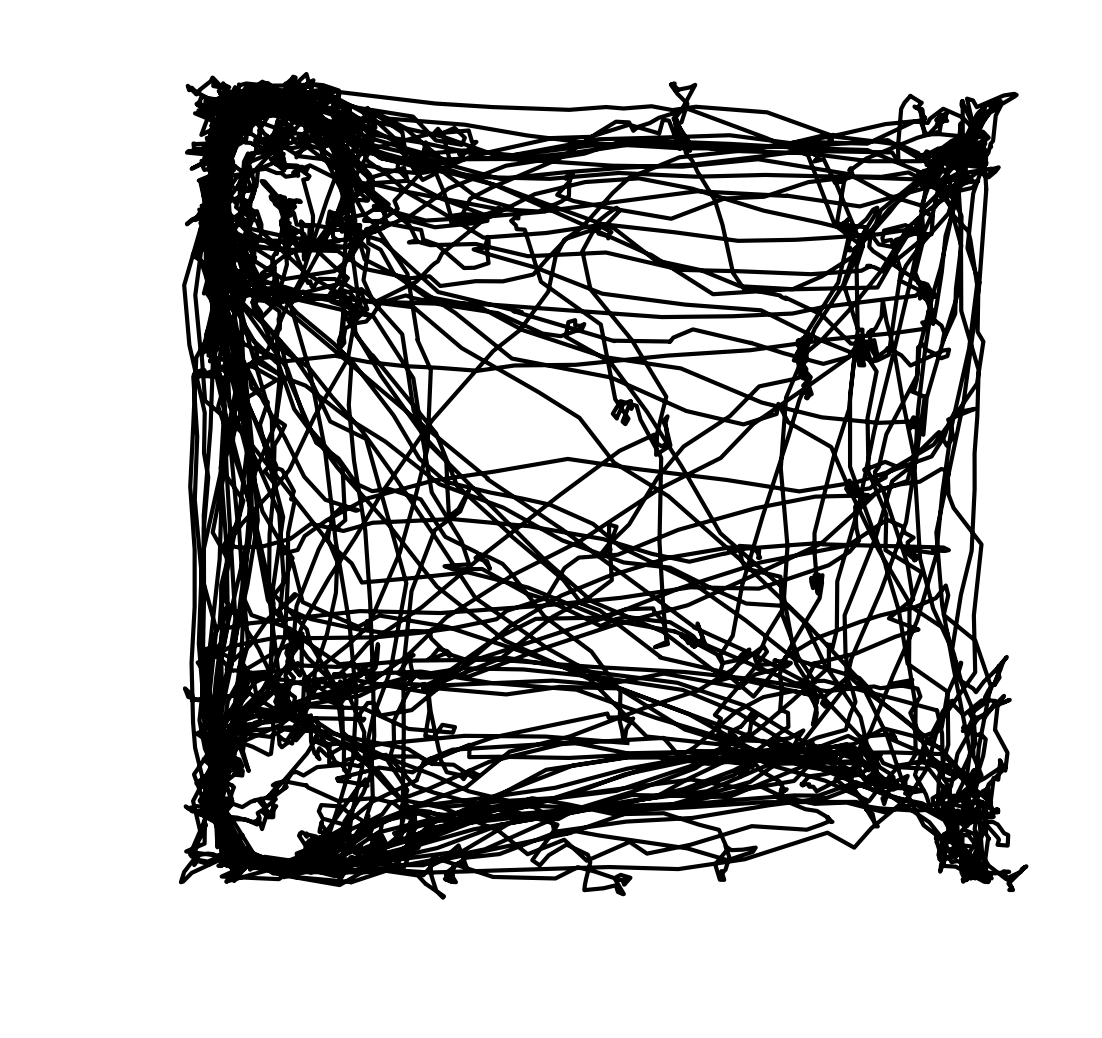

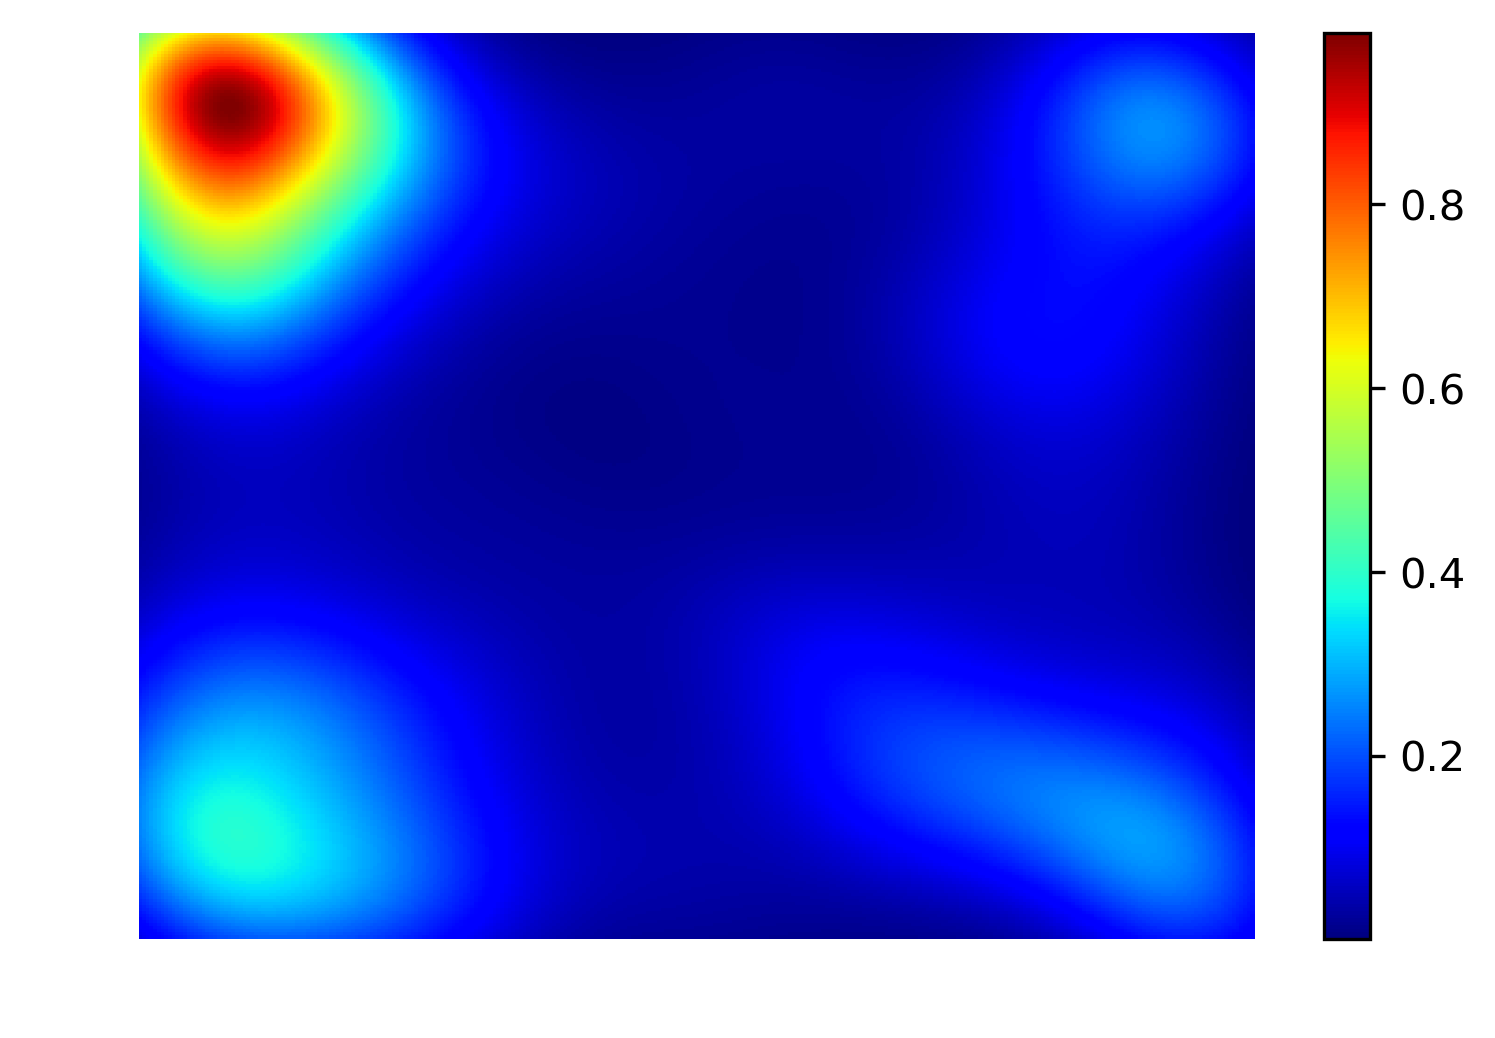

In [17]:
#loop over the .h5 only, change their names, then start creating maps for each file
os.chdir('/media/amr/Amr_4TB/Sergio_All_Videos/Results_from_Cluster') #It looks like it is important
for filename in os.listdir('/media/amr/Amr_4TB/Sergio_All_Videos/Results_from_Cluster/'):
    if filename.endswith('.h5'):
        print(filename)
        
        #read the .h5 file that contains the x, y coordinates of the tracking, the default output from deeplabcut
        f = h5py.File(filename, 'r')

        print("Keys: %s" % f.keys())

        #Get the keys from the file
        a_group_key = list(f.keys())[0]
        
        #convert the keys to a dataframe to make them easier to handle and to plot
        data = pd.read_hdf(filename, a_group_key)

        x = data.iloc[330:, 0][data.iloc[:,2]>0.7] #Remove the first 300 frames to compensate for confusion at the beginning
        y = data.iloc[330:, 1][data.iloc[:,2]>0.7]

        #create trajectory
        #you can control the outliers by modifying the likelihood value [data.iloc[:,2]>0.7]
        plt.figure(figsize=(4,4), dpi=300)
        plt.plot(x,y, color='k', linewidth=1)
        plt.axis('off')
        plt.gca().invert_yaxis() #otherwise the images appear mirror imaged
        plt.savefig('/media/amr/Amr_4TB/Sergio_All_Videos/Results_from_Cluster/%s_Trajectory.png'%filename)
        # plt.show()


        #Create density maps
        from scipy.stats import kde



        # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
        nbins=300
        k = kde.gaussian_kde([x,y])
        xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))


        # Make the plot
        plt.figure(figsize=(6,4), dpi=300)
        plt.pcolormesh(xi, yi, (zi.reshape(xi.shape) - zi.min())/(zi.max()), cmap='jet') #normalize zi value to get colorbar from 0-1
        plt.colorbar(ticks=[0,0.2,0.4,0.6,0.8,1])
        plt.axis('off')
        plt.gca().invert_yaxis() #otherwise the images appear mirror imaged
        plt.savefig('/media/amr/Amr_4TB/Sergio_All_Videos/Results_from_Cluster/%s_Density_map.png'%filename)
        # plt.show()
        
        